In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('Final_SWATData.xlsx')


In [5]:
data.head()

Timestamp    FIT101    LIT101  MV101  P101  P102    AIT201  \
0   22/12/2015 4:00:00 PM  2.470294  261.5804      2     2     1  244.3284   
1   22/12/2015 4:00:01 PM  2.457163  261.1879      2     2     1  244.3284   
2   22/12/2015 4:00:02 PM  2.439548  260.9131      2     2     1  244.3284   
3   22/12/2015 4:00:03 PM  2.428338  260.2850      2     2     1  244.3284   
4   22/12/2015 4:00:04 PM  2.424815  259.8925      2     2     1  244.4245   

    AIT202   AIT203    FIT201  ...  P501  P502    PIT501  PIT502    PIT503  \
0  8.19008  306.101  2.471278  ...     1     1  10.02948     0.0  4.277749   
1  8.19008  306.101  2.468587  ...     1     1  10.02948     0.0  4.277749   
2  8.19008  306.101  2.467305  ...     1     1  10.02948     0.0  4.277749   
3  8.19008  306.101  2.466536  ...     1     1  10.02948     0.0  4.277749   
4  8.19008  306.101  2.466536  ...     1     1  10.02948     0.0  4.277749   

     FIT601  P601  P602  P603  Normal/Attack  
0  0.000256     1     1     1         Normal  
1  0.000256     1     1     1         Normal  
2  0.000256     1     1     1         Normal  
3  0.000256     1     1     1         Normal  
4  0.000256     1     1     1         Normal  

[5 rows x 53 columns]

In [6]:
data.columns

Index([' Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201',
       'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204',
       'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302',
       'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401',
       'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502',
       'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501',
       'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603',
       'Normal/Attack'],
      dtype='object')

labelling the Normal as 0 and attack as 1

In [7]:
data['Normal/Attack'] = data['Normal/Attack'].replace({'Normal': 0, 'Attack': 1})


In [8]:
import warnings
warnings.filterwarnings('ignore')

list of sensors and actuators

In [ ]:
# No.Name Type Description
# 1 FIT-101 Sensor Flow meter; Measures inflow into raw water tank.
# 2 LIT-101 Sensor Level Transmitter; Raw water tank level.
# 3 MV-101 Actuator Motorized valve; Controls water flow to the raw water tank.
# 4 P-101 Actuator Pump; Pumps water from raw water tank to second stage.
# 5 P-102 (backup) Actuator Pump; Pumps water from raw water tank to second stage.
# 6 AIT-201 Sensor Conductivity analyser; Measures NaCl level.
# 7 AIT-202 Sensor pH analyser; Measures HCl level.
# 8 AIT-203 Sensor ORP analyser; Measures NaOCl level.
# 9 FIT-201 Sensor Flow Transmitter; Control dosing pumps.
# 10 MV-201 Actuator Motorized valve; Controls water flow to the UF feed water tank.
# 11 P-201 Actuator Dosing pump; NaCl dosing pump.
# 12 P-202 (backup) Actuator Dosing pump; NaCl dosing pump.
# 13 P-203 Actuator Dosing pump; HCl dosing pump.
# 14 P-204 (backup) Actuator Dosing pump; HCl dosing pump.
# 15 P-205 Actuator Dosing pump; NaOCl dosing pump.
# 16 P-206 (backup) Actuator Dosing pump; NaOCl dosing pump.
# 17 DPIT-301 Sensor Differential pressure indicating transmitter; Controls the backwash process.
# 18 FIT-301 Sensor Flow meter; Measures the flow of water in the UF stage.
# 19 LIT-301 Sensor Level Transmitter; UF feed water tank level.
# 20 MV-301 Actuator Motorized Valve; Controls UF-Backwash process.
# 21 MV-302 Actuator Motorized Valve; Controls water from UF process to DeChlorination unit.
# 22 MV-303 Actuator Motorized Valve; Controls UF-Backwash drain.
# 23 MV-304 Actuator Motorized Valve; Controls UF drain.
# 24 P-301 (backup) Actuator UF feed Pump; Pumps water from UF feed water tank to RO
# feed water tank via UF filtration.
# 25 P-302 Actuator UF feed Pump; Pumps water from UF feed water tank to RO
# feed water tank via UF filtration.
# 26 AIT-401 Sensor RO hardness meter of water.
# 27 AIT-402 Sensor ORP meter; Controls the NaHSO3dosing(P203), NaOCl dosing
# (P205).
# 28 FIT-401 Sensor Flow Transmitter ; Controls the UV dechlorinator.
# 29 LIT-401 Actuator Level Transmitter; RO feed water tank level.
# 30 P-401 (backup) Actuator Pump; Pumps water from RO feed tank to UV dechlorinator.
# 31 P-402 Actuator Pump; Pumps water from RO feed tank to UV dechlorinator.
# 32 P-403 Actuator Sodium bi-sulphate pump.
# 33 P-404 (backup) Actuator Sodium bi-sulphate pump.
# 34 UV-401 Actuator Dechlorinator; Removes chlorine from water.
# 35 AIT-501 Sensor RO pH analyser; Measures HCl level.
# 36 AIT-502 Sensor RO feed ORP analyser; Measures NaOCl level.
# 37 AIT-503 Sensor RO feed conductivity analyser; Measures NaCl level.
# 38 AIT-504 Sensor RO permeate conductivity analyser; Measures NaCl level.
# 39 FIT-501 Sensor Flow meter; RO membrane inlet flow meter.
# 40 FIT-502 Sensor Flow meter; RO Permeate flow meter.
# 41 FIT-503 Sensor Flow meter; RO Reject flow meter.
# 42 FIT-504 Sensor Flow meter; RO re-circulation flow meter.
# 43 P-501 Actuator Pump; Pumps dechlorinated water to RO.
# 44 P-502 (backup) Actuator Pump; Pumps dechlorinated water to RO.
# 45 PIT-501 Sensor Pressure meter; RO feed pressure.
# 46 PIT-502 Sensor Pressure meter; RO permeate pressure.
# 47 PIT-503 Sensor Pressure meter;RO reject pressure.
# 48 FIT-601 Sensor Flow meter; UF Backwash flow meter.
# 49 P-601 Actuator Pump; Pumps water from RO permeate tank to raw water tank
# (not used for data collection).
# 50 P-602 Actuator Pump; Pumps water from UF back wash tank to UF filter to
# clean the membrane.
# 51 P-603 Actuator Not implemented in SWaT yet

In [31]:
sensors = ['FIT101',
'LIT101' ,
'AIT201',
'AIT202',
'AIT203',
'FIT201',
'DPIT301',
'FIT301',
'LIT301',
'AIT401',
'AIT402',
'FIT401',
'AIT501',
'AIT502',
'AIT503',
'AIT504',
'FIT501',
'FIT502',
'FIT503',
'FIT504',
'PIT501',
'PIT502',
'PIT503',
'FIT601'
]

In [10]:
#combining to prevent error:

df = data

#only checking the sensor data
columns_to_keep = [' Timestamp', 'FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301',
                   'FIT301', 'LIT301', 'AIT401', 'AIT402', 'FIT401', 'AIT501', 'AIT502', 'AIT503',
                   'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'PIT501', 'PIT502', 'PIT503',
                   'FIT601', 'Normal/Attack']

df = df[columns_to_keep]


df.head()

#rename the Normal/Attack as Target label
df.rename(columns={'Normal/Attack': 'Target'}, inplace=True)

df.rename(columns={' Timestamp': 'Timestamp'}, inplace=True)

# Remove the leading space from the timestamp string
df['Timestamp'] = df['Timestamp'].str.strip()


In [11]:
#to plot the data set the column 'Timestamp' as index and covert it to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')

    # Set 'Timestamp' as the index
df.set_index('Timestamp', inplace=True)

In [12]:
def resample_function_plot(dataframe, field, frequency):


    # Resample the data to the frequency
    resampled_dataframe = dataframe.resample(frequency).mean()

    # Plot the time series graph
    plt.figure(figsize=(12, 6))
    plt.plot(resampled_dataframe.index, resampled_dataframe[field])
    plt.xlabel('Timestamp')
    plt.ylabel(field)
    plt.title(f'Resampled Time Series Plot of {field} ({frequency} Frequency)')
    plt.show()

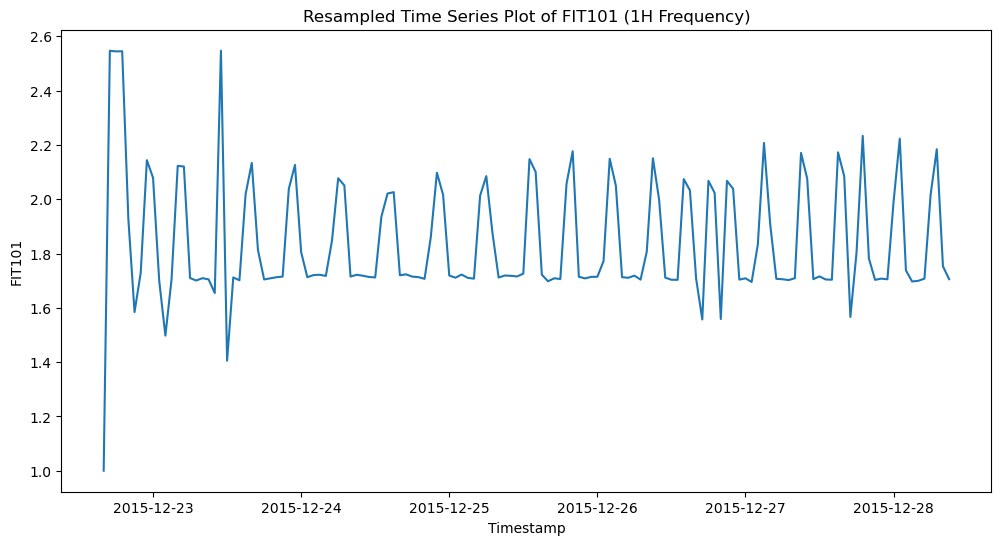

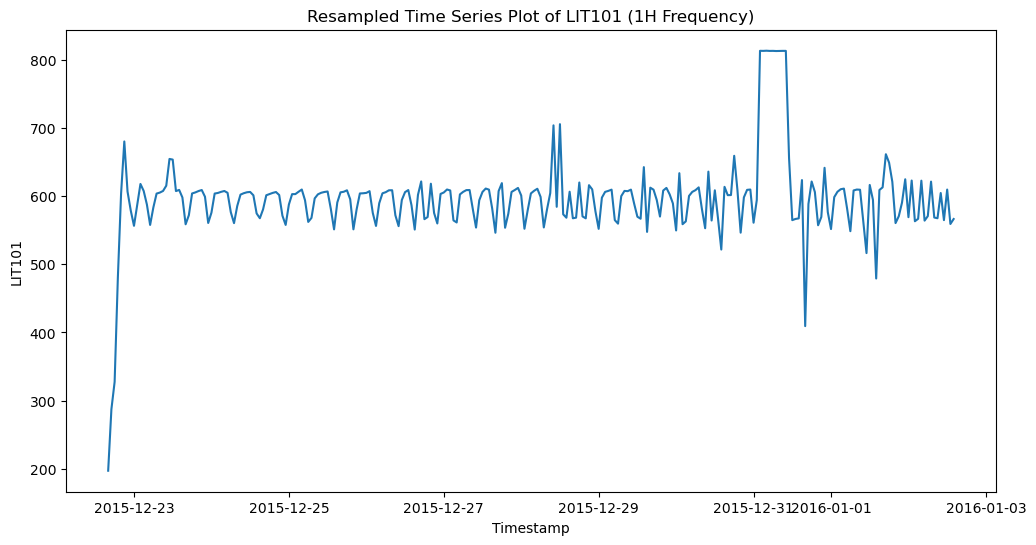

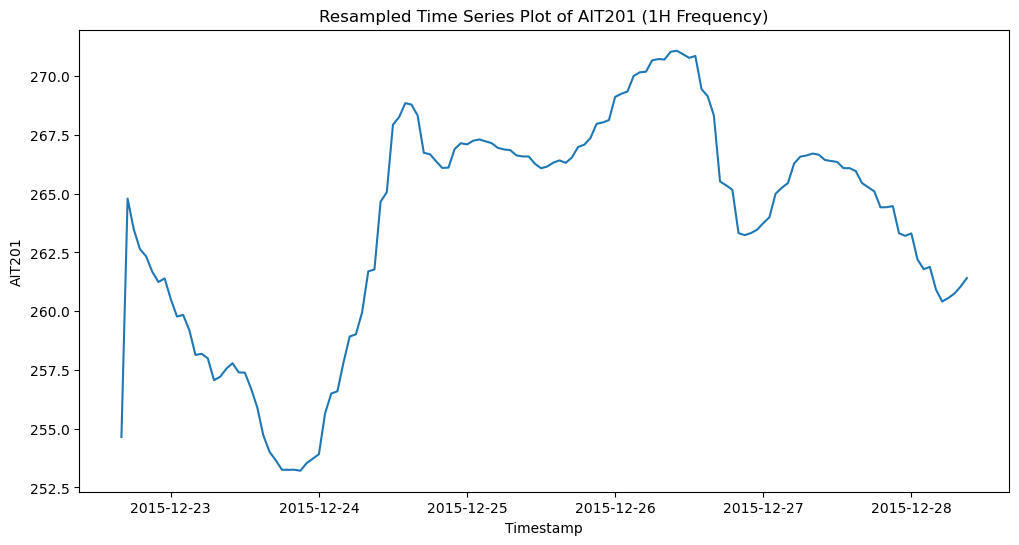

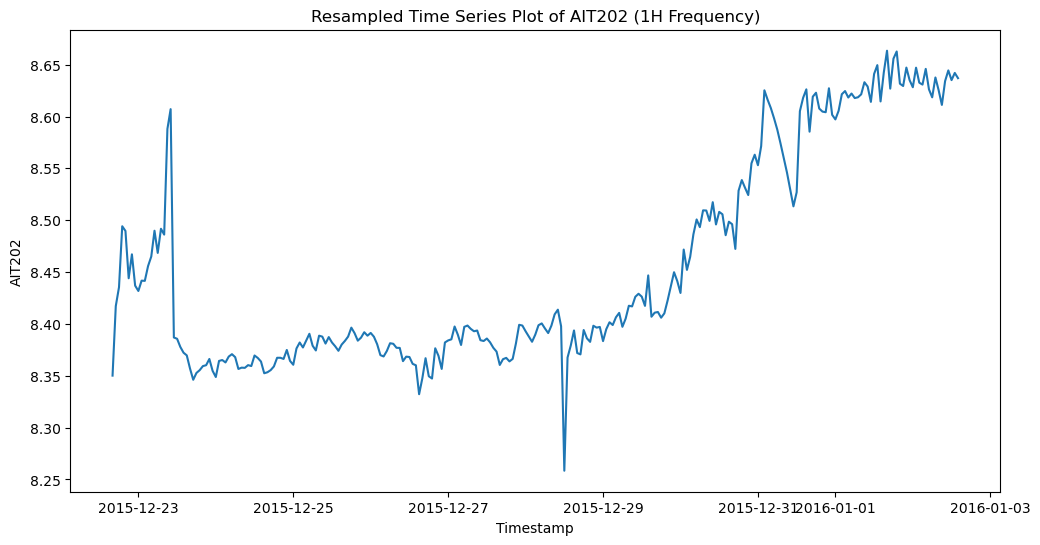

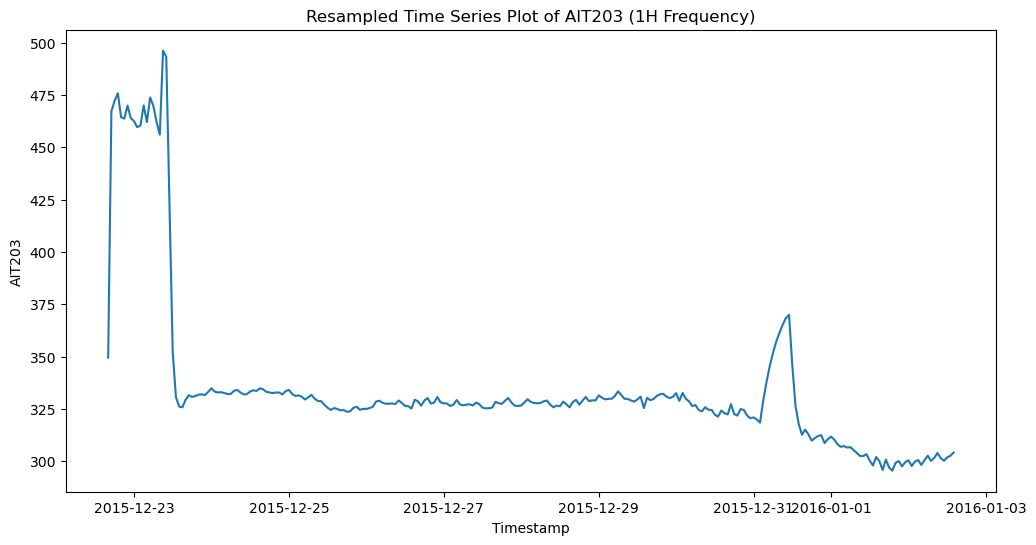

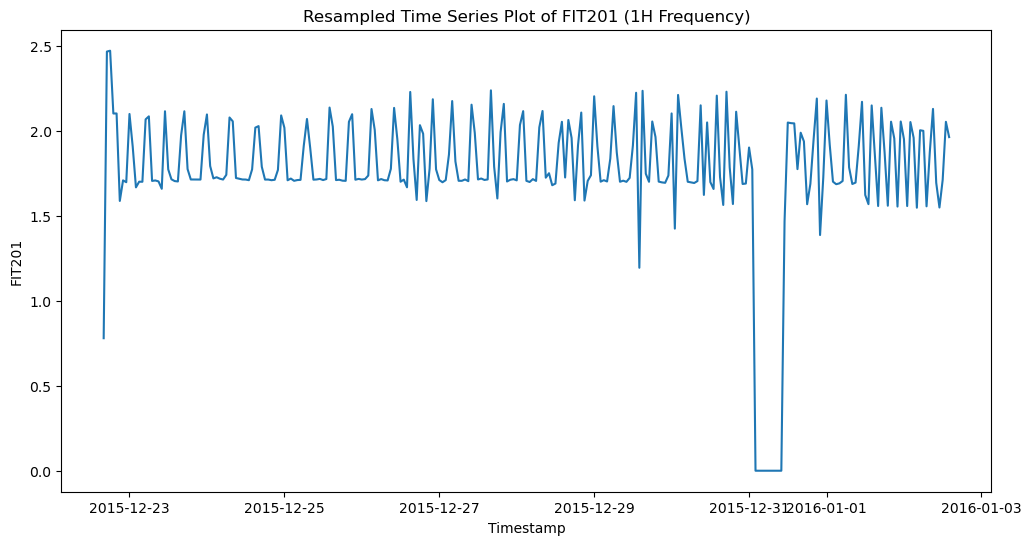

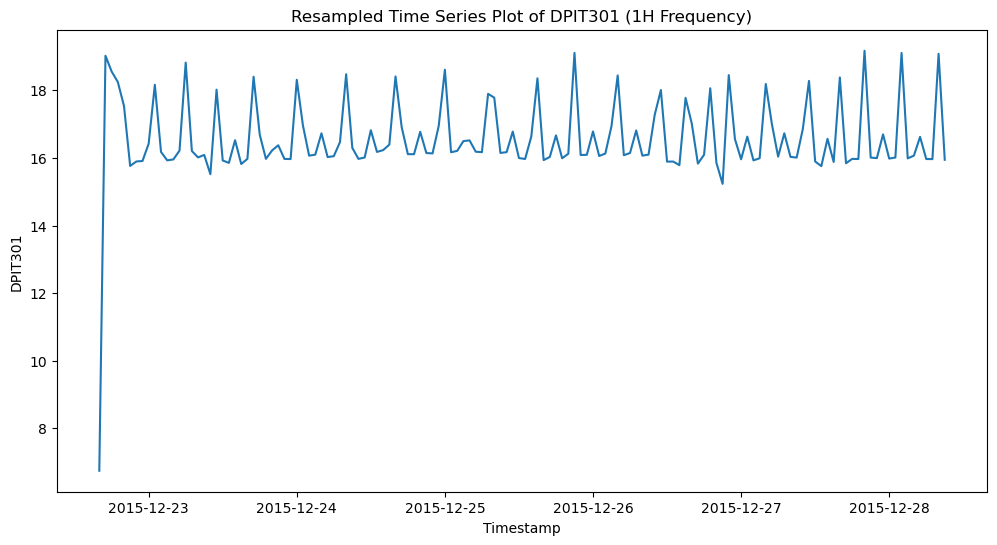

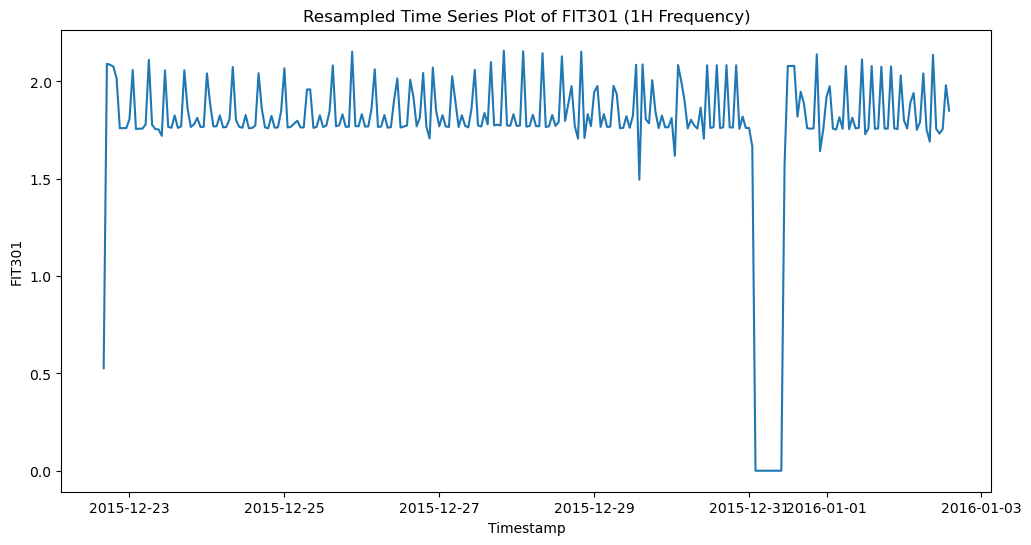

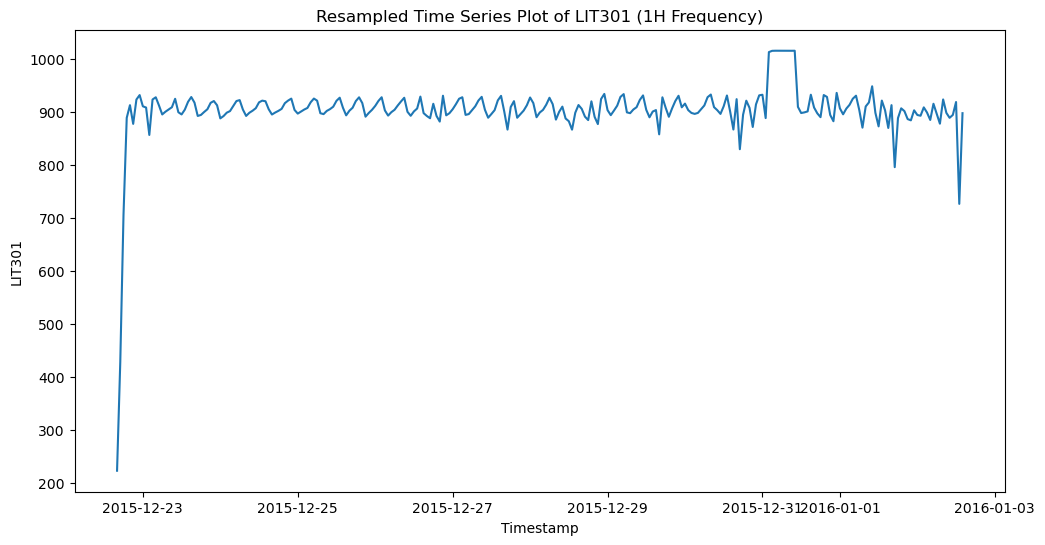

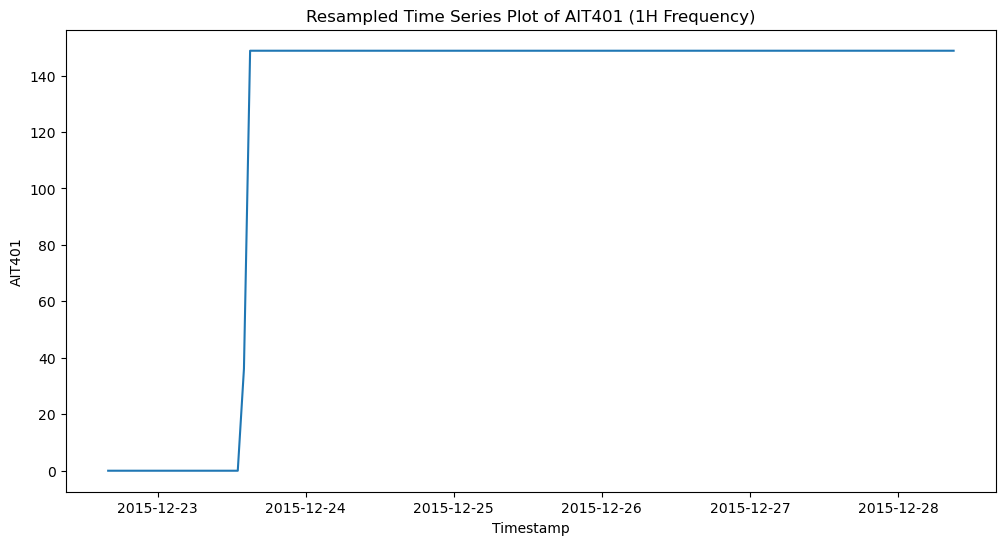

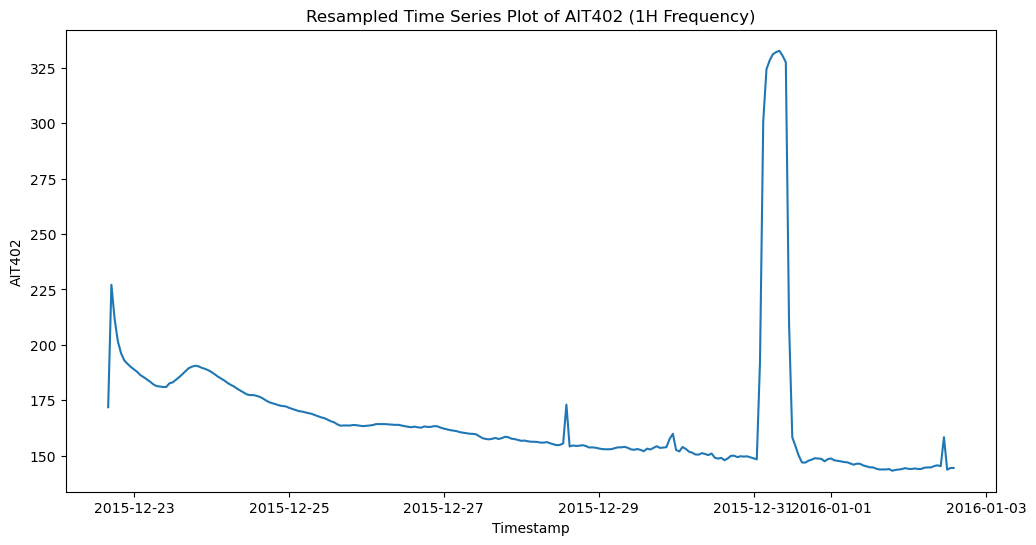

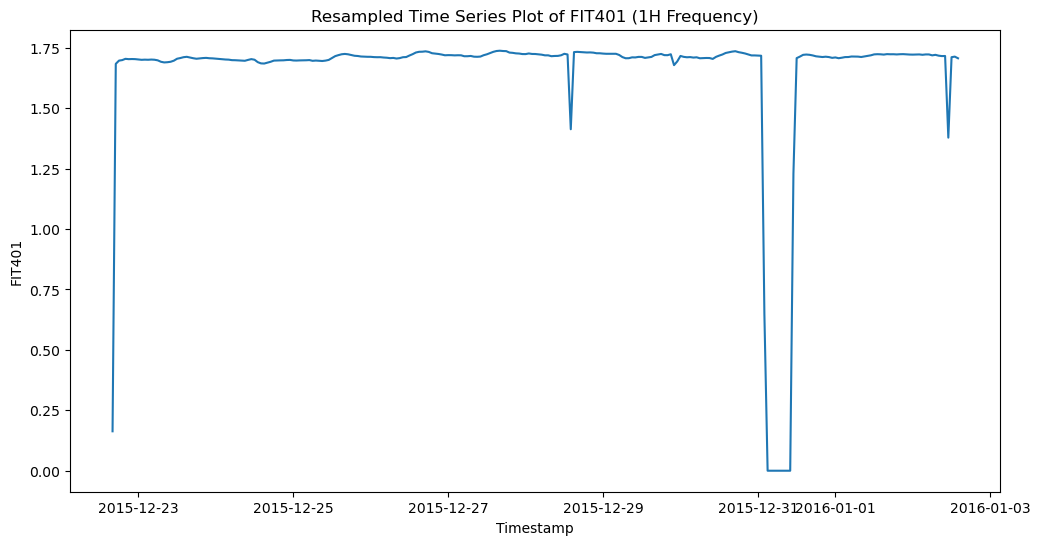

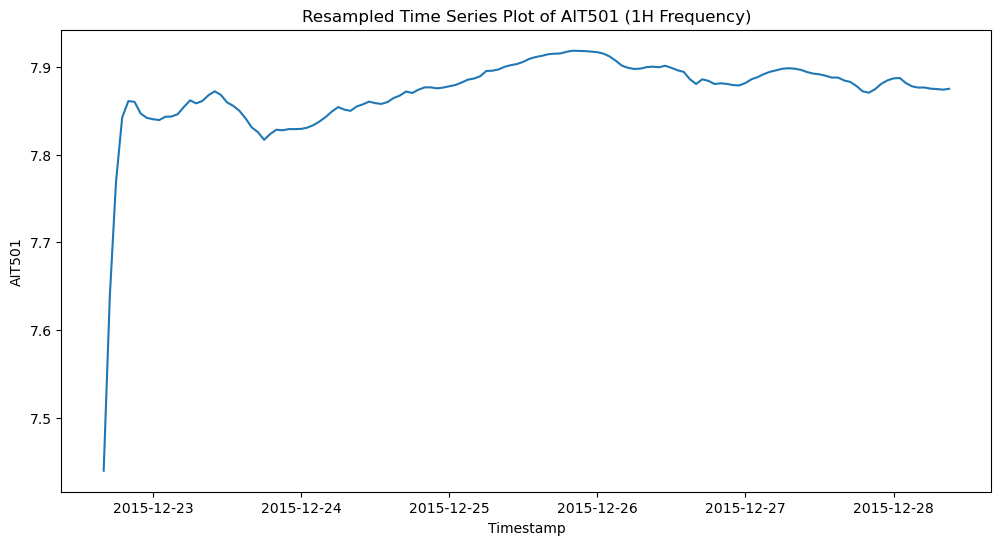

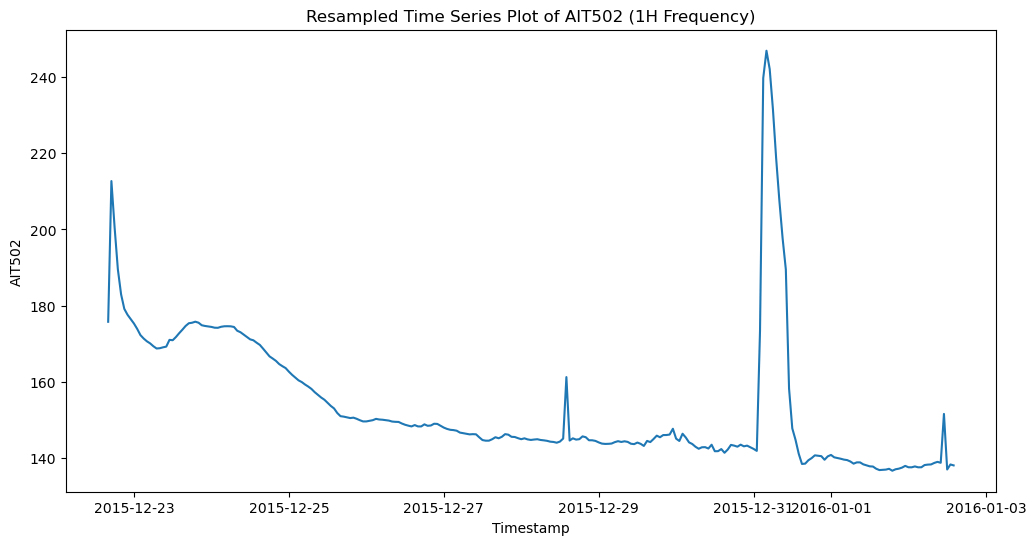

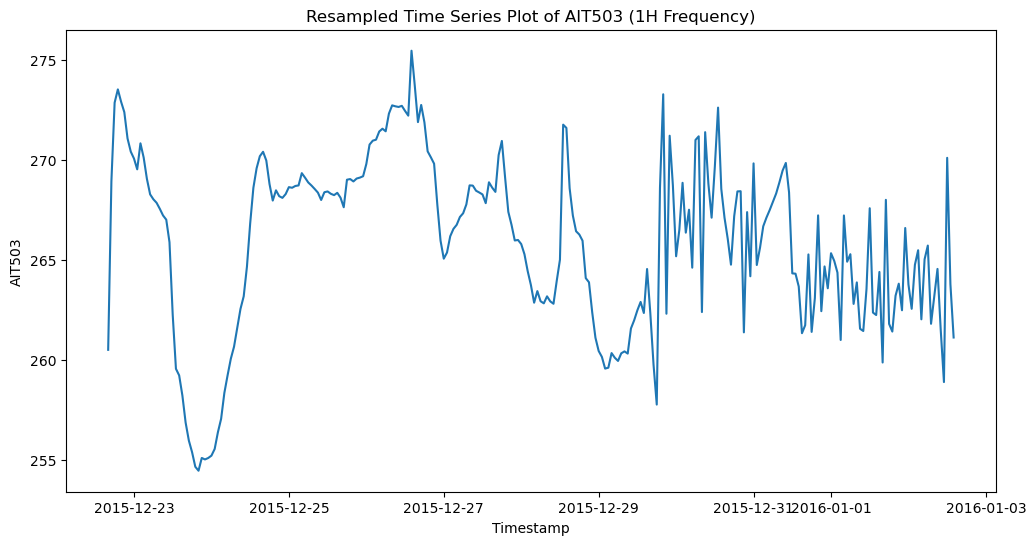

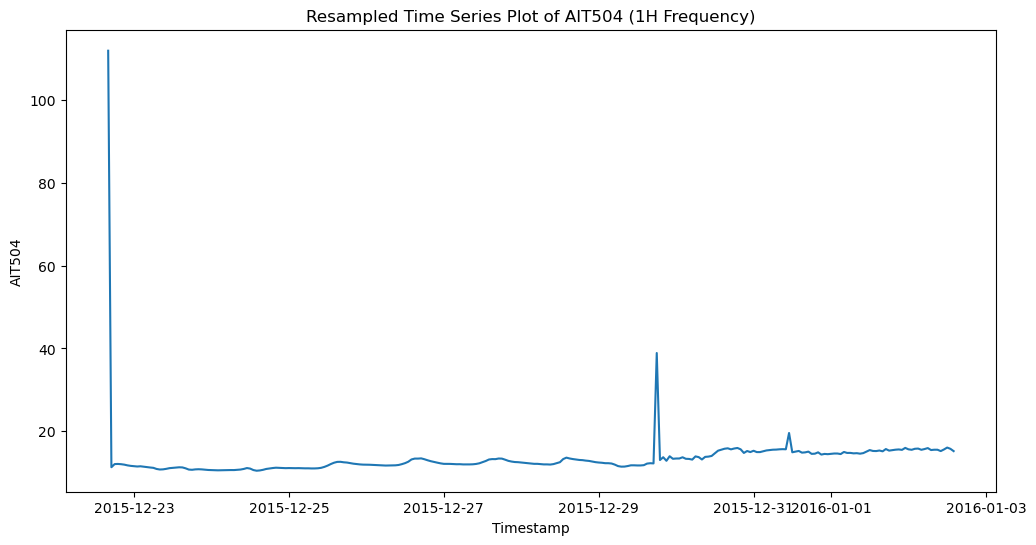

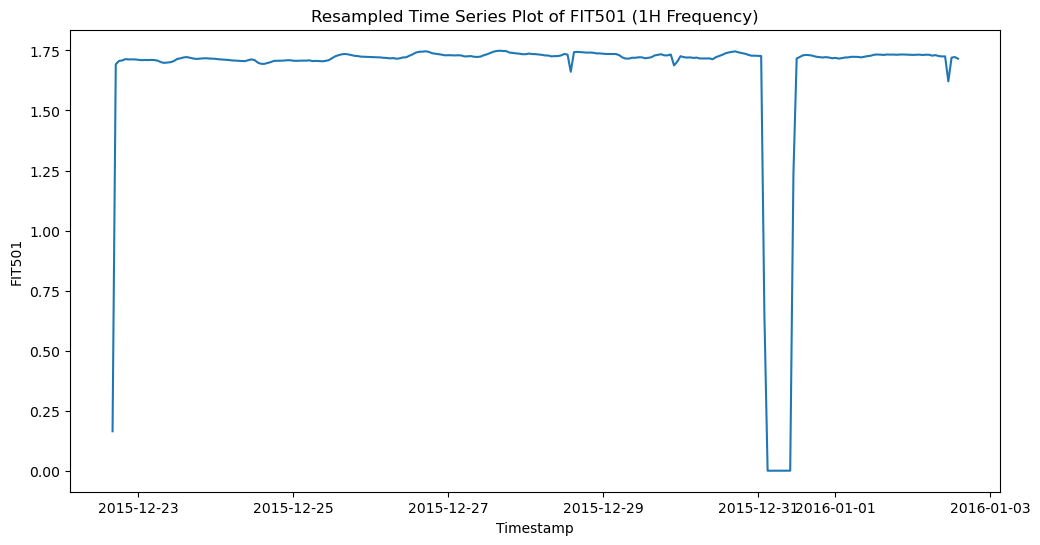

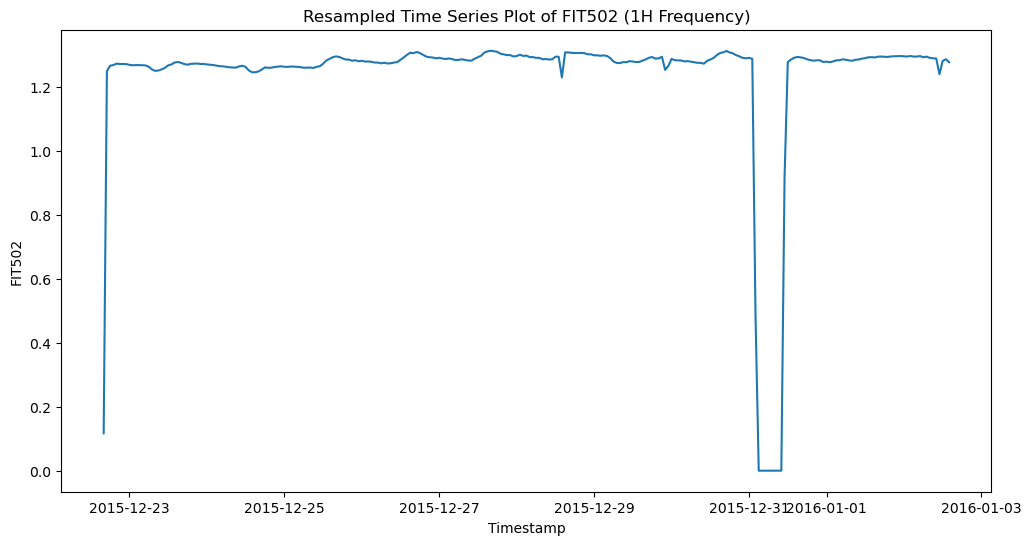

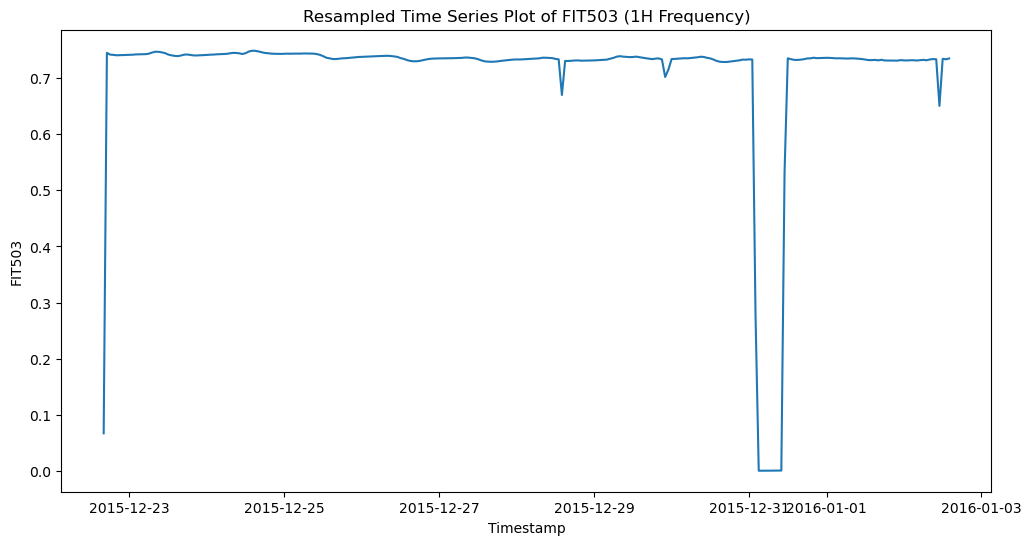

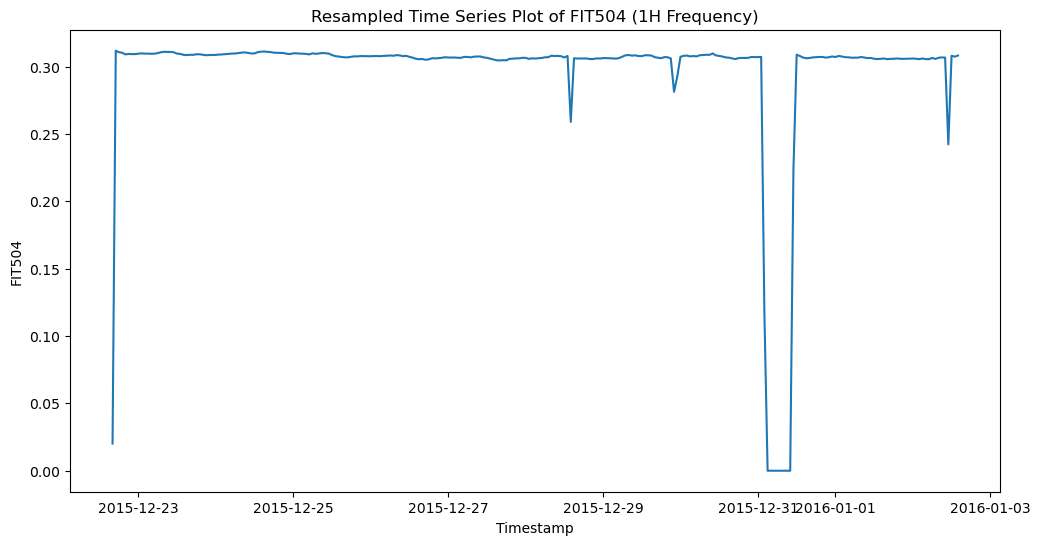

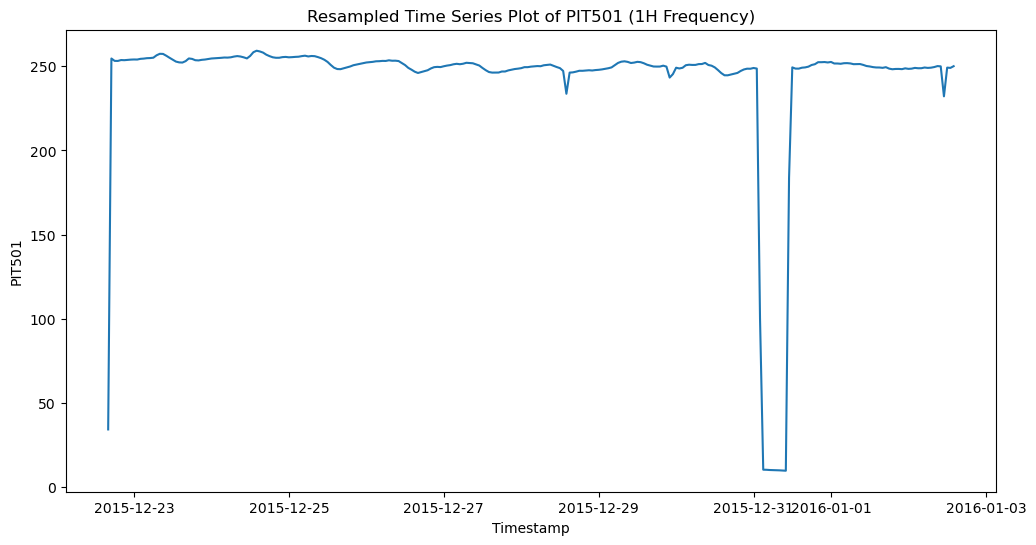

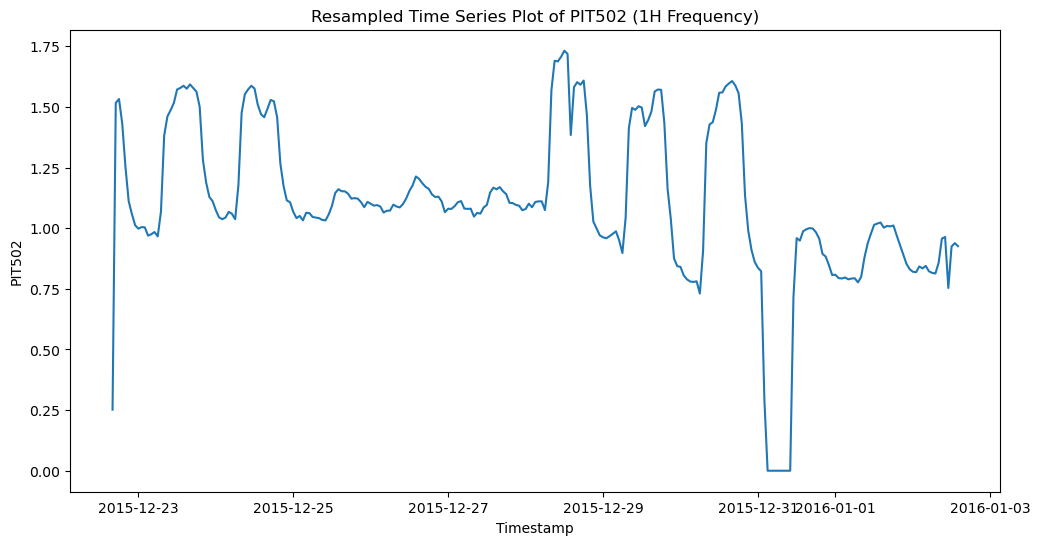

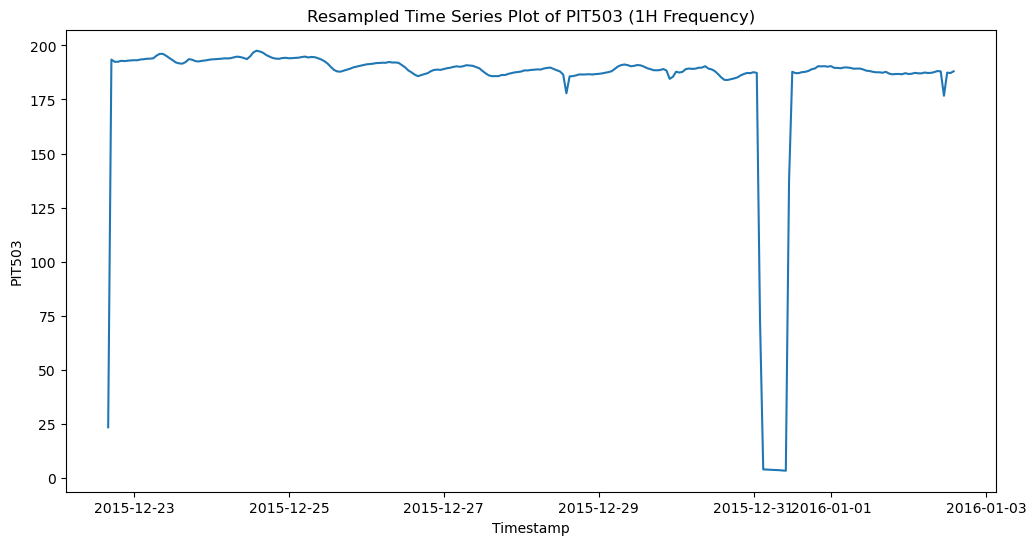

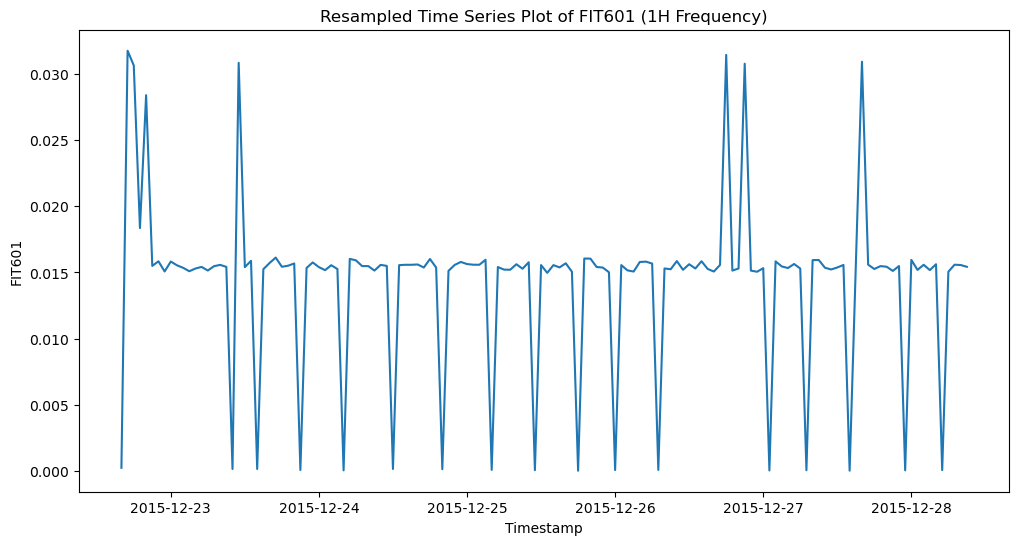

In [16]:
for sensors in sensors:
    resample_function_plot(df, sensors, '1H')

In [1]:
import plotly.express as px

def resample_function_plotly(dataframe, field, frequency):
    # Resample the data to the specified frequency
    resampled_dataframe = dataframe.resample(frequency).mean()

    # Create the plotly figure
    fig = px.line(resampled_dataframe, x=resampled_dataframe.index, y=field, labels={'index': 'Timestamp', field: field},
                  title=f'Resampled Time Series Plot of {field} ({frequency} Frequency)')

    # Enable hover tooltips and zooming
    fig.update_layout(hovermode='x', xaxis=dict(rangeselector=dict(buttons=[dict(count=1, label='1d', step='day', stepmode='backward'),
                                                                             dict(count=7, label='1w', step='day', stepmode='backward'),
                                                                             dict(count=1, label='1m', step='month', stepmode='backward'),
                                                                             dict(count=3, label='3m', step='month', stepmode='backward'),
                                                                             dict(step='all')])),
                      xaxis_rangeslider_visible=True)

    # Display the plot
    fig.show()


In [14]:
resample_function_plotly(df, 'FIT101', '1H')

In [43]:
#full plot check
def function_plot(dataframe, field):


    resampled_dataframe = dataframe

    # Plot the time series graph
    plt.figure(figsize=(24,8))
    plt.plot(resampled_dataframe.index, resampled_dataframe[field])
    plt.xlabel('Timestamp')
    plt.ylabel(field)
    plt.title(f'Without resampling Time Series Plot of {field}')
    plt.show()

In [42]:
#trying without resampling and marking the areas with attack and normal
def target_function_plot(dataframe, field):
    # Filter the dataframe based on 'Target' values
    target_0 = dataframe[dataframe['Target'] == 0]
    target_1 = dataframe[dataframe['Target'] == 1]

    # Plot the time series graph
    plt.figure(figsize=(24, 8))
    plt.plot(target_0.index, target_0[field], color='green', label='Target 0: Normal')
    plt.plot(target_1.index, target_1[field], color='red', label='Target 1: Attack')
    plt.xlabel('Timestamp')
    plt.ylabel(field)
    plt.title(f'Without Resampling Attack/Normal Legend Time Series Plot of {field}')
    plt.legend()
    plt.show()


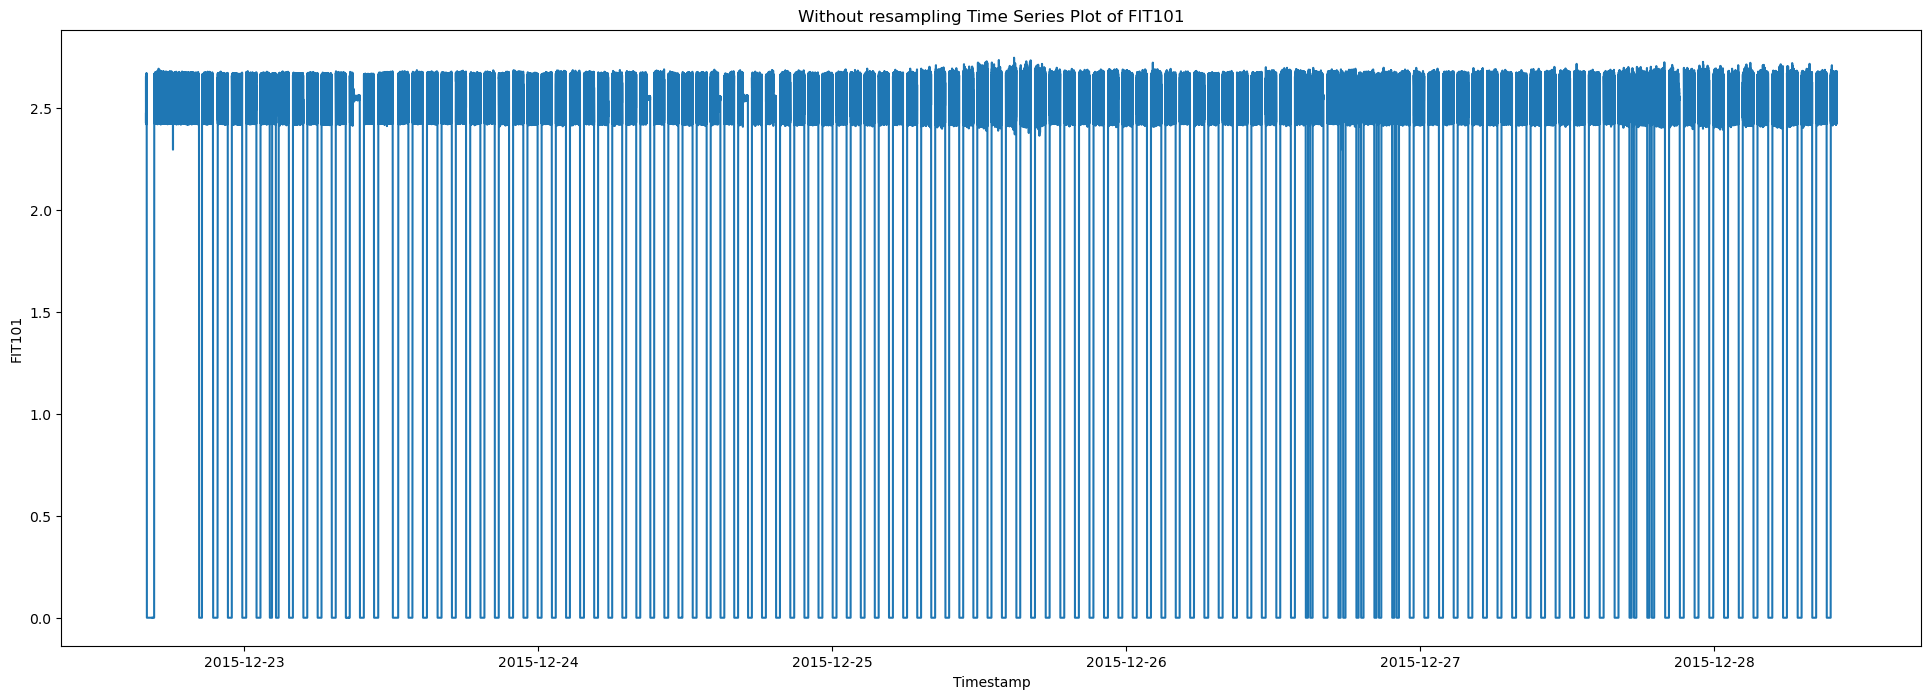

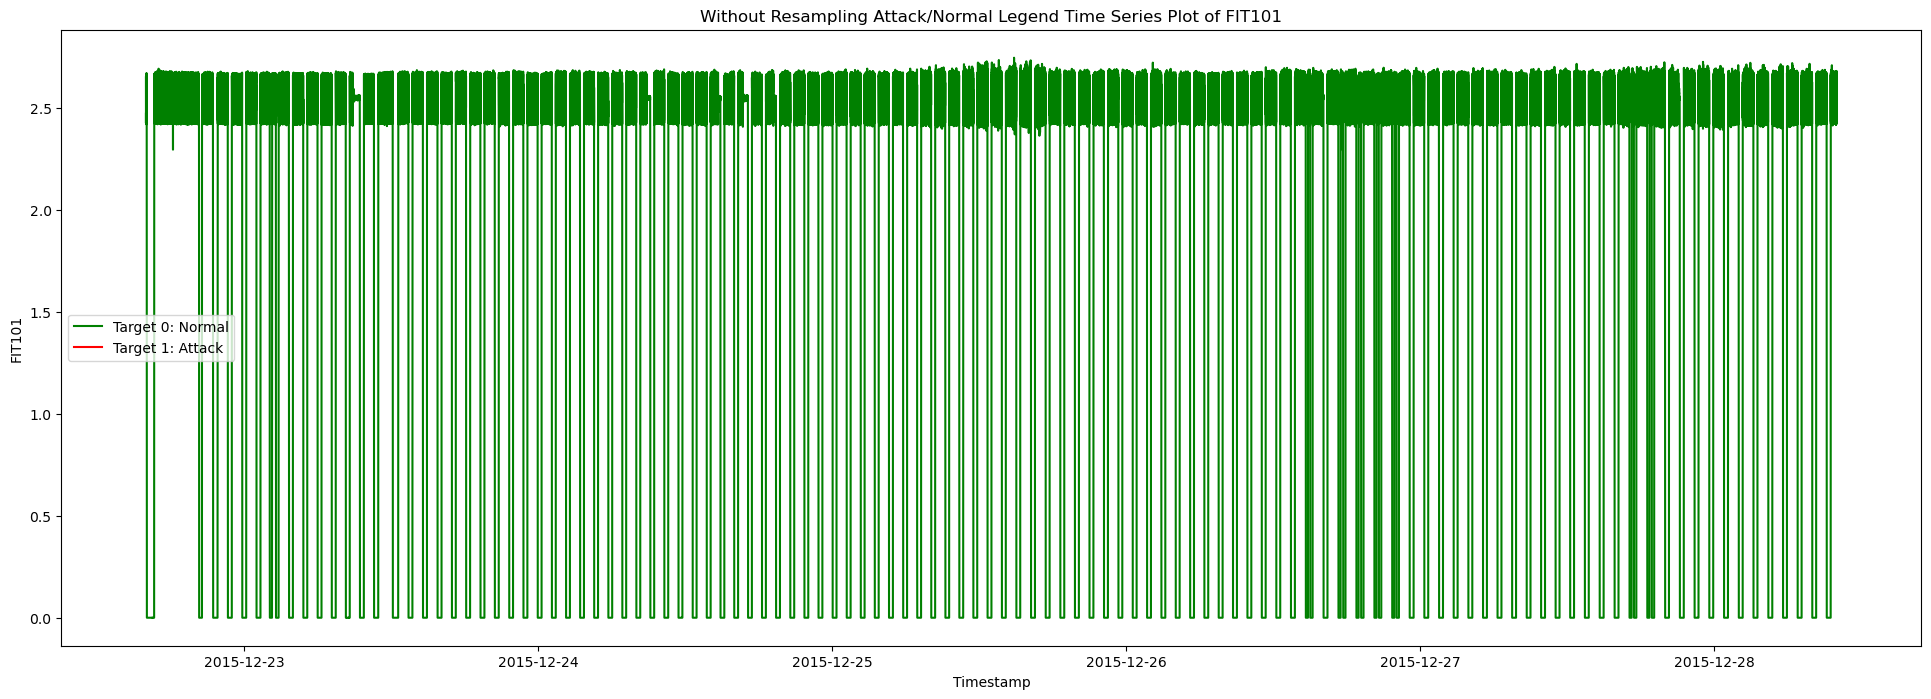

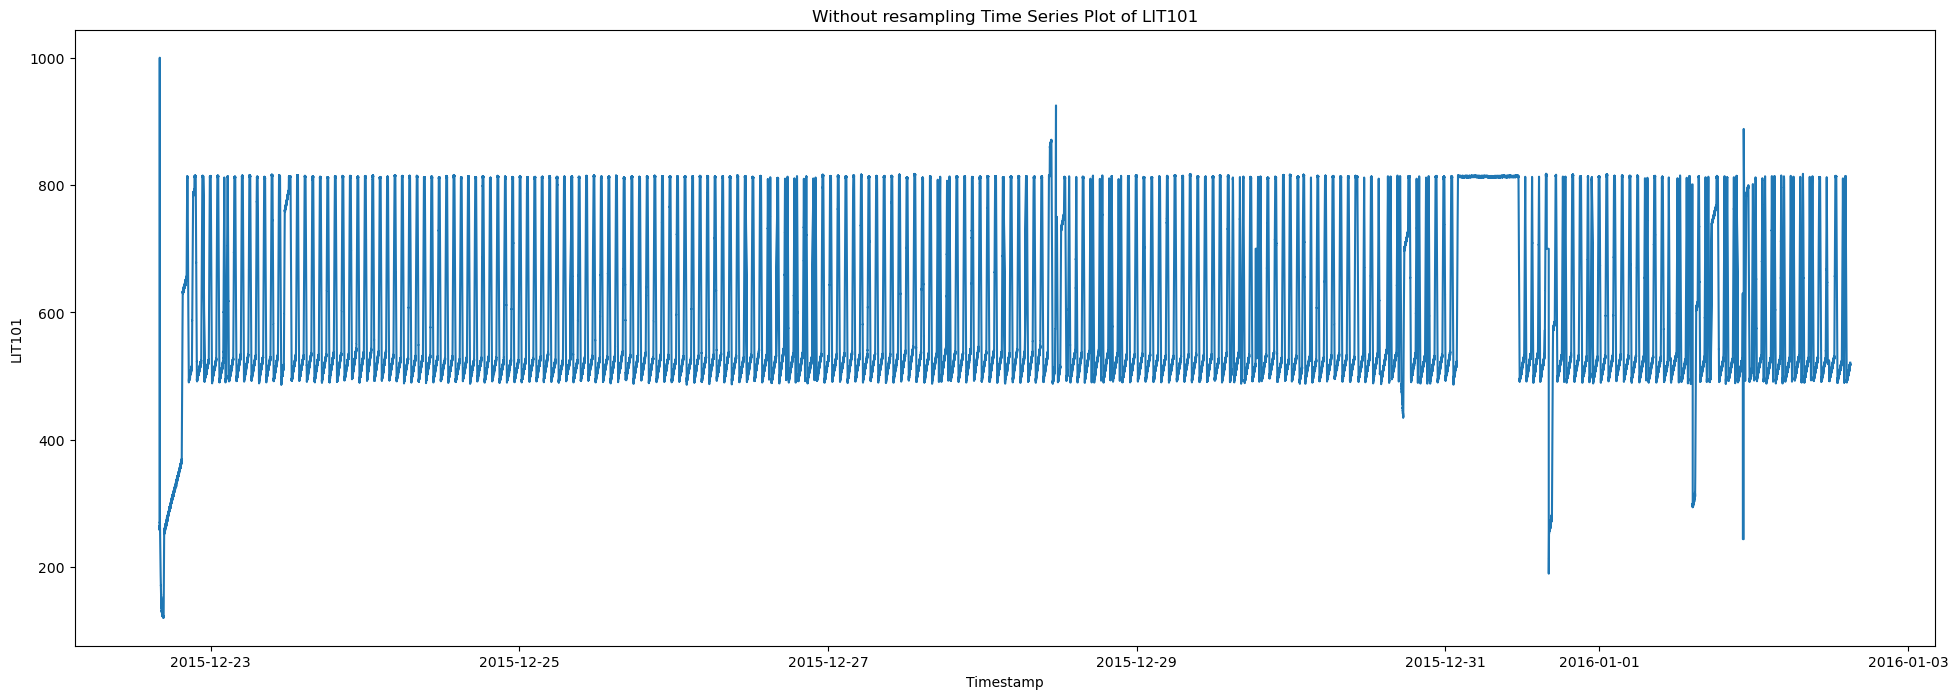

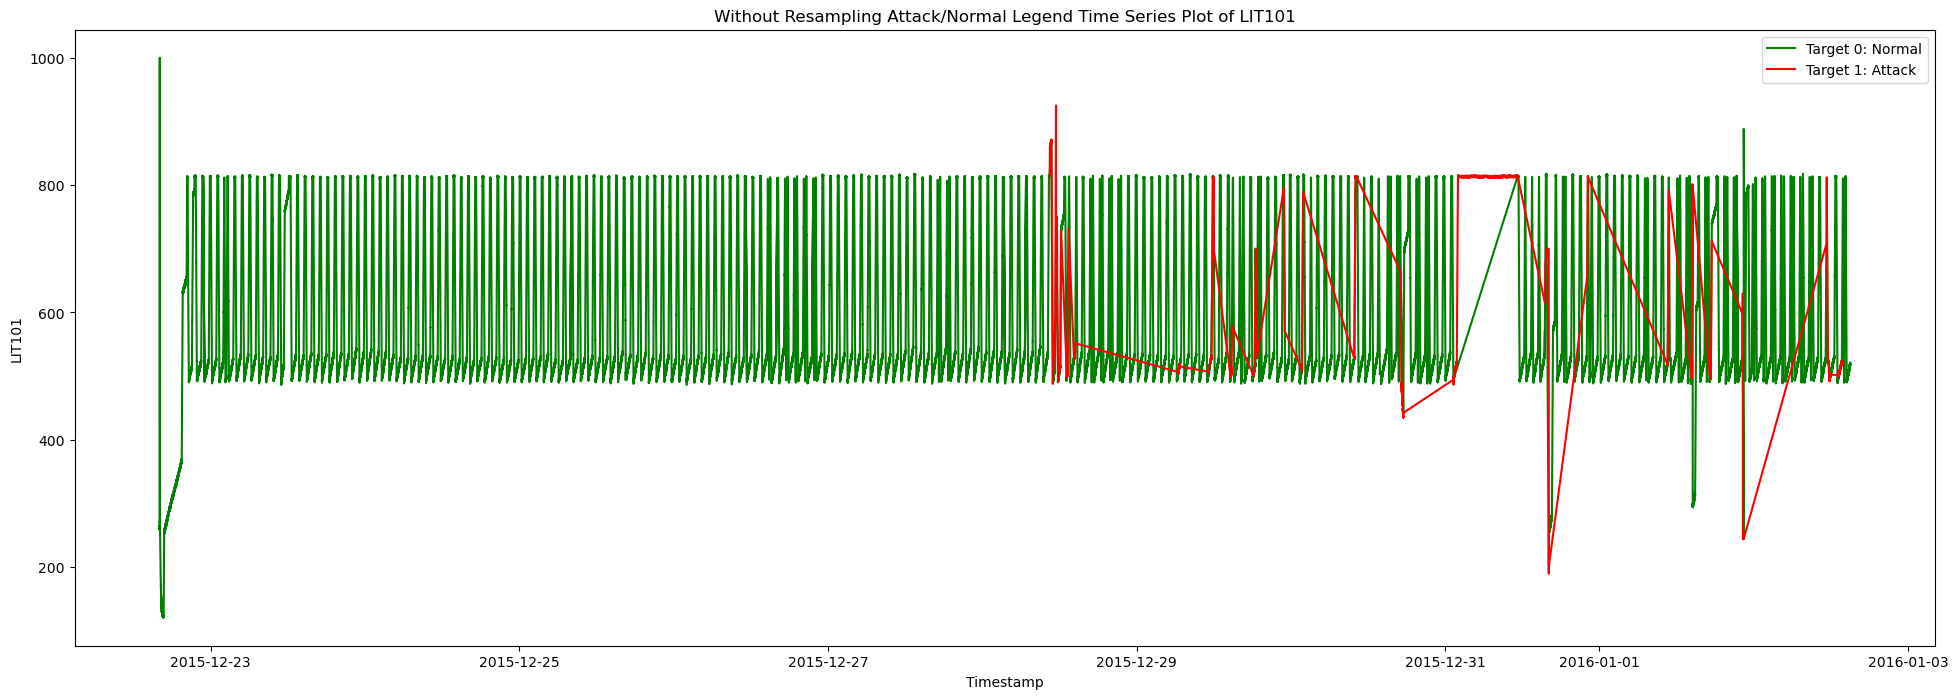

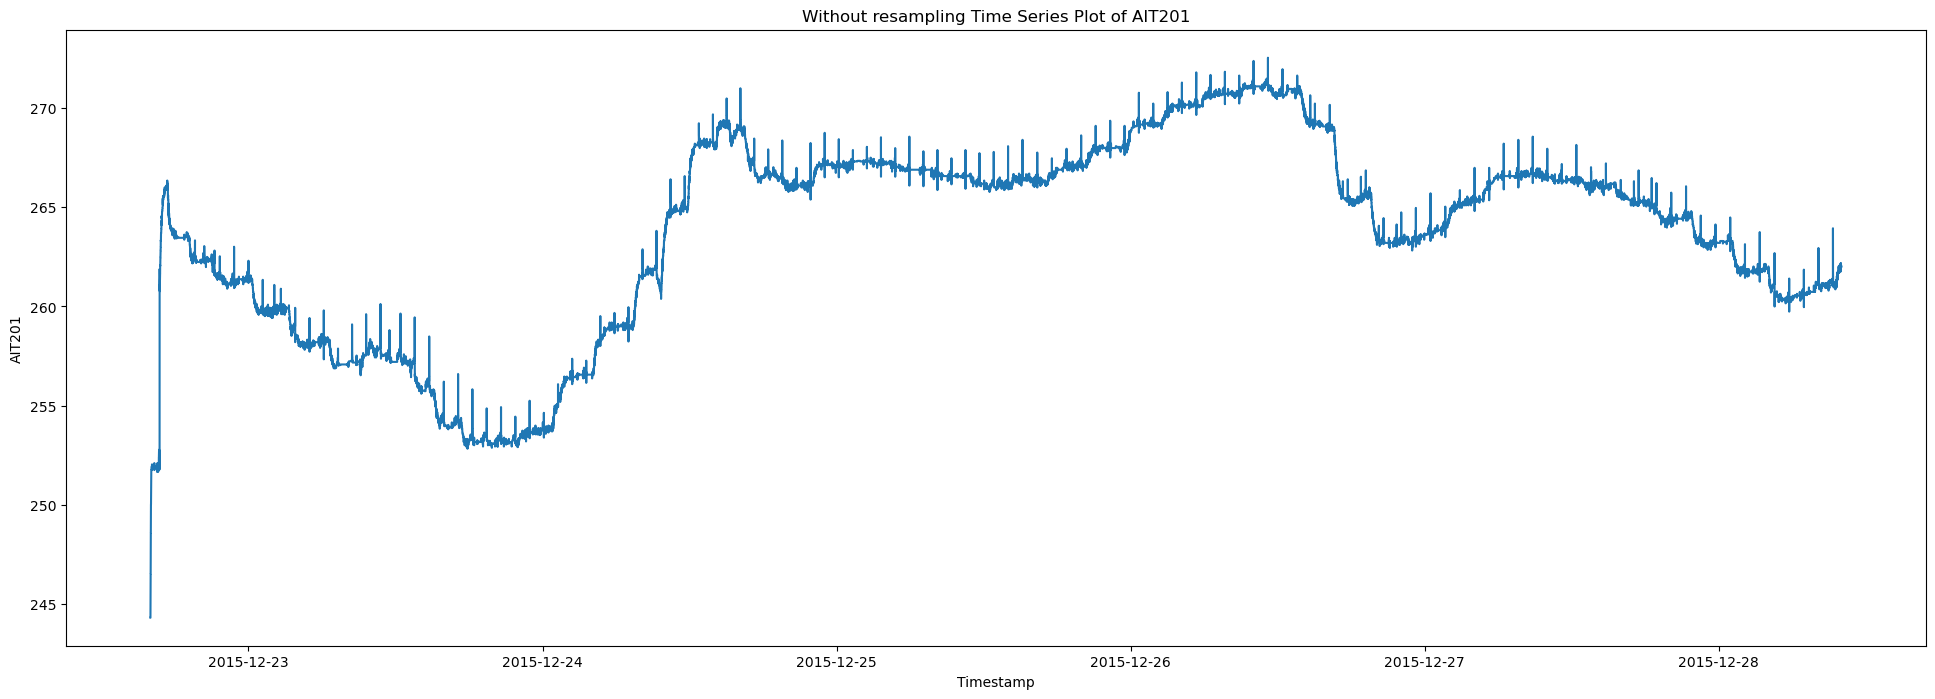

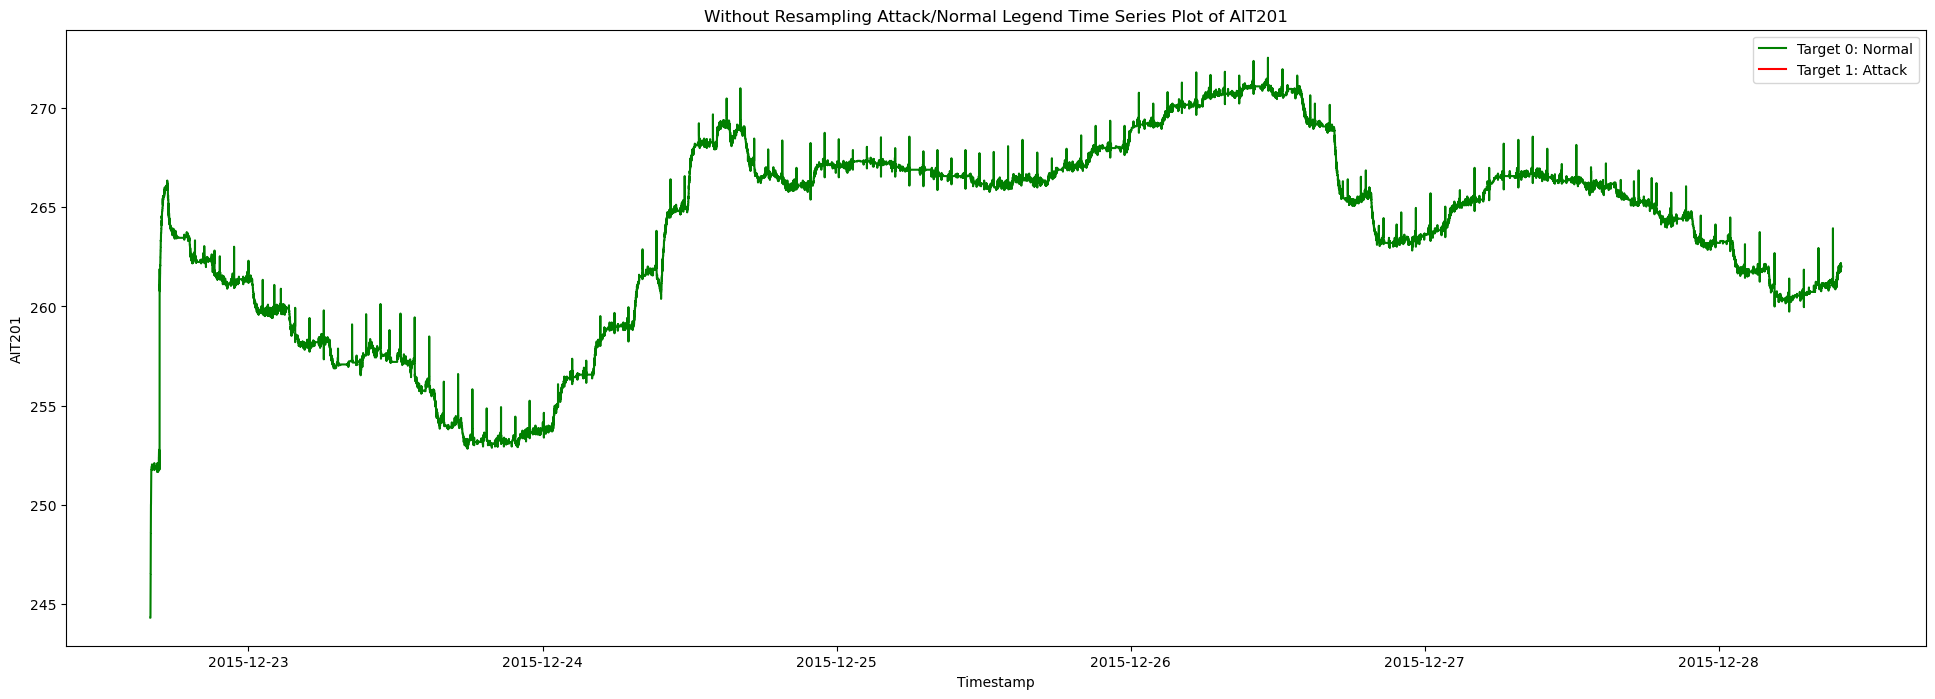

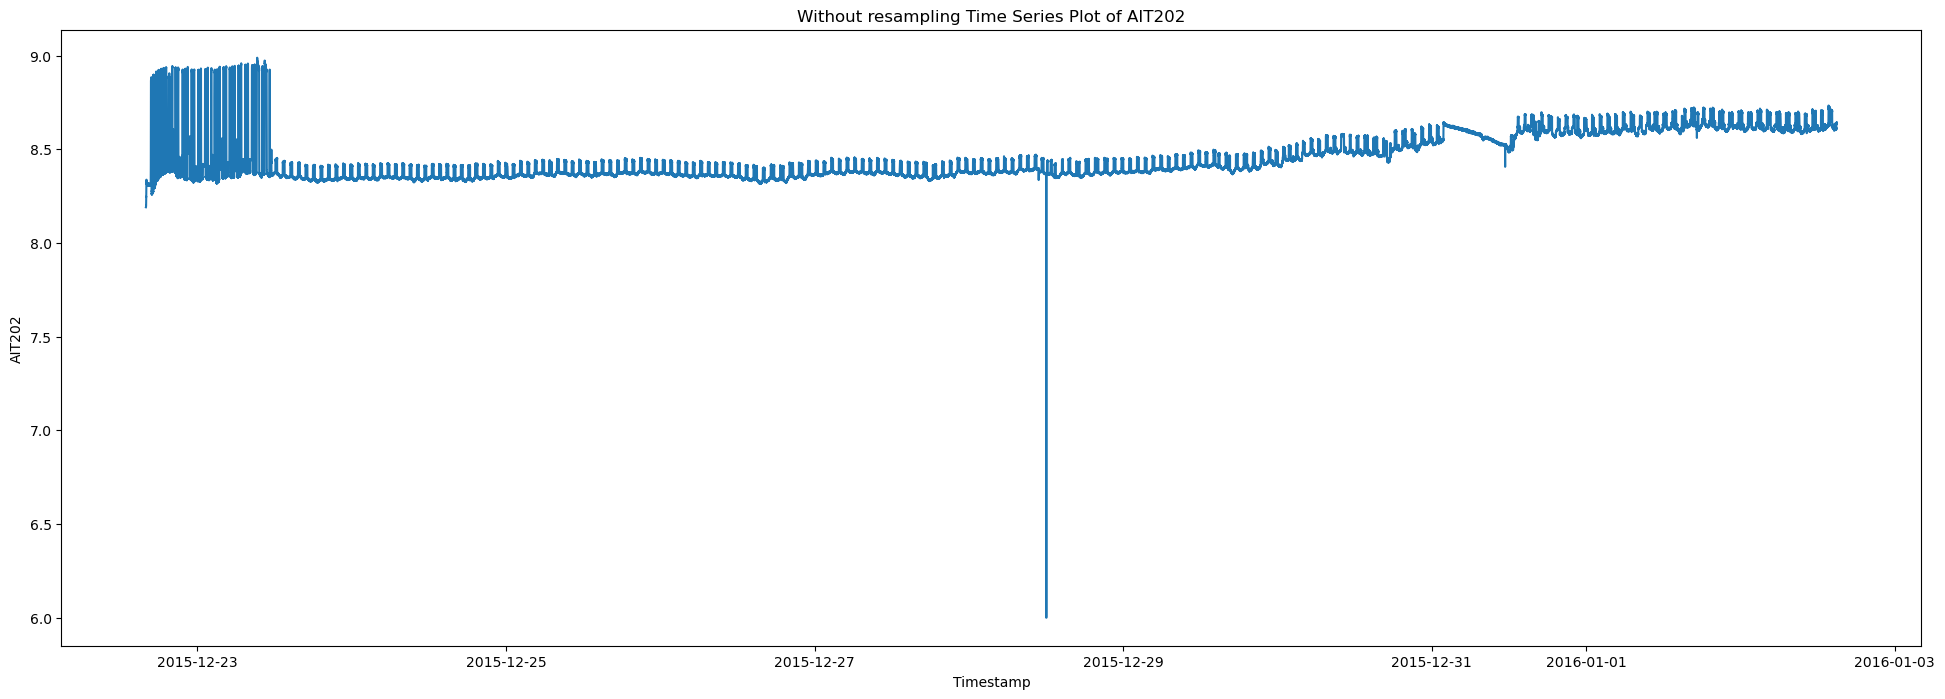

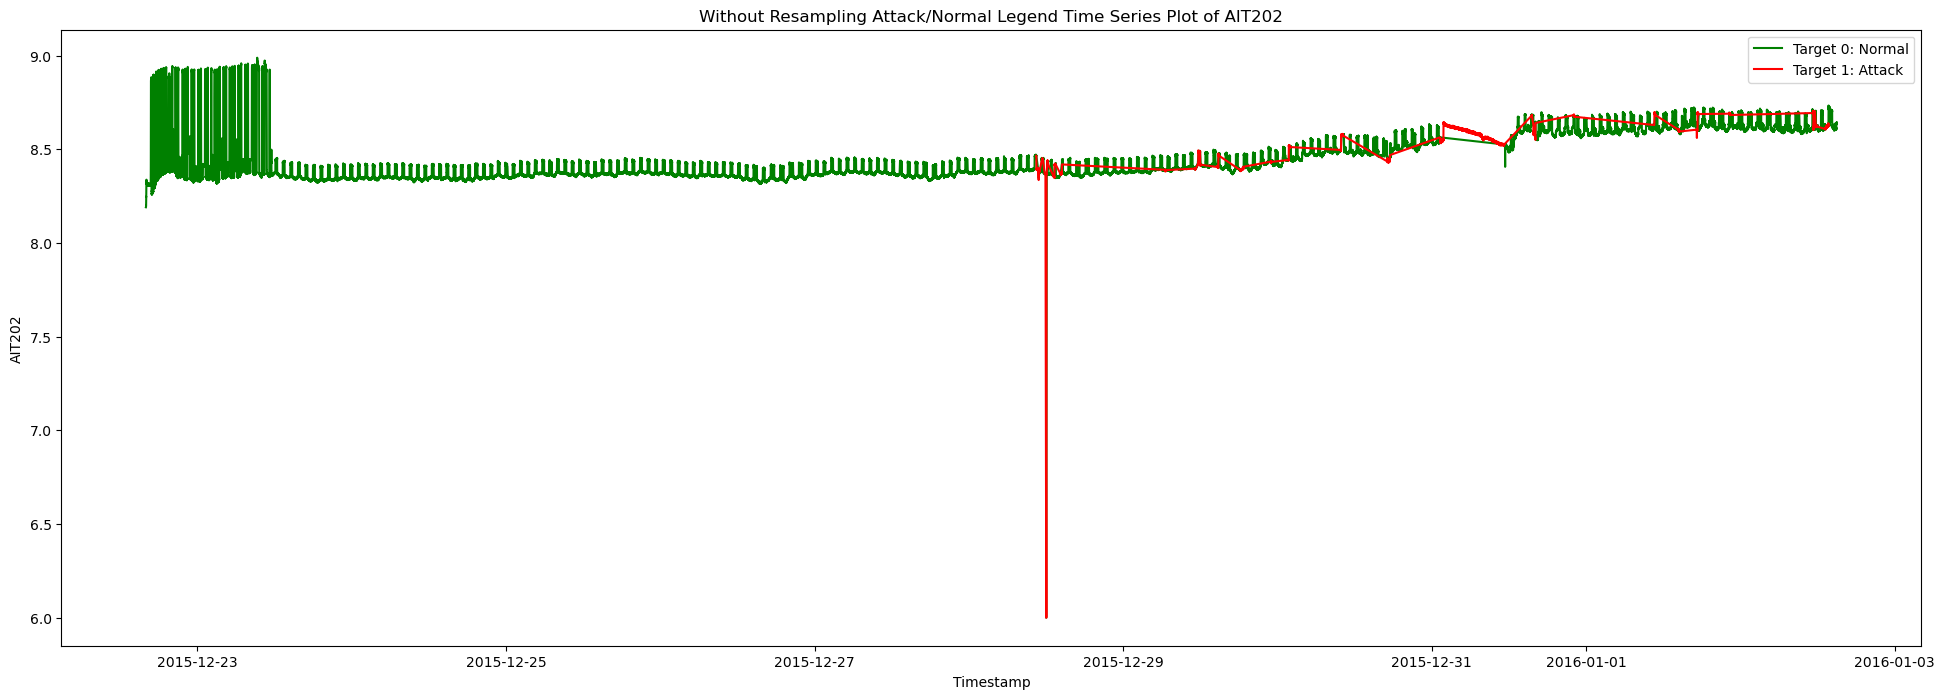

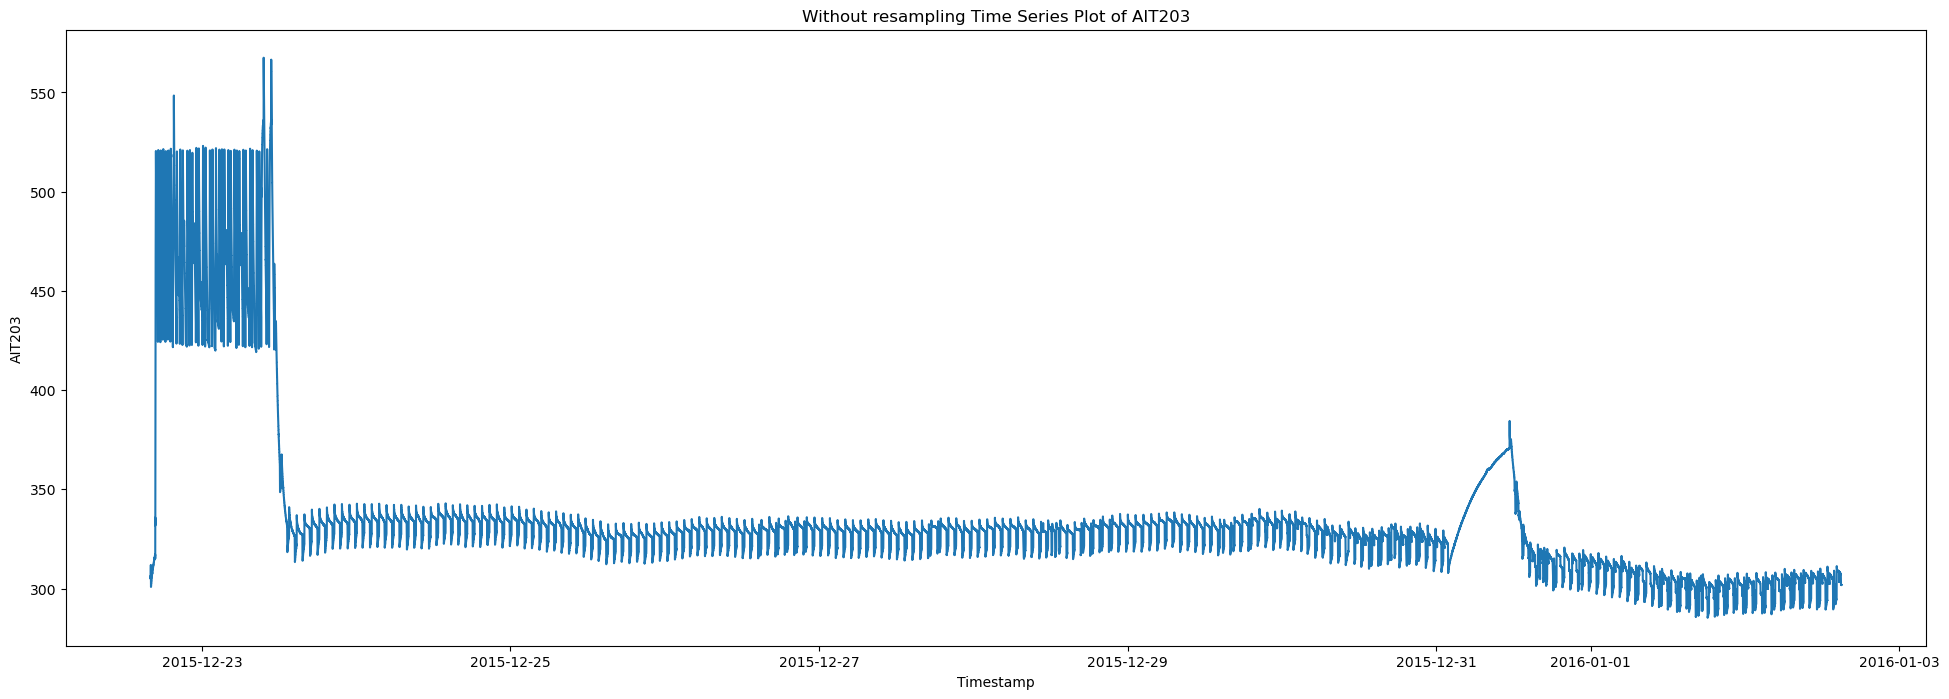

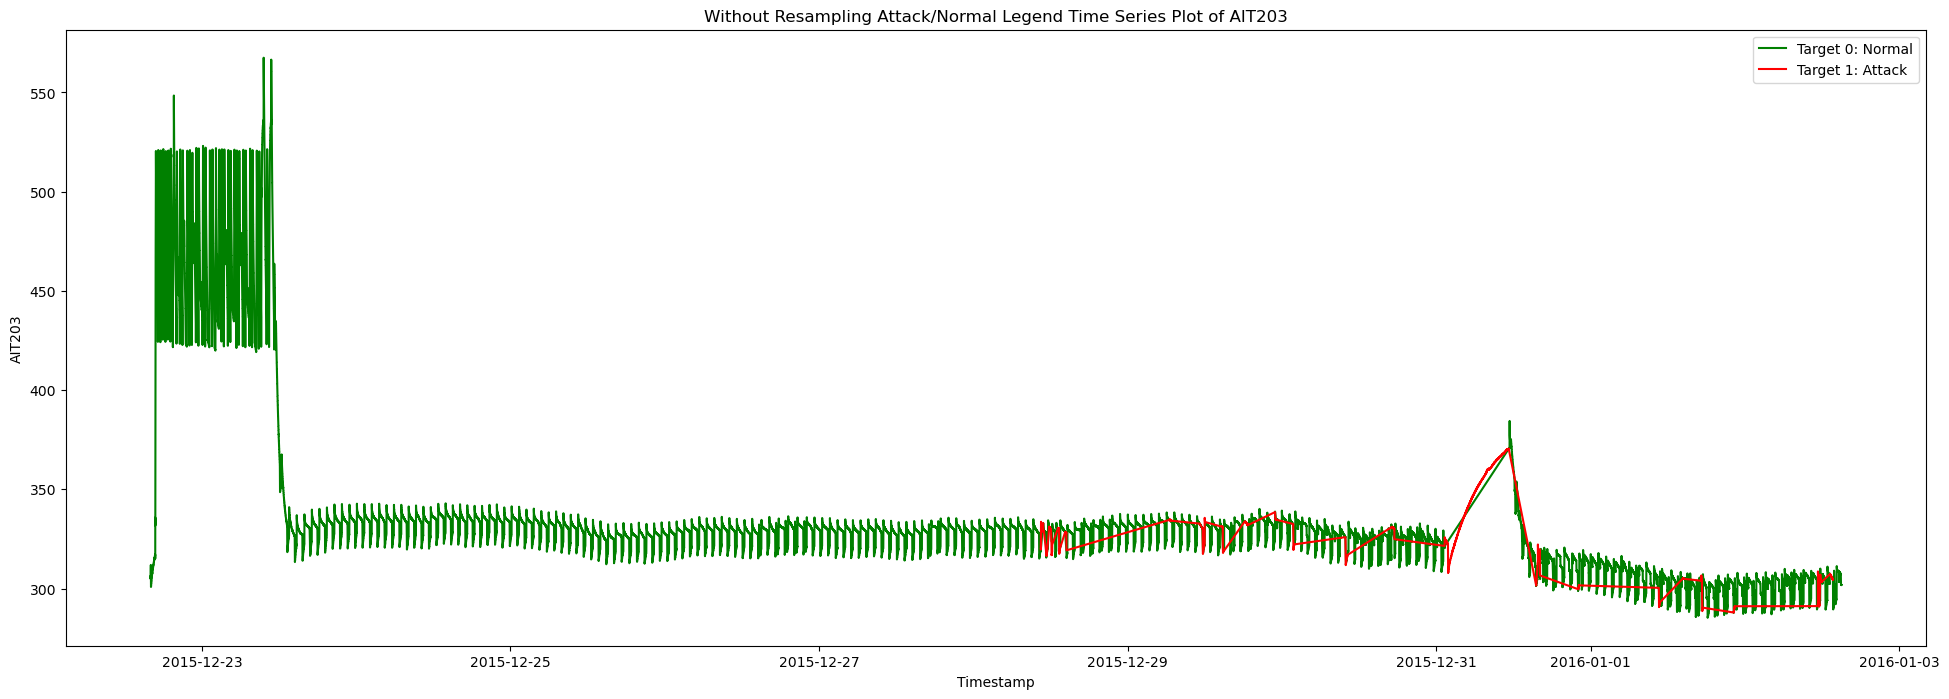

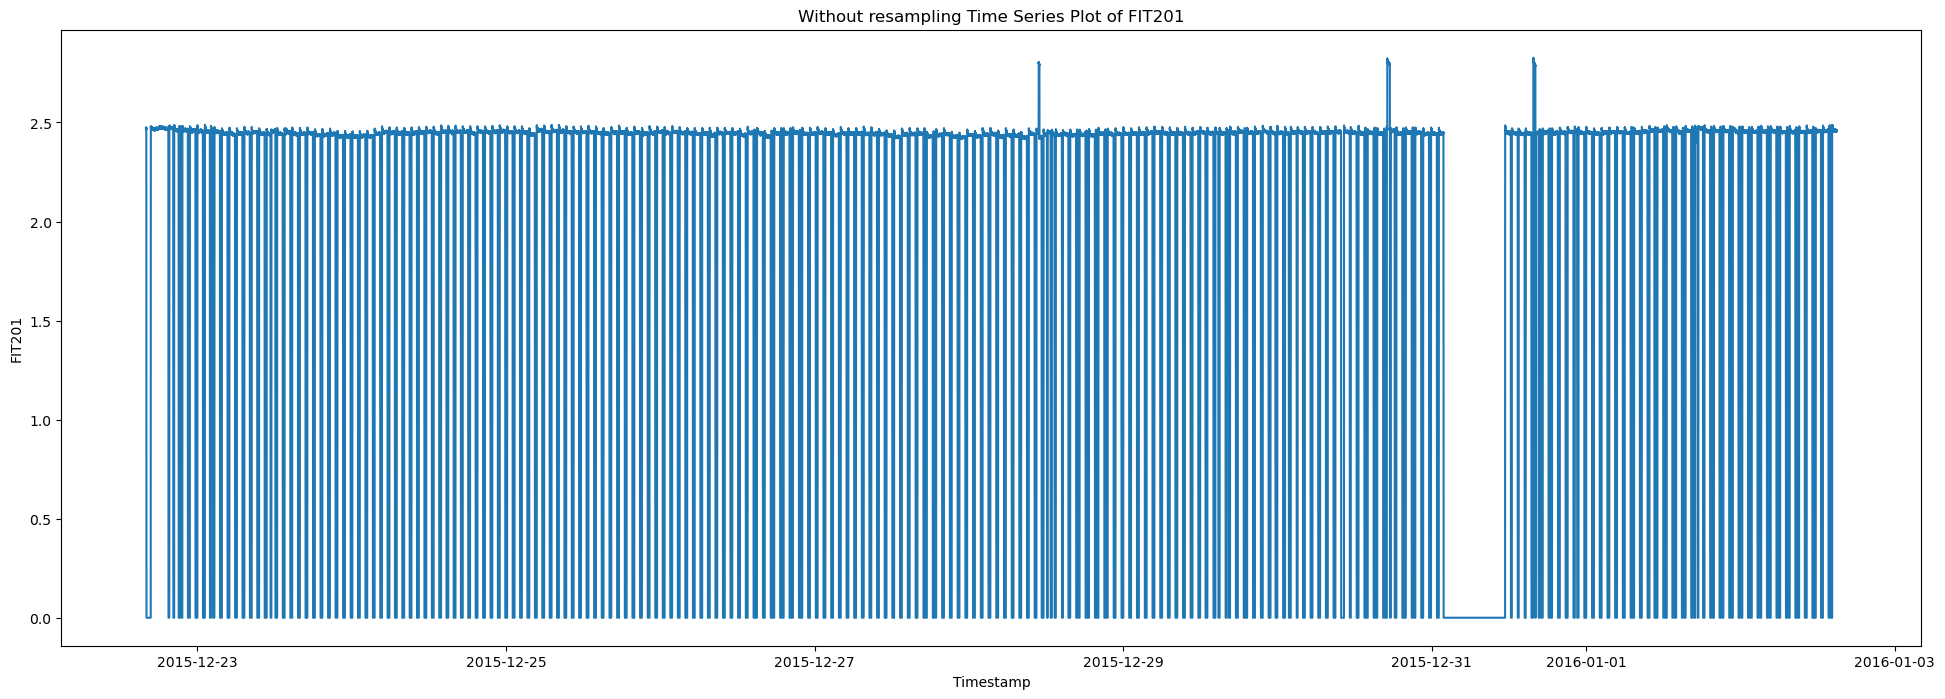

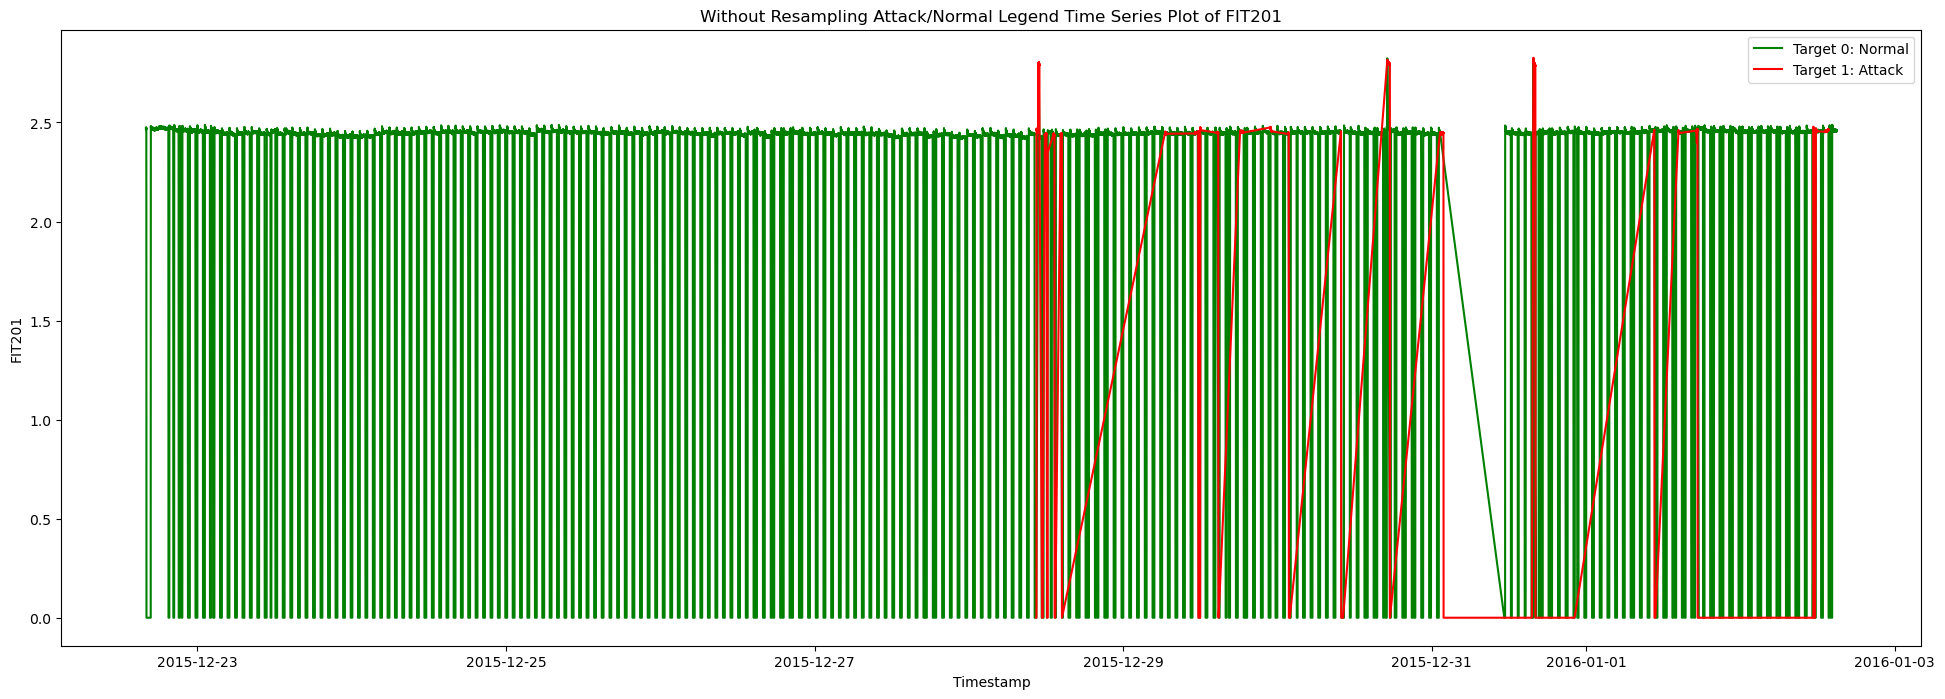

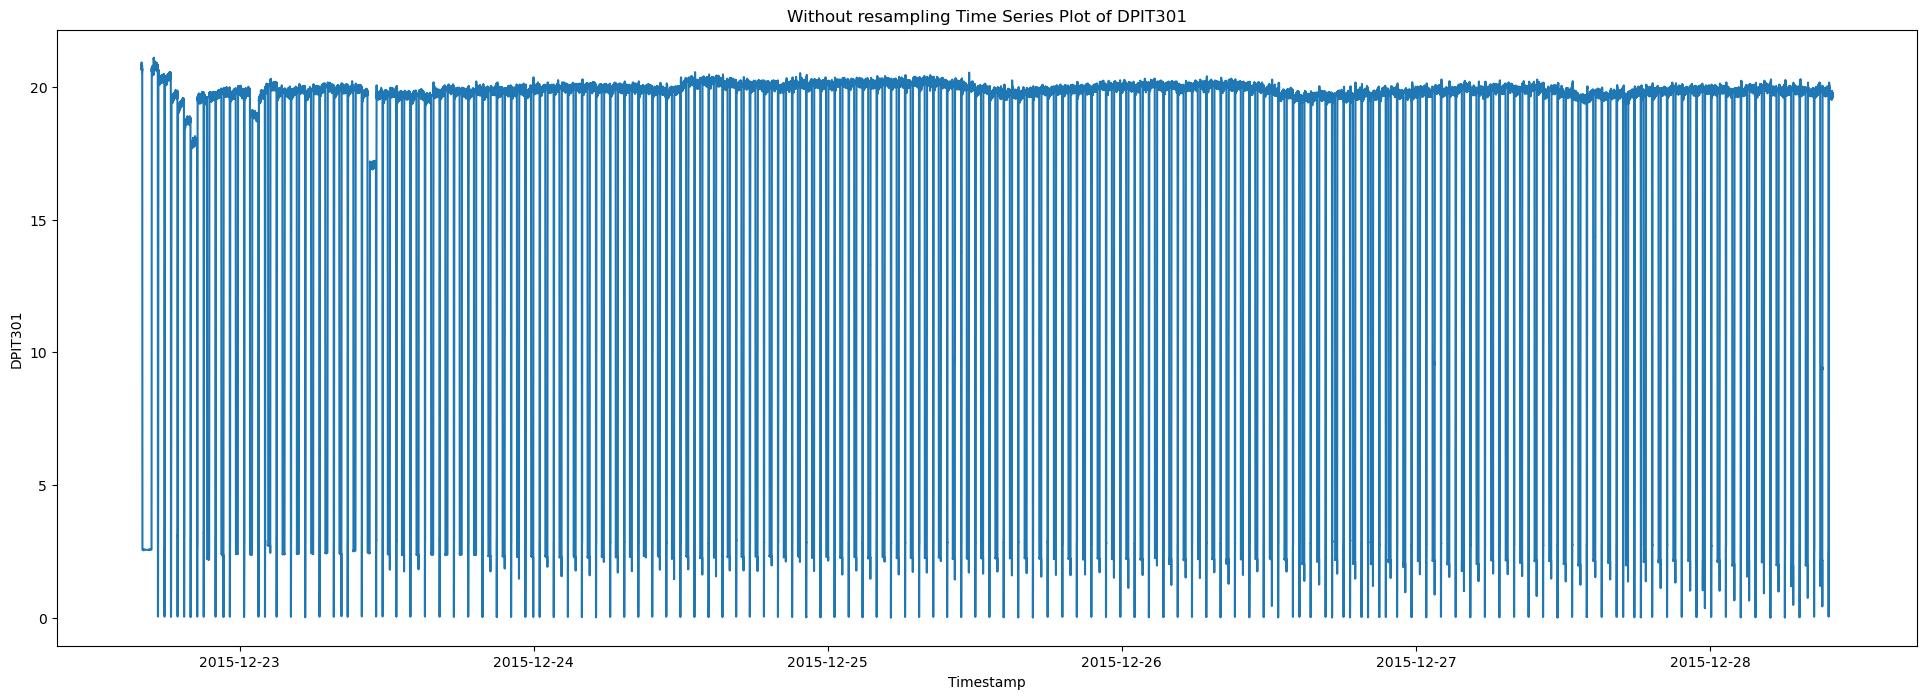

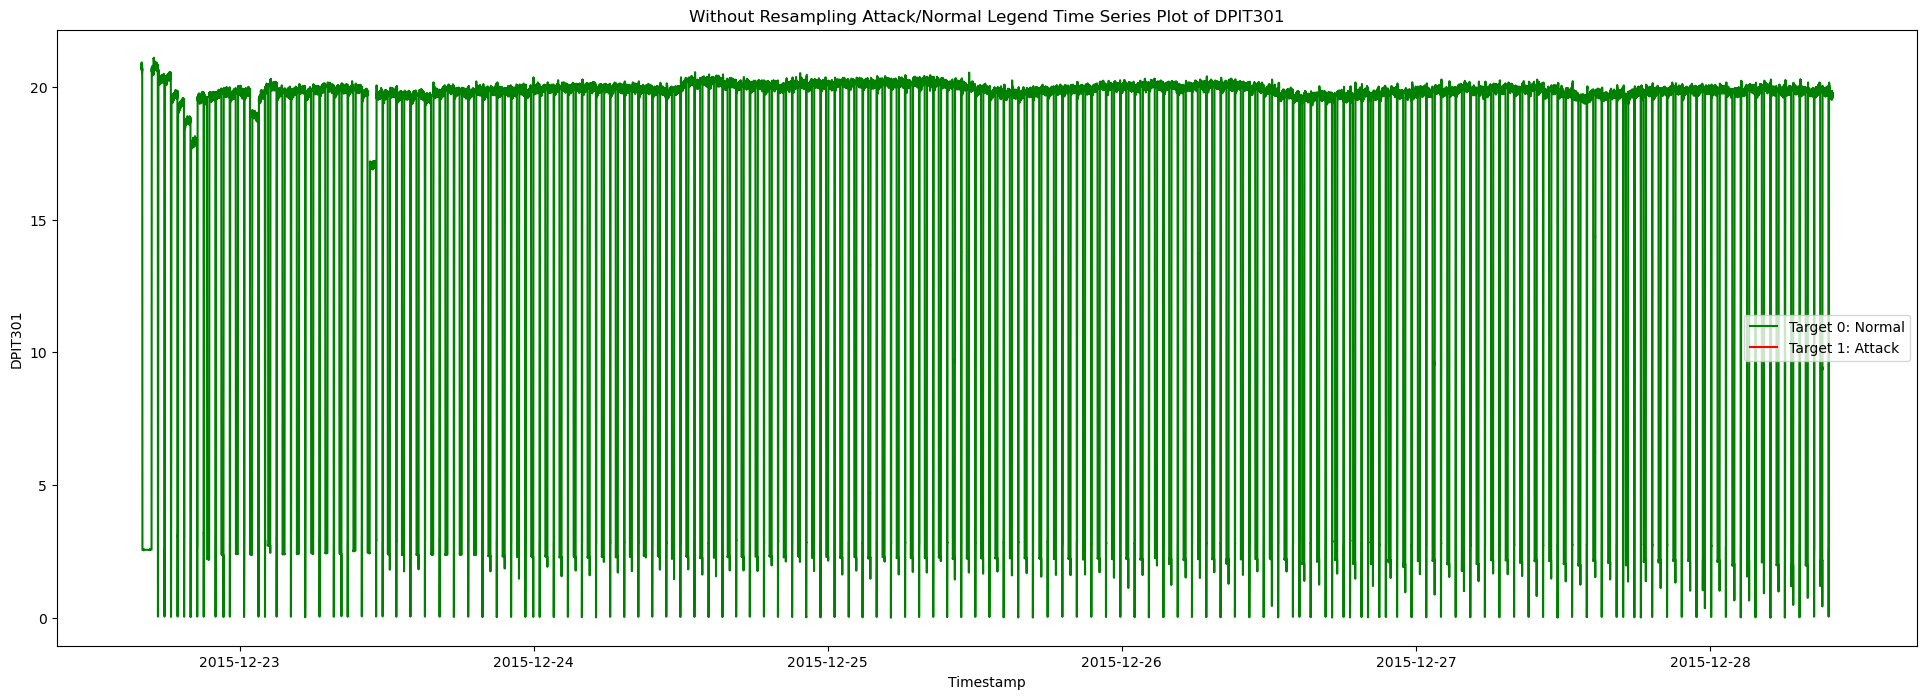

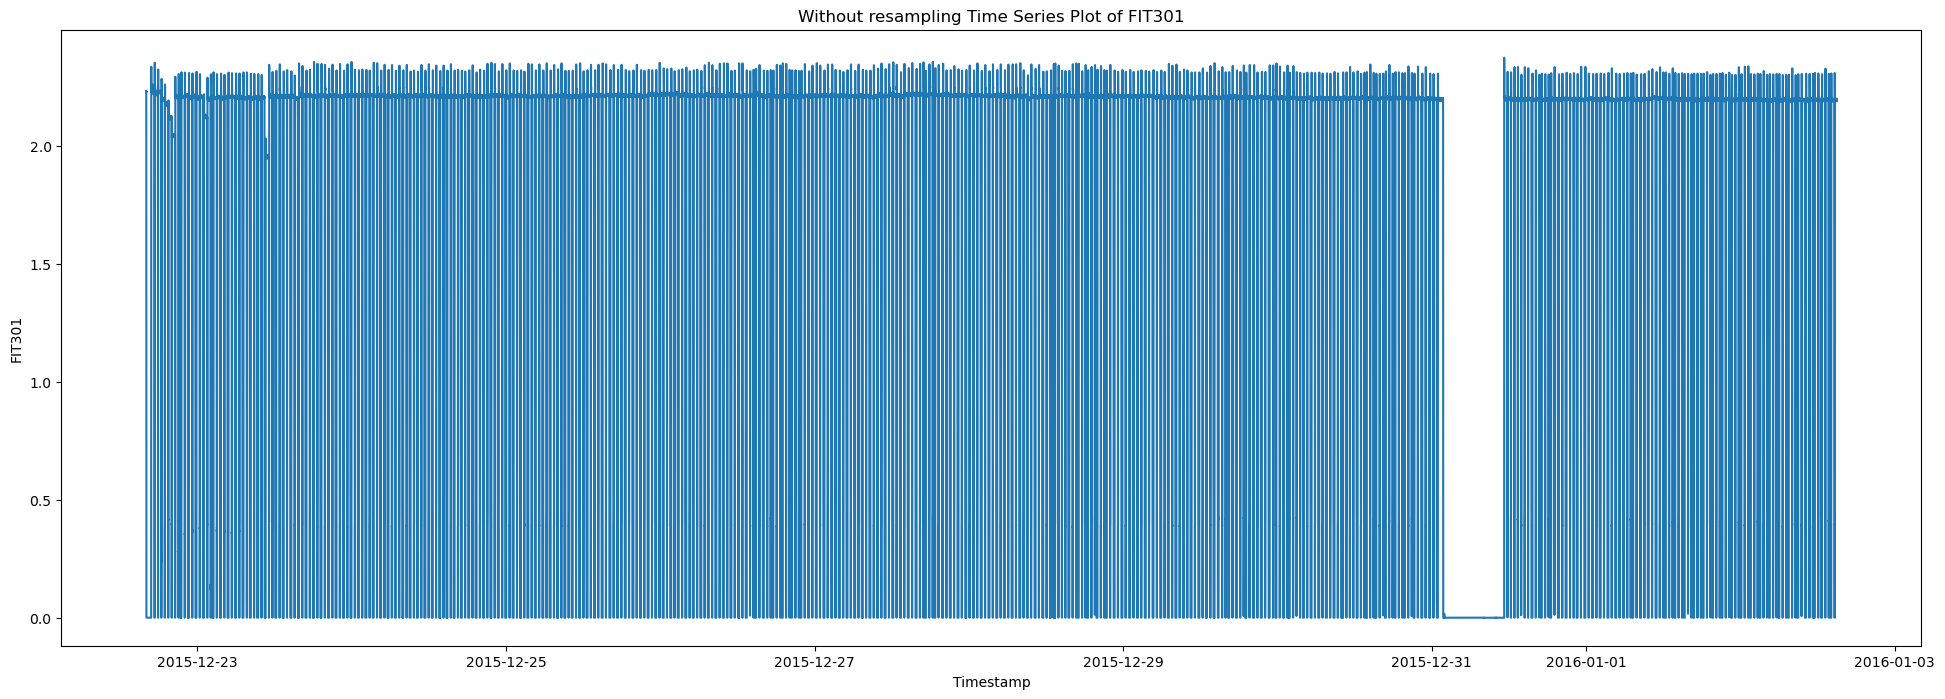

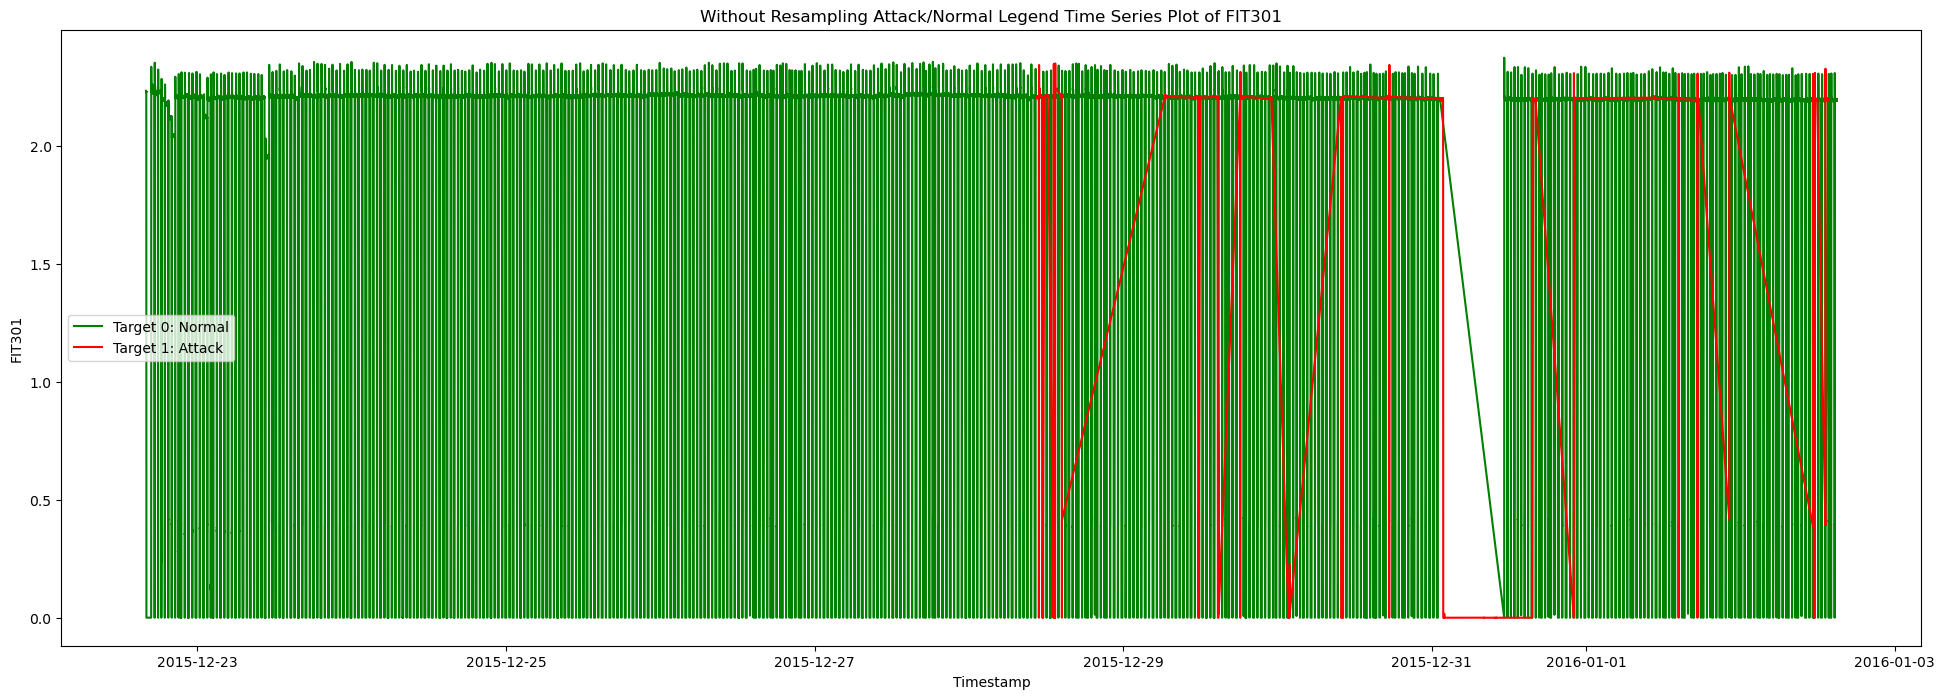

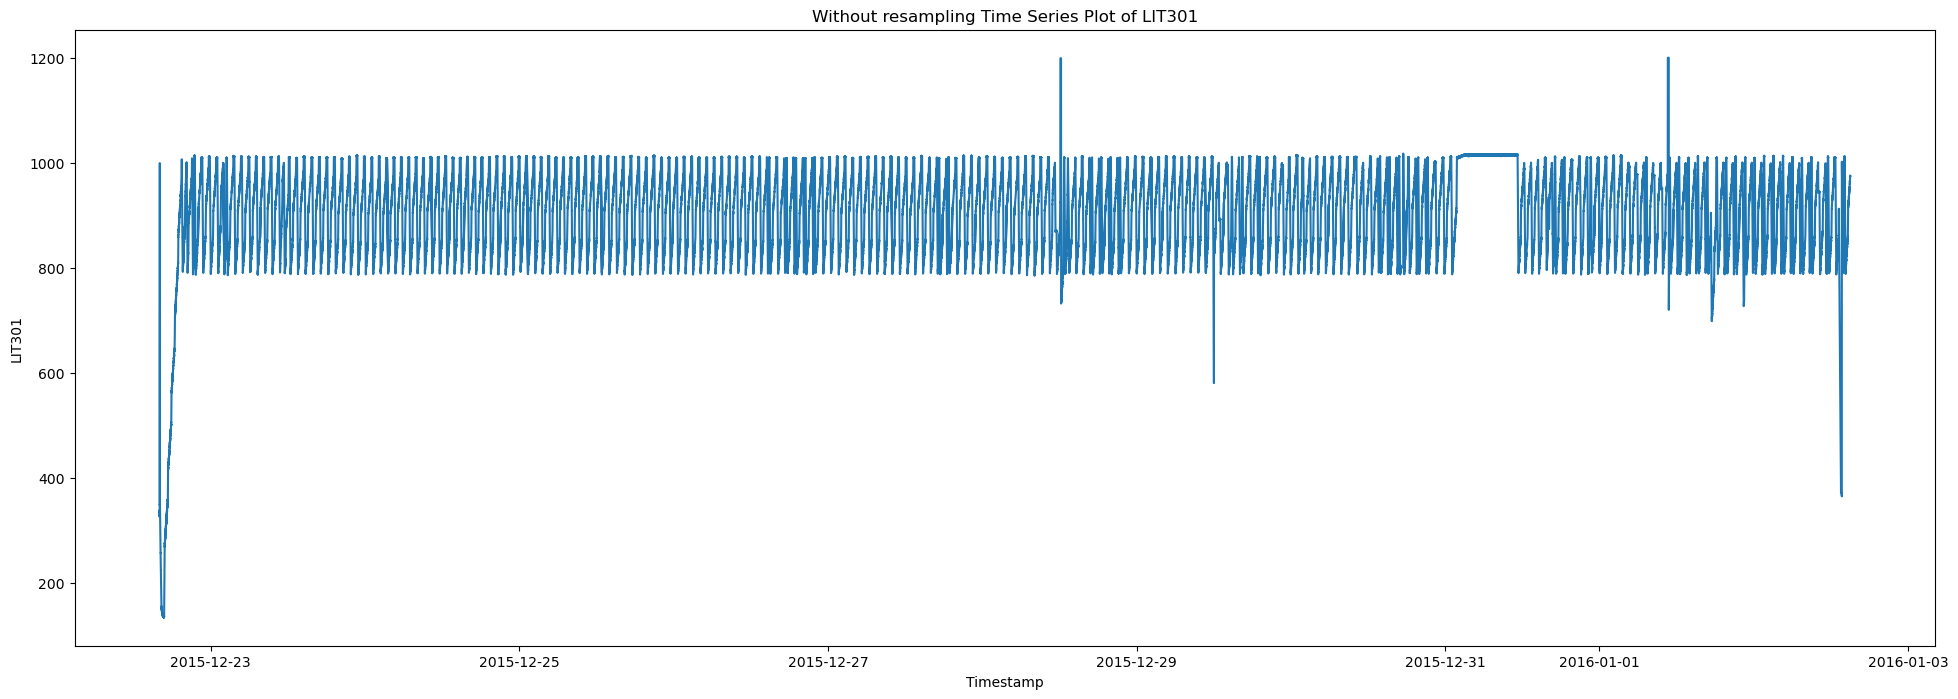

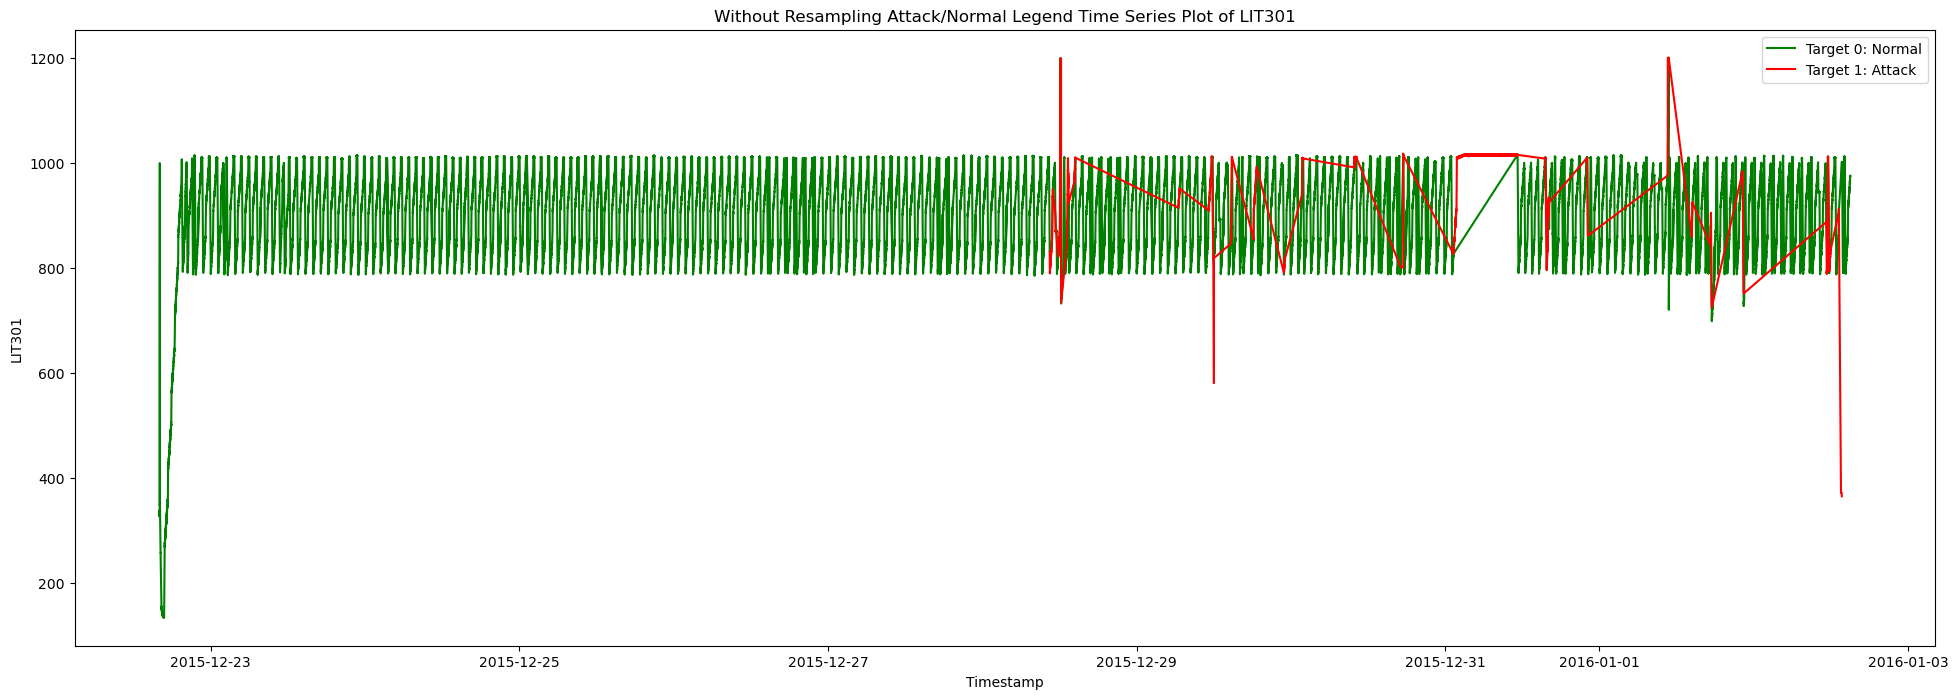

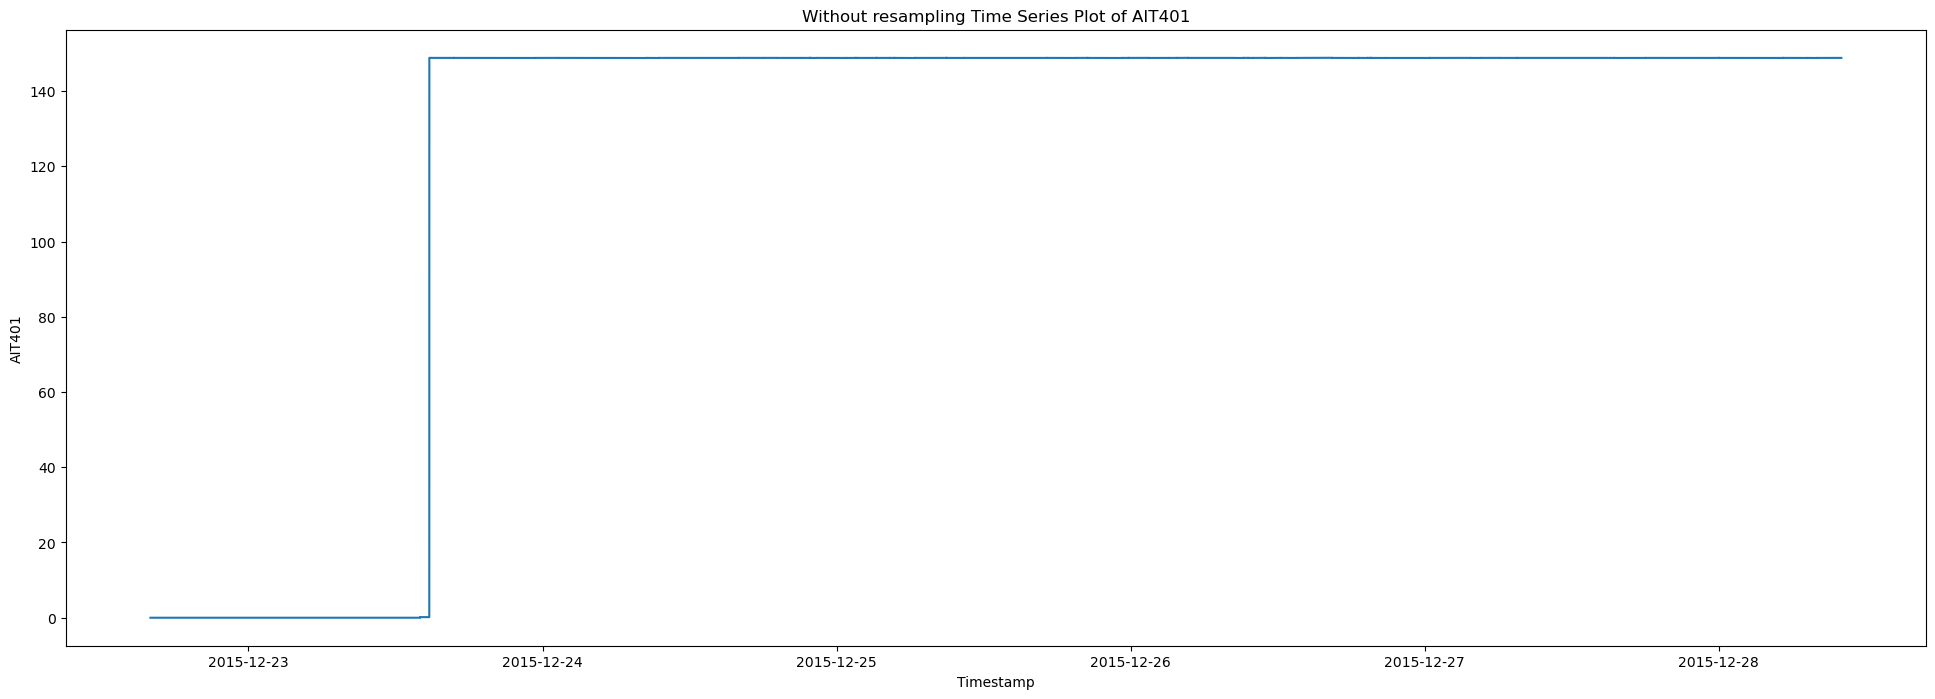

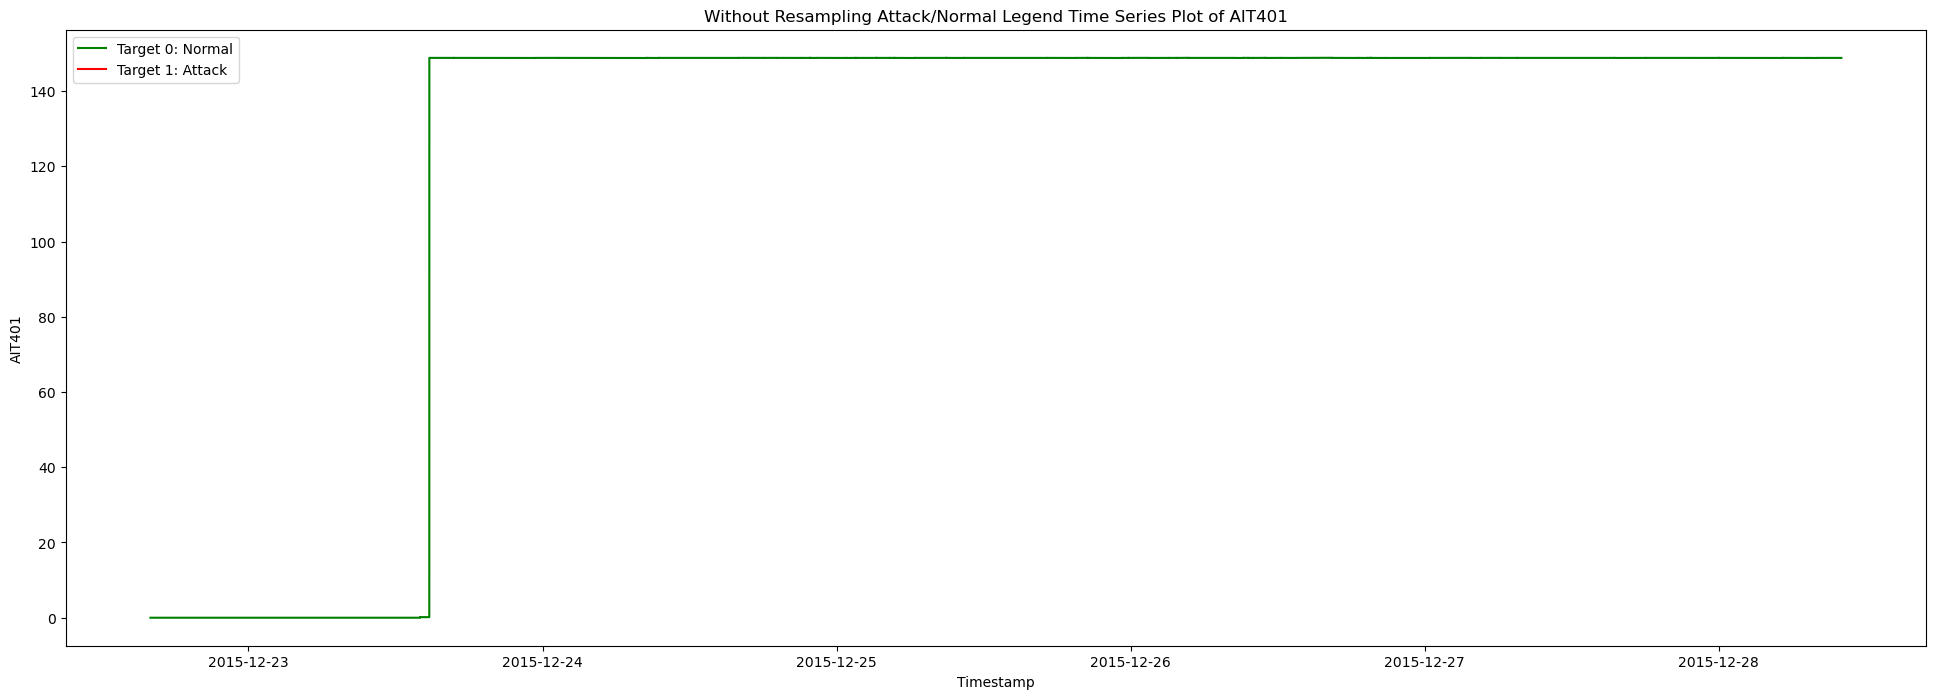

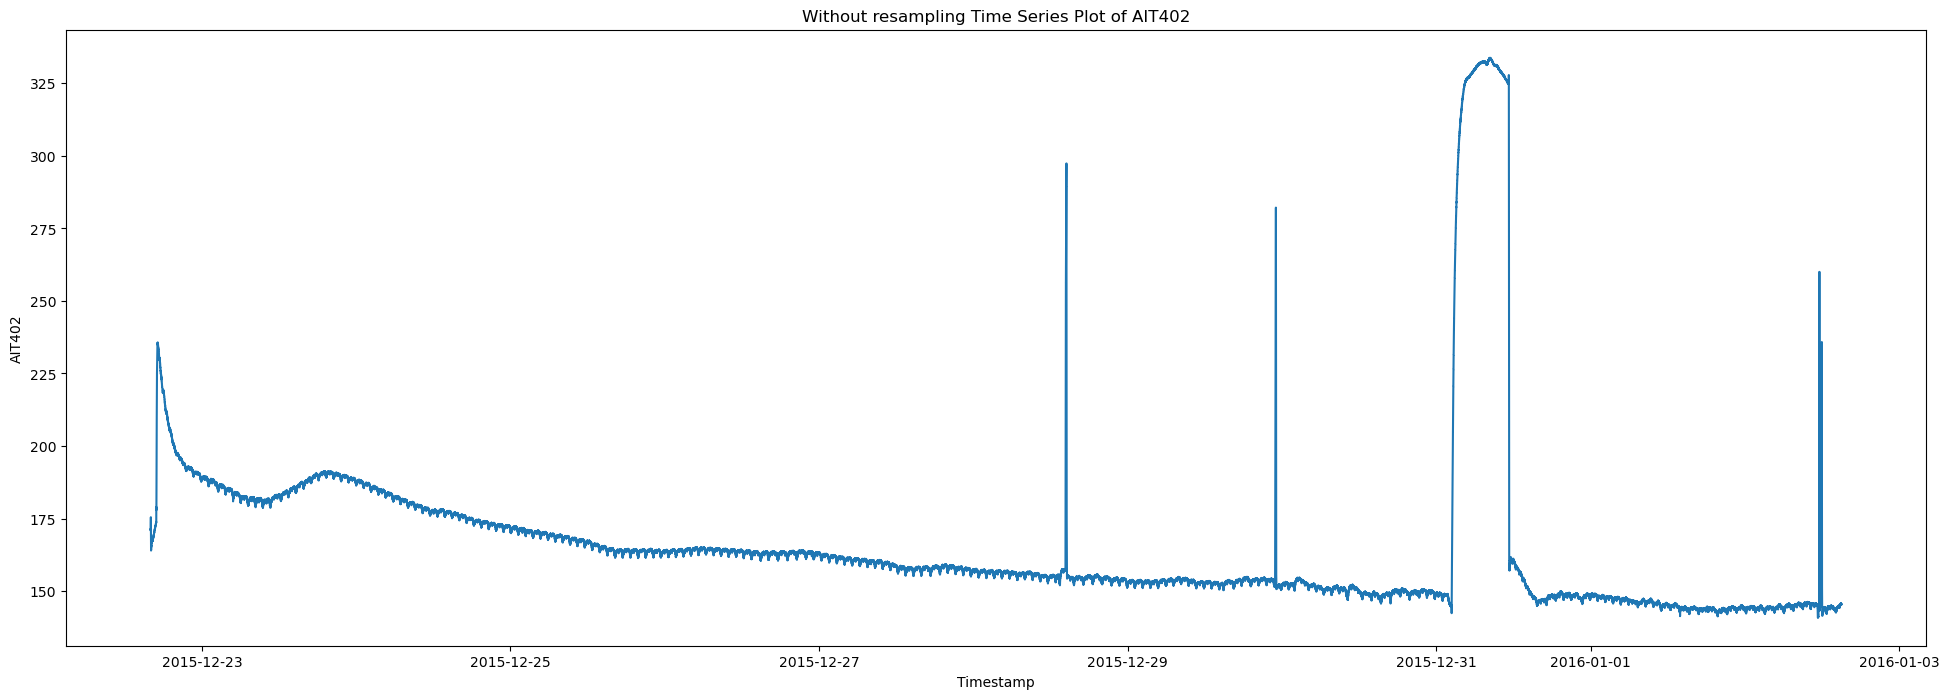

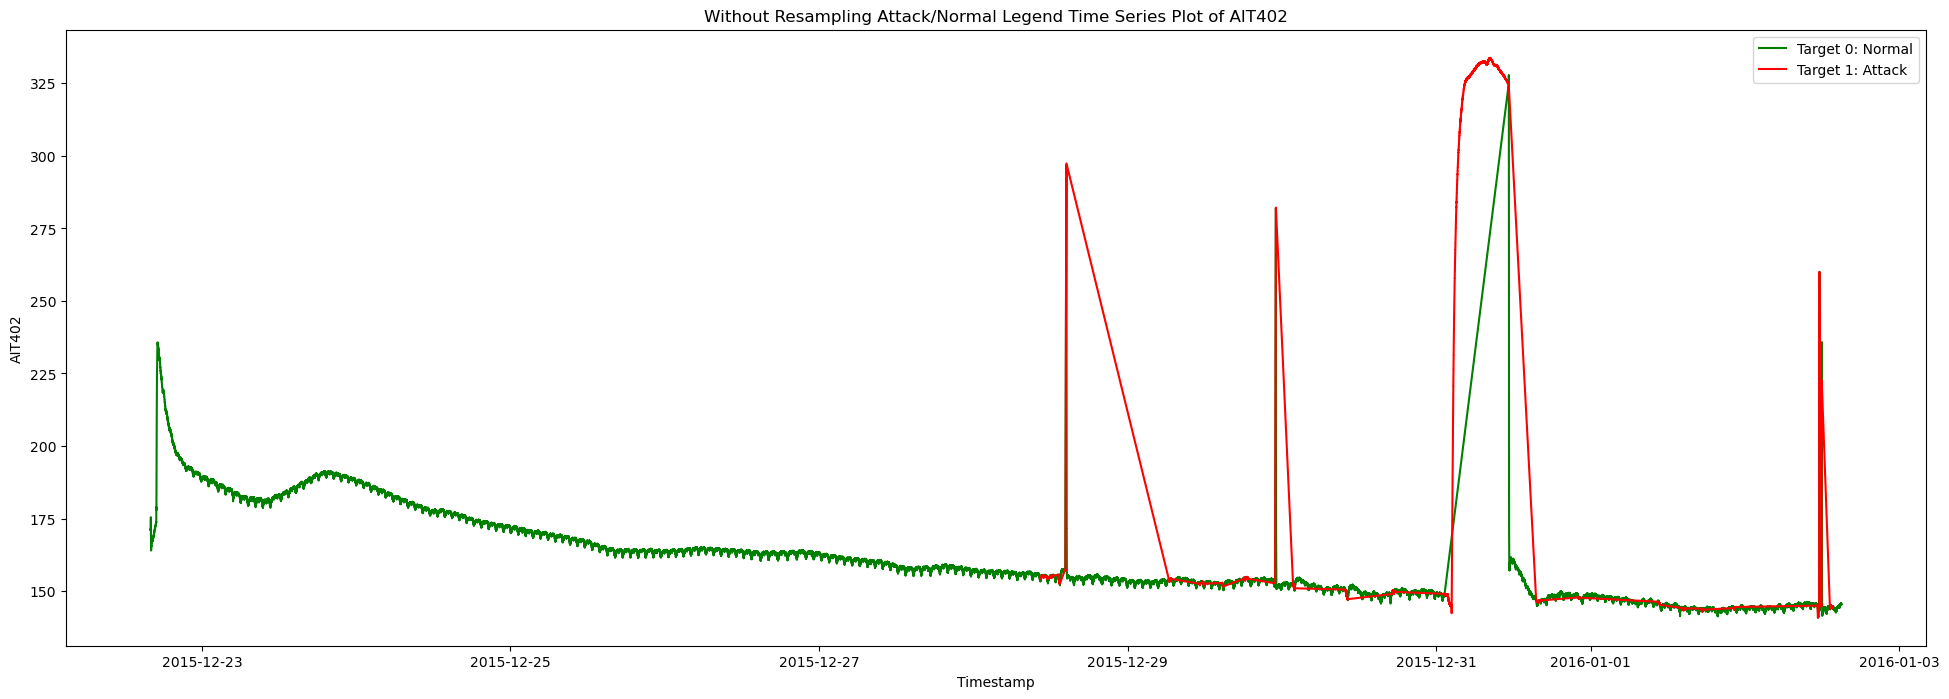

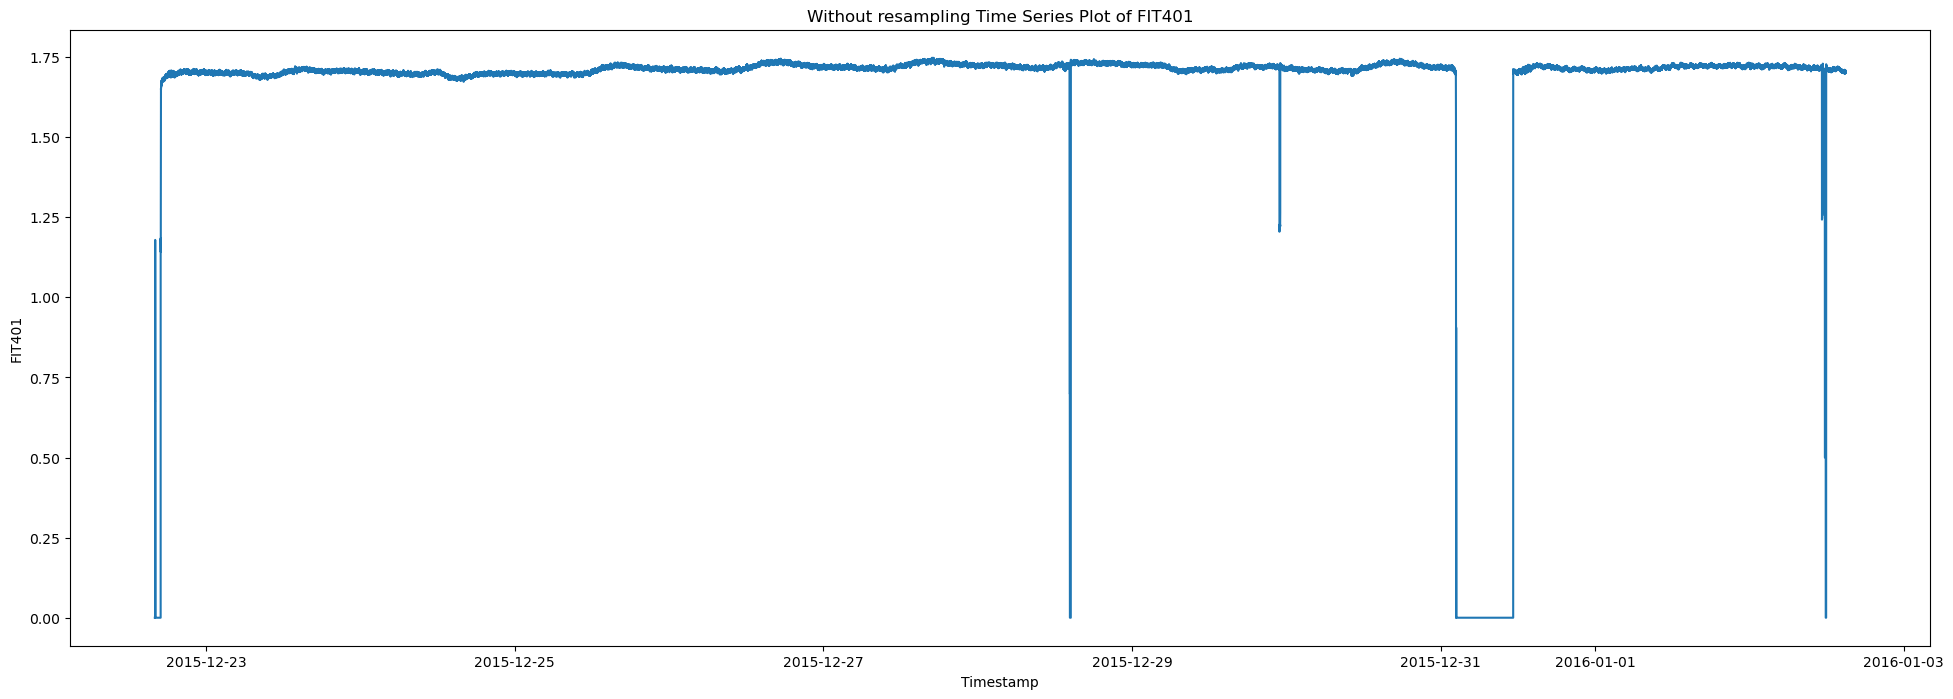

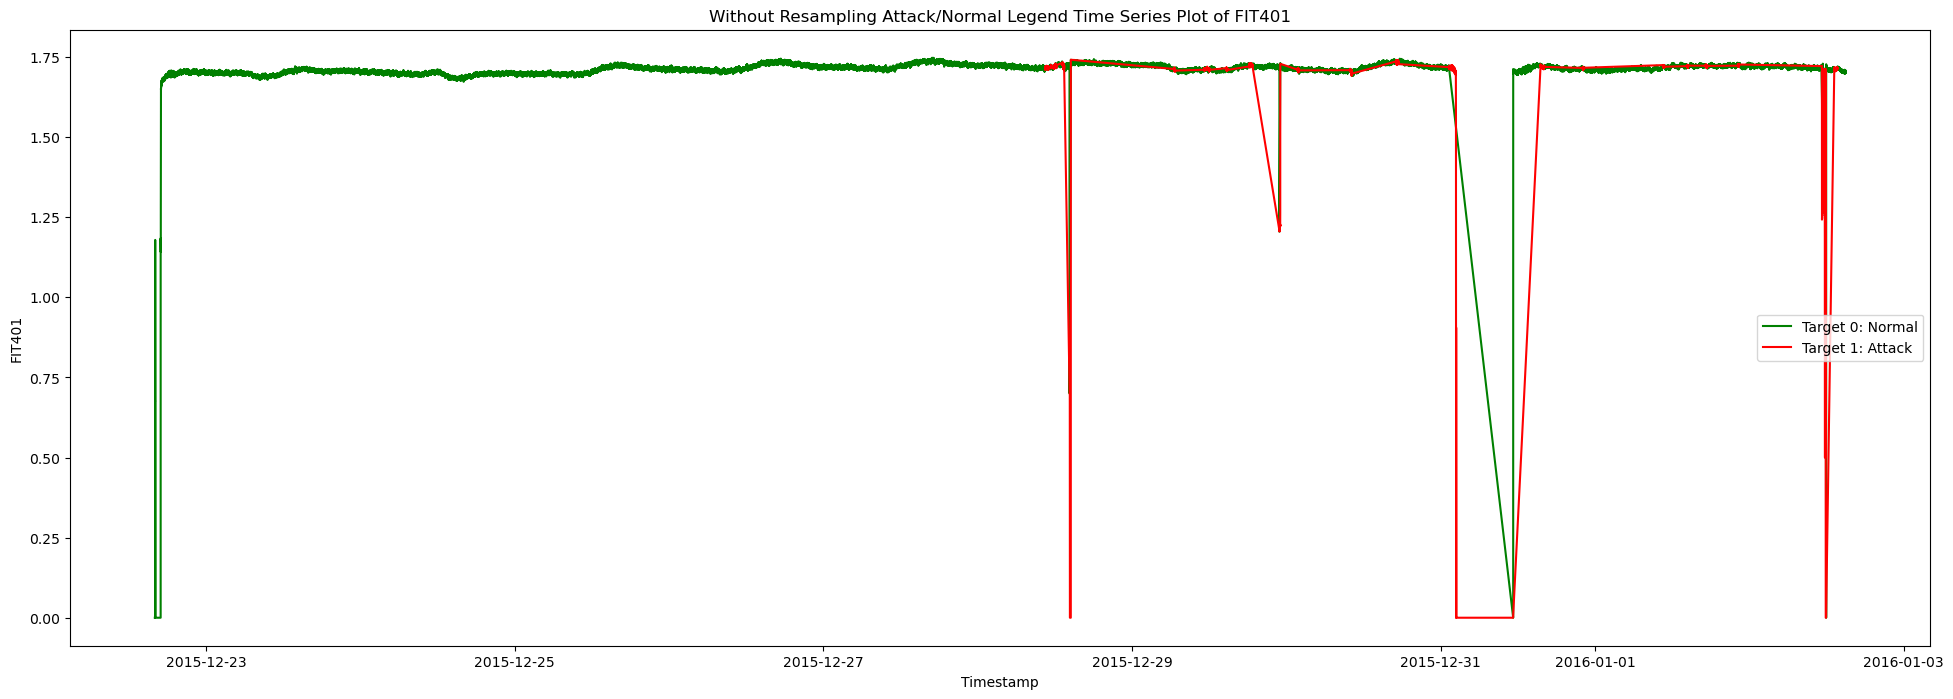

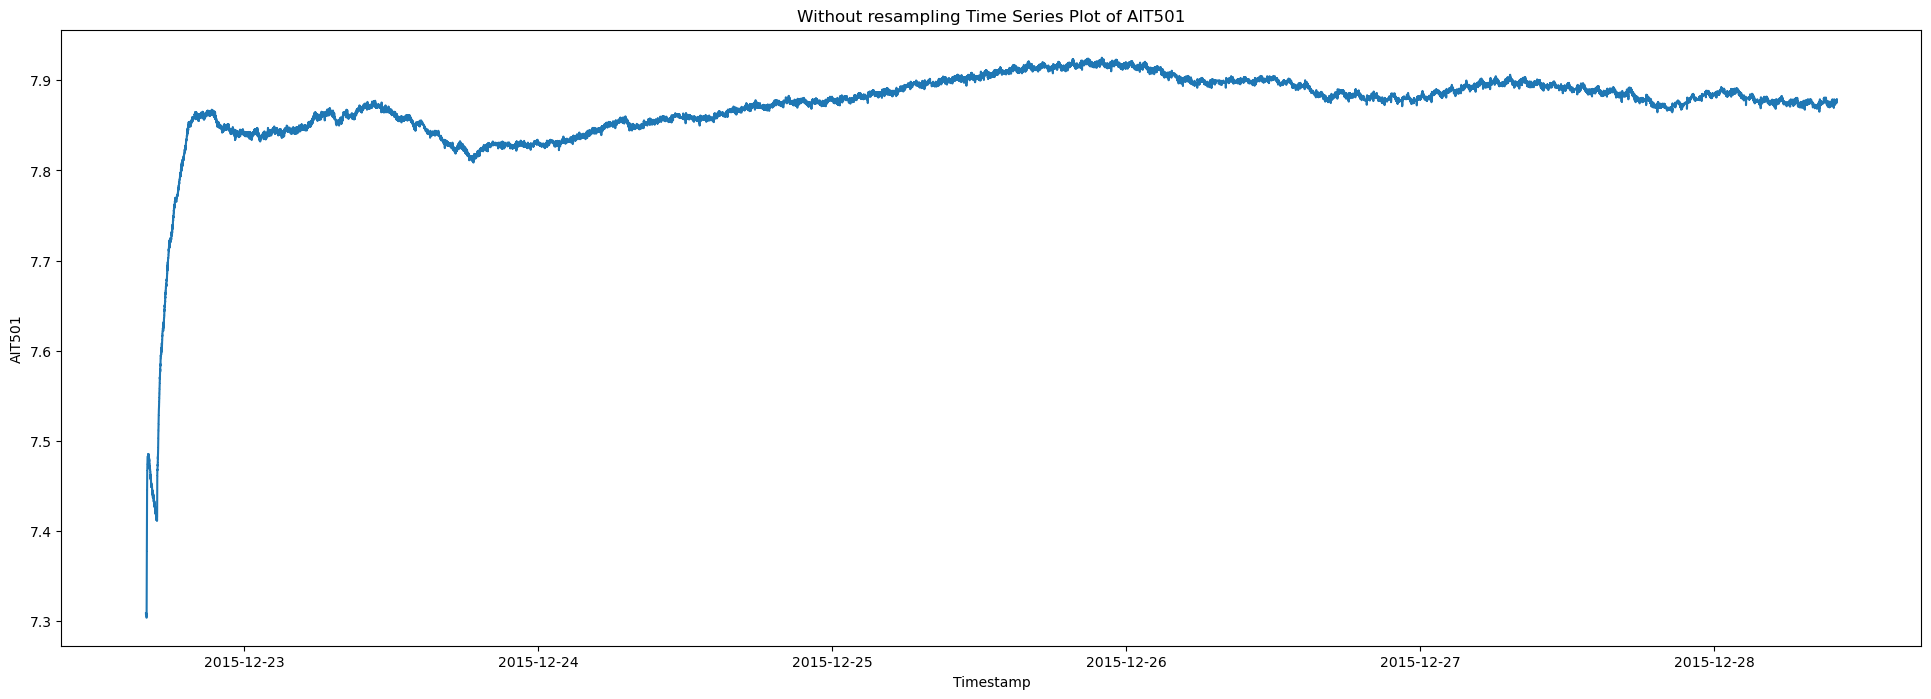

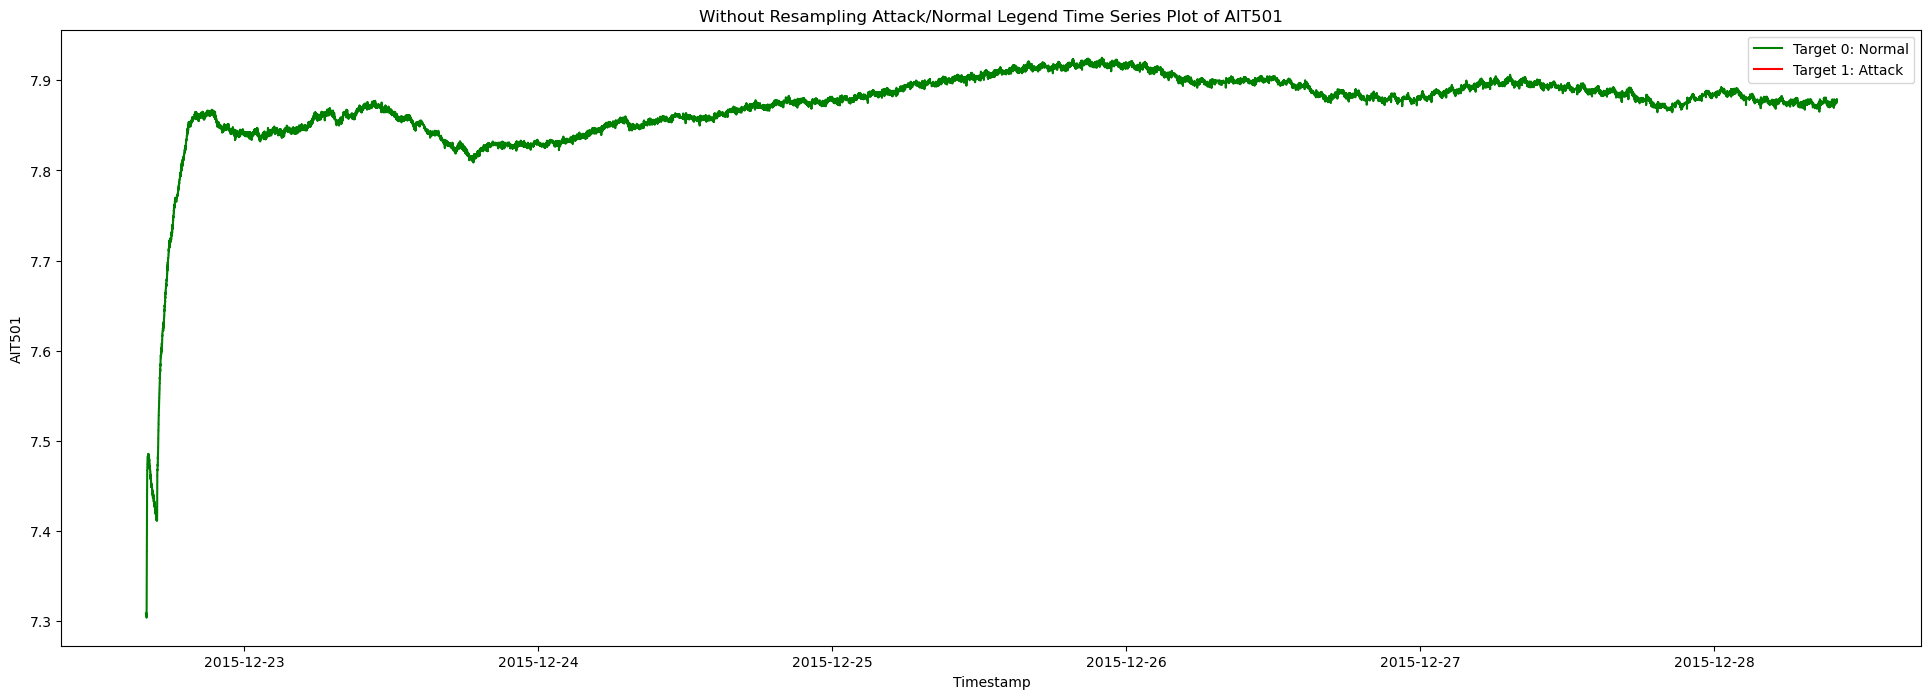

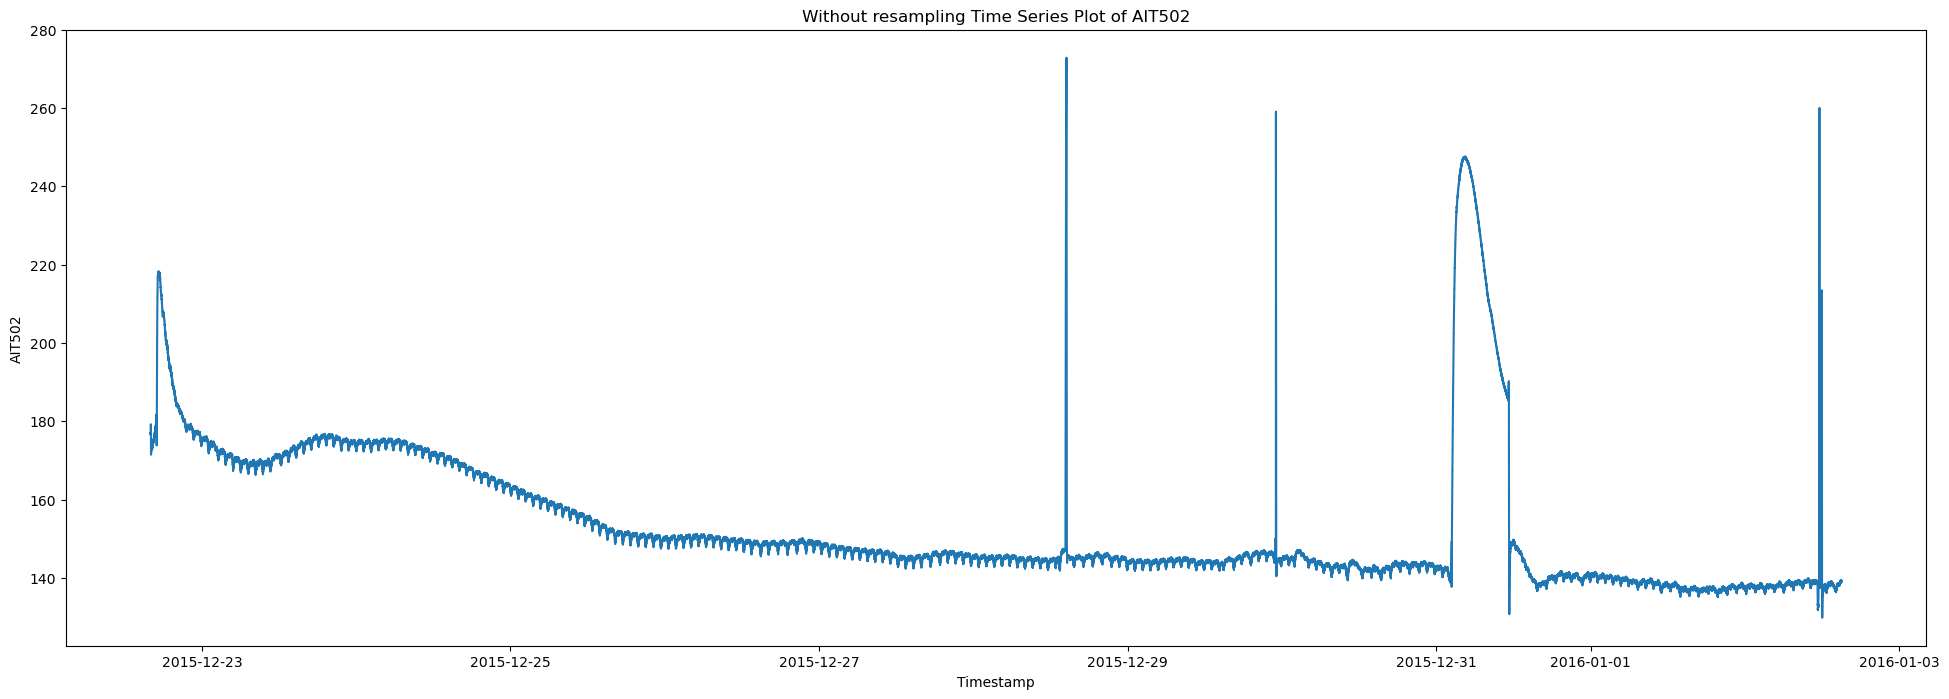

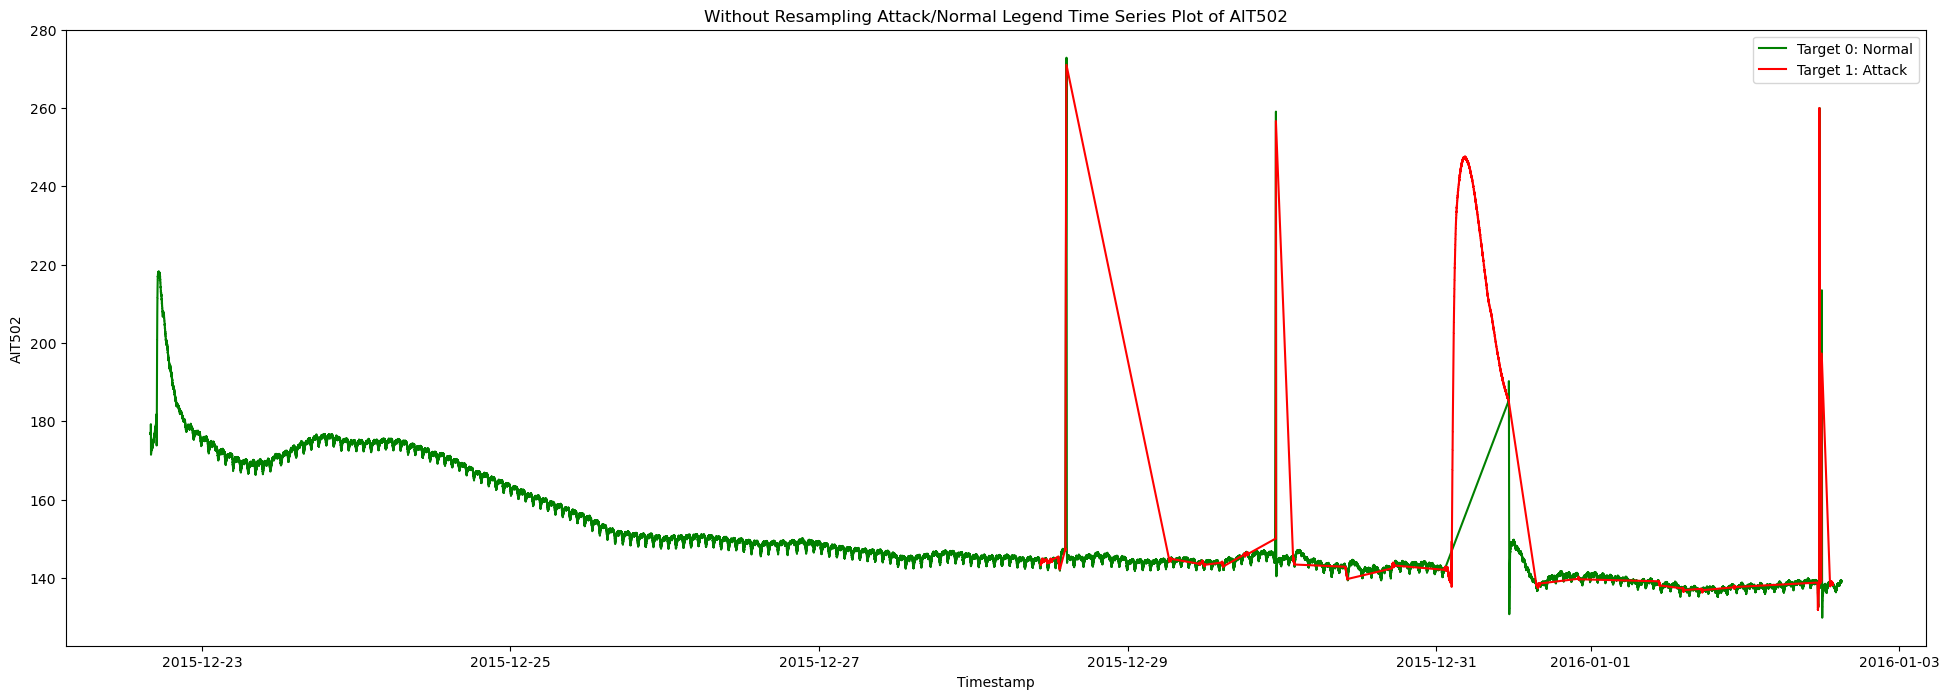

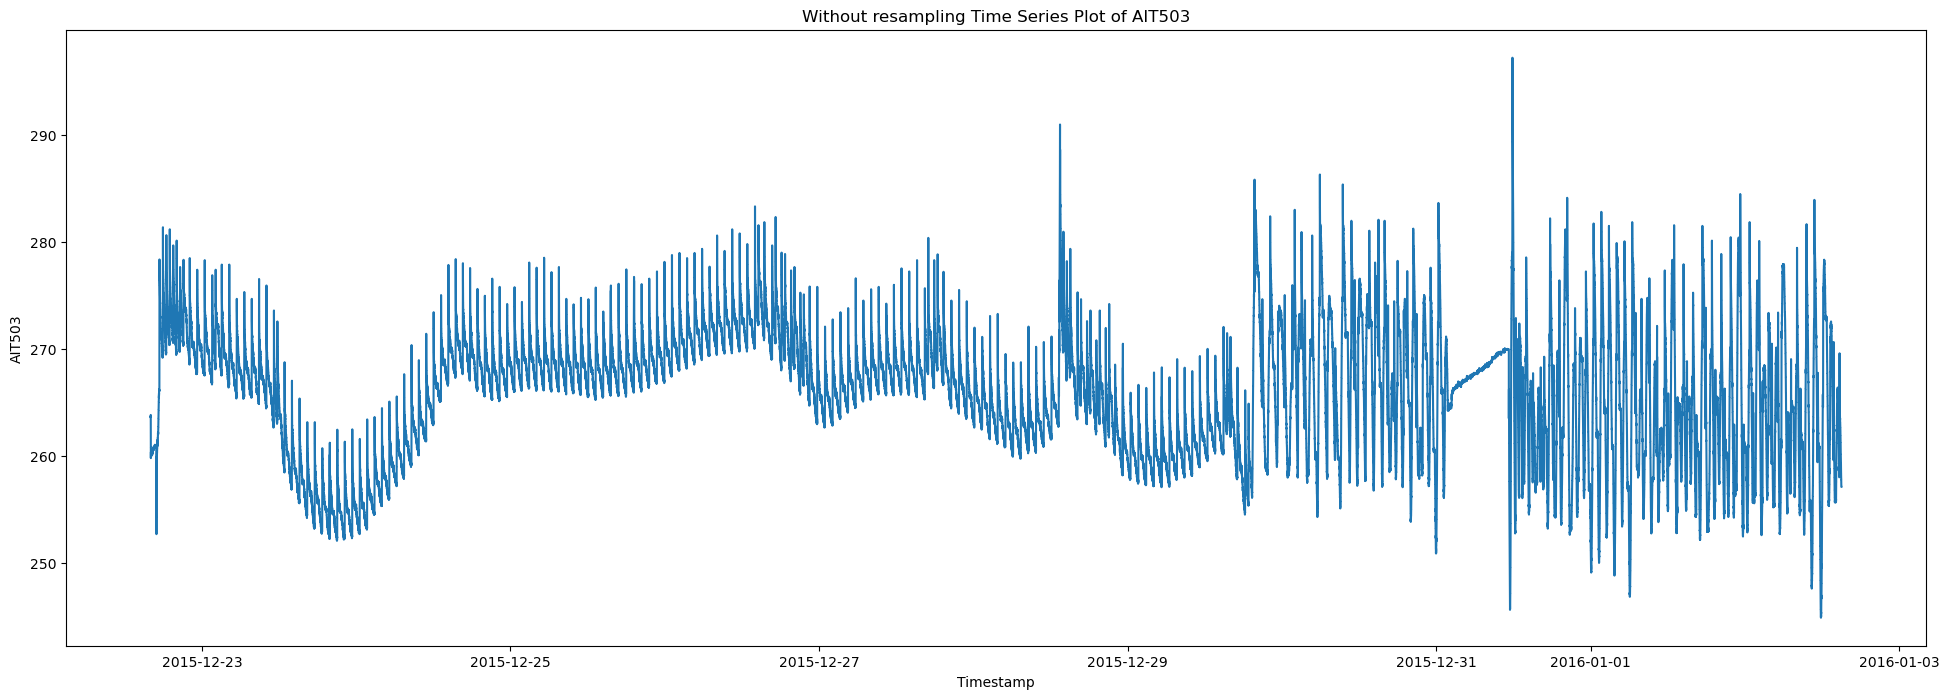

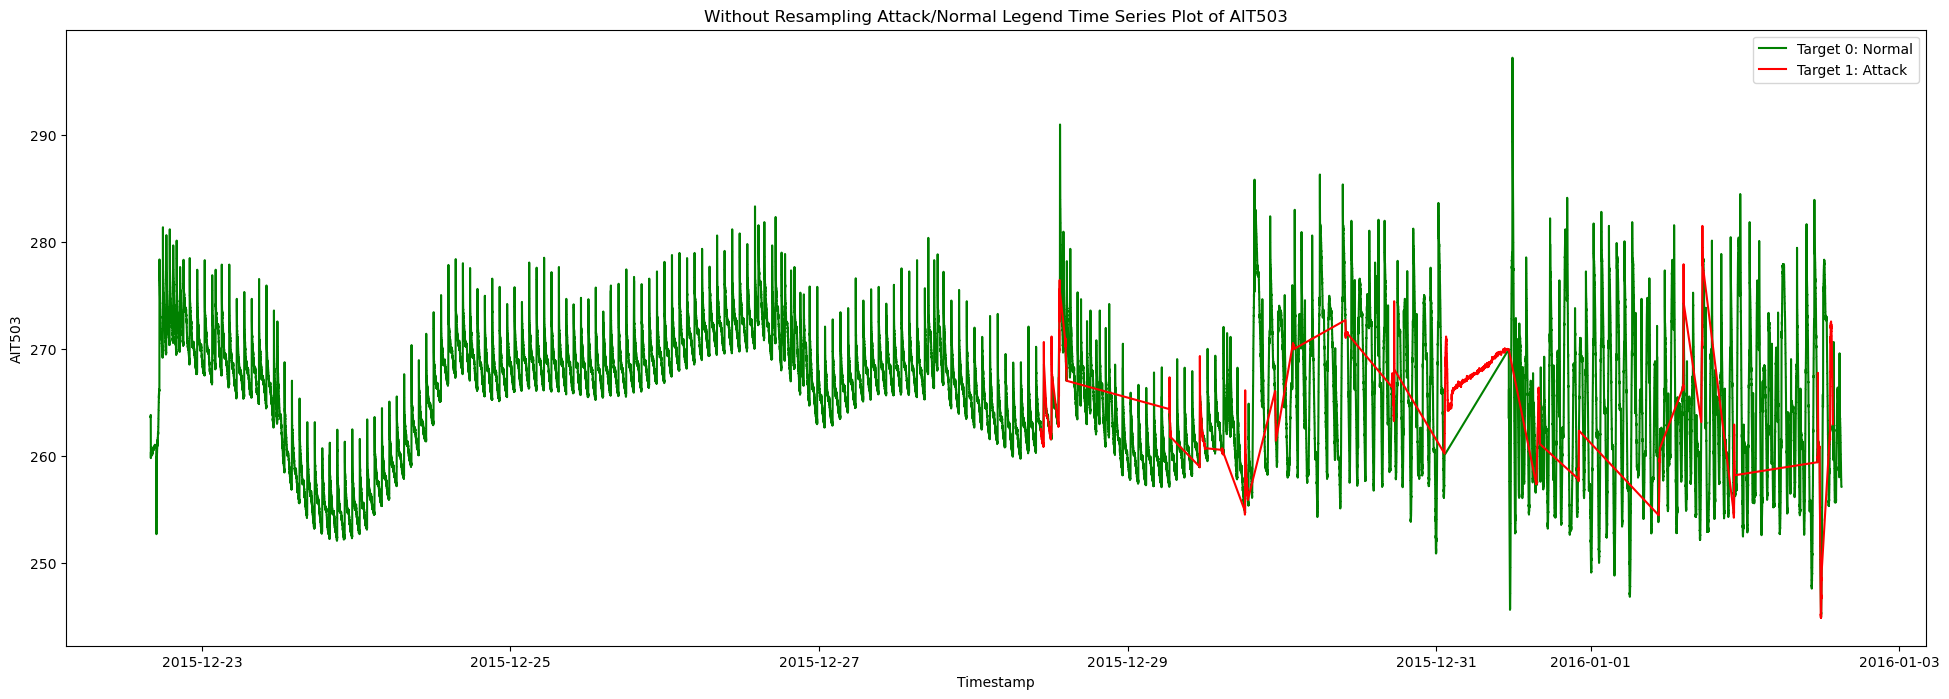

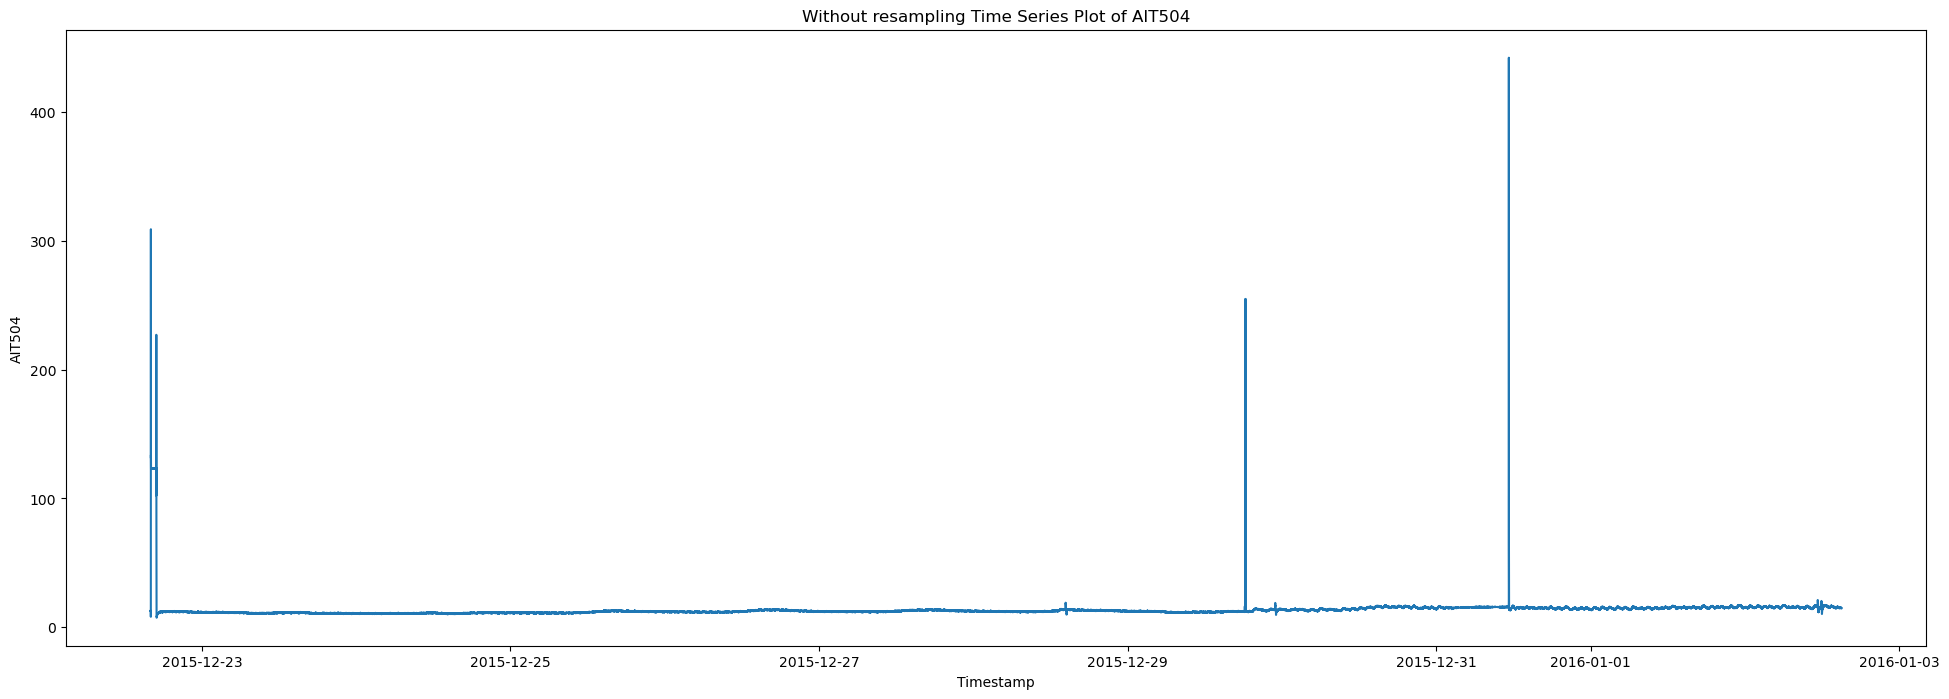

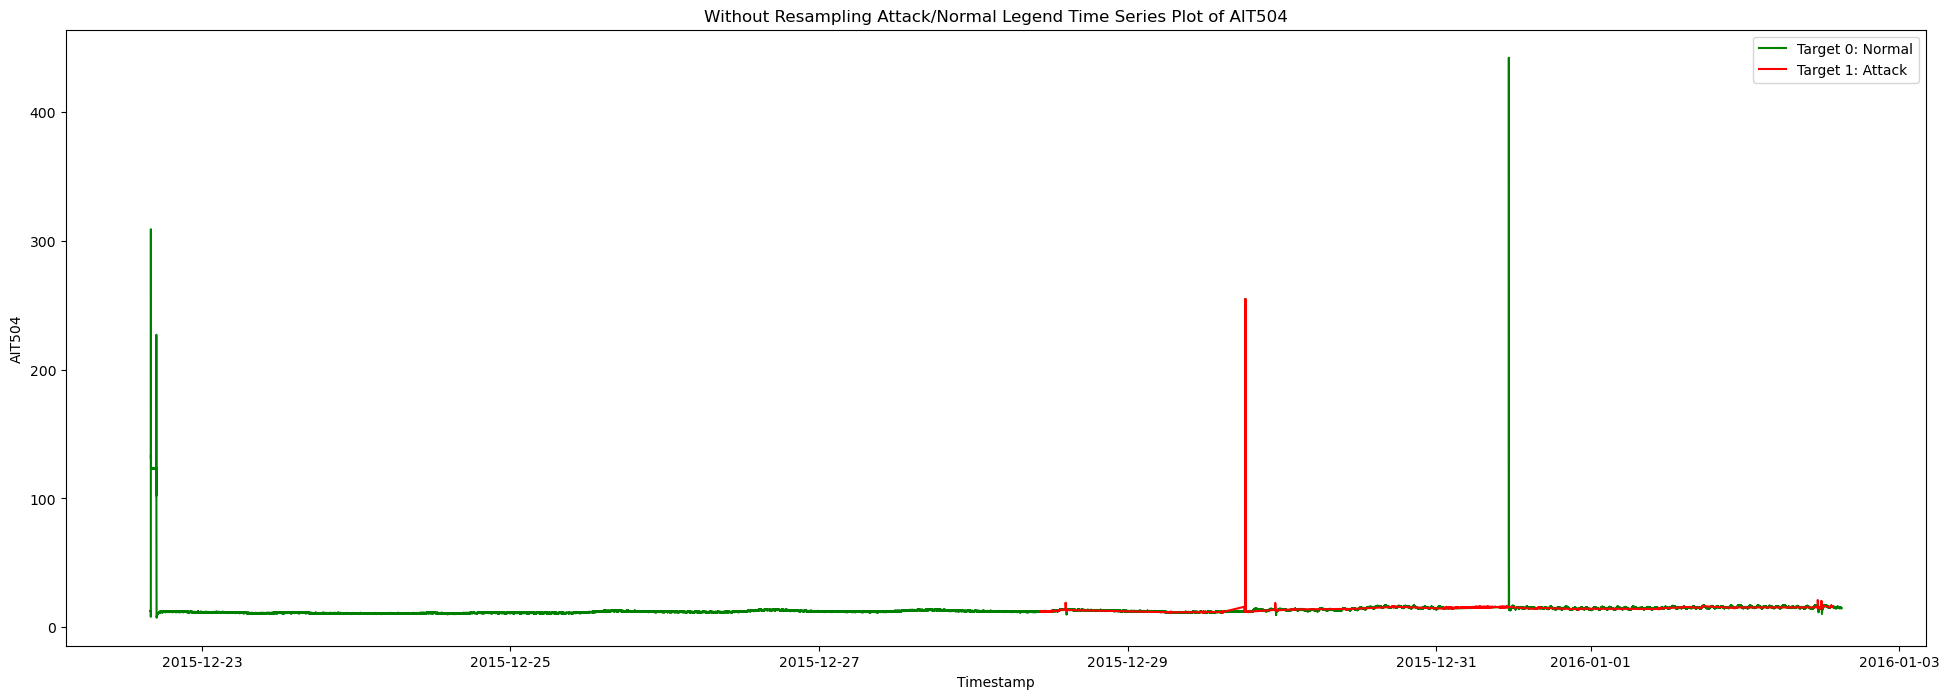

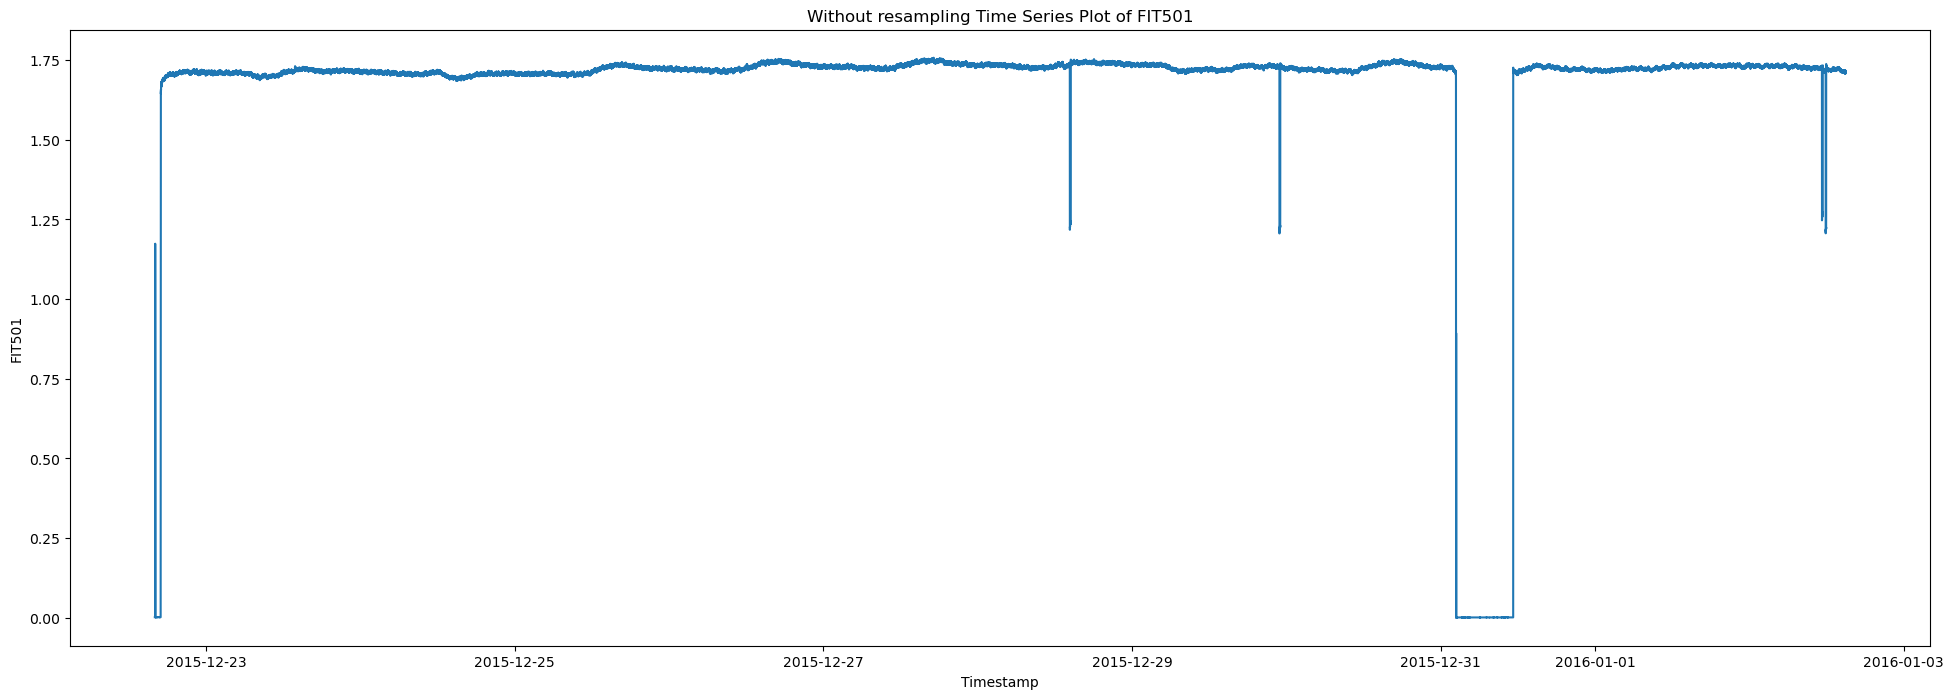

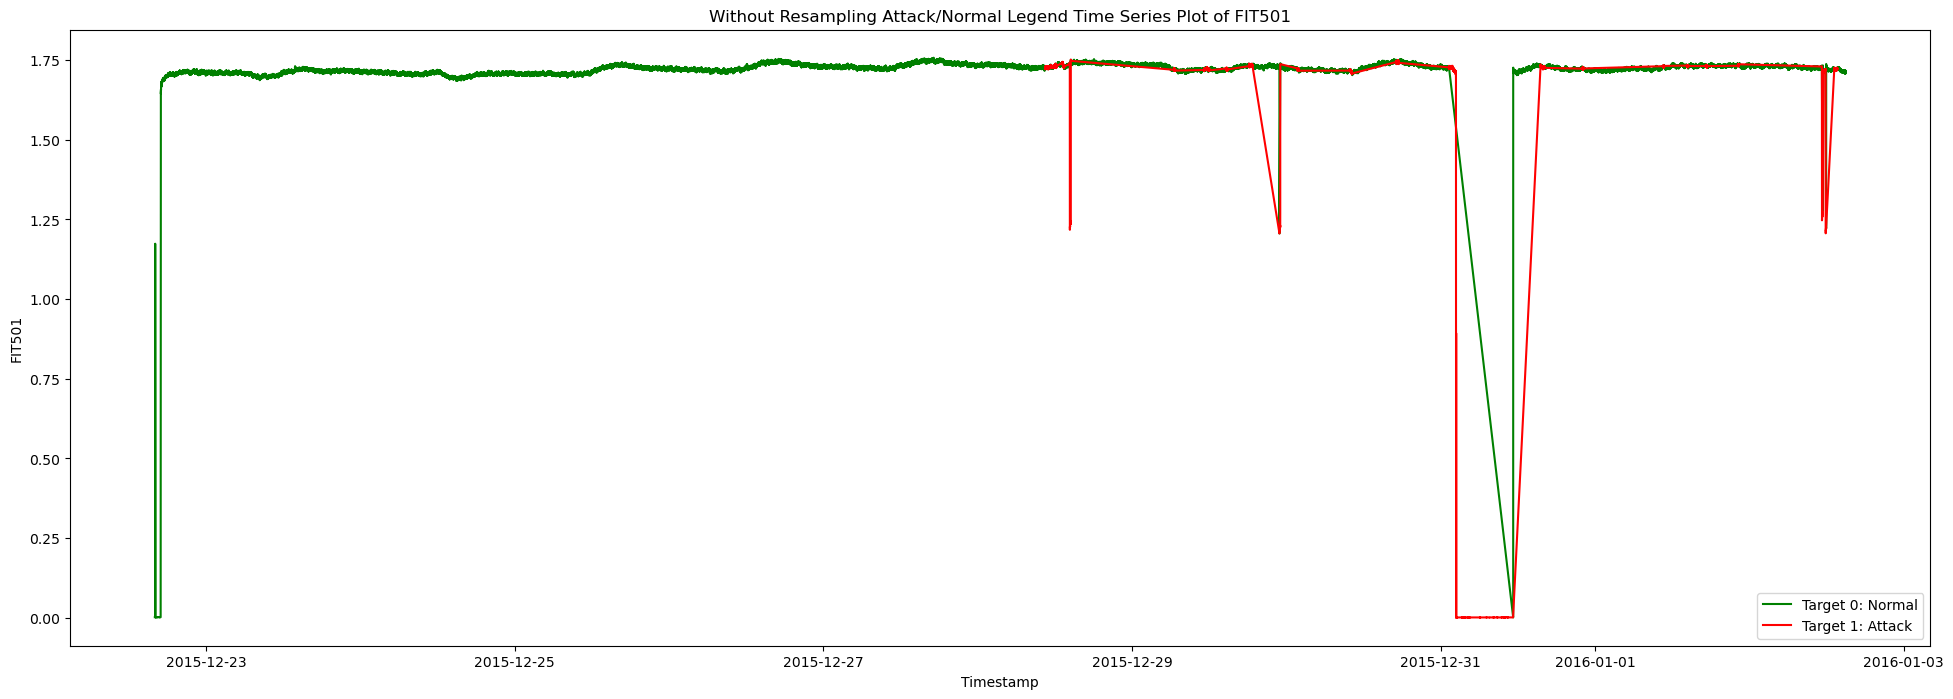

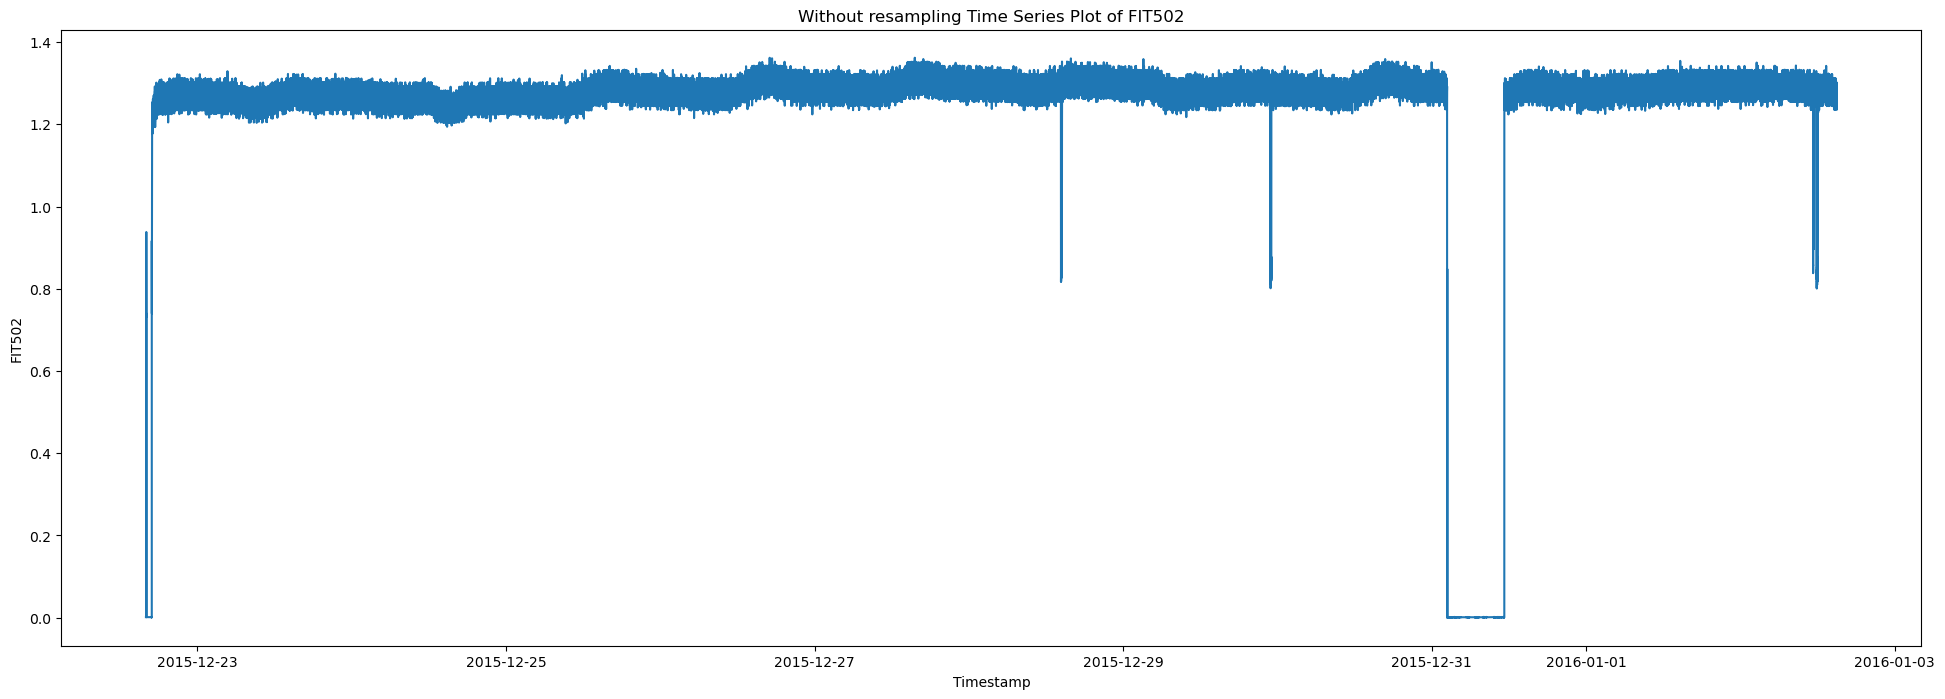

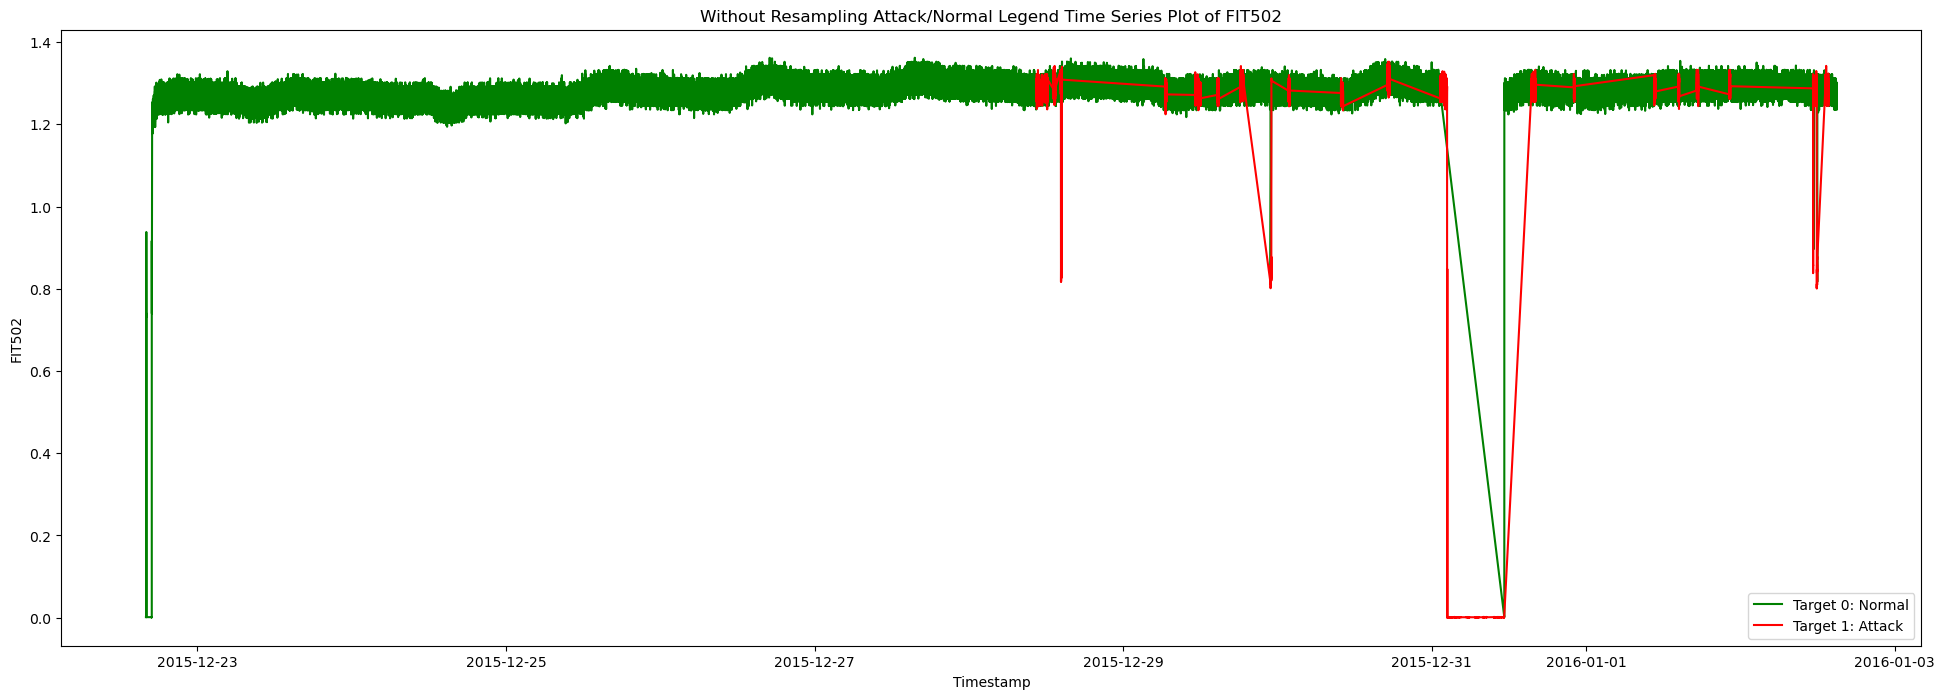

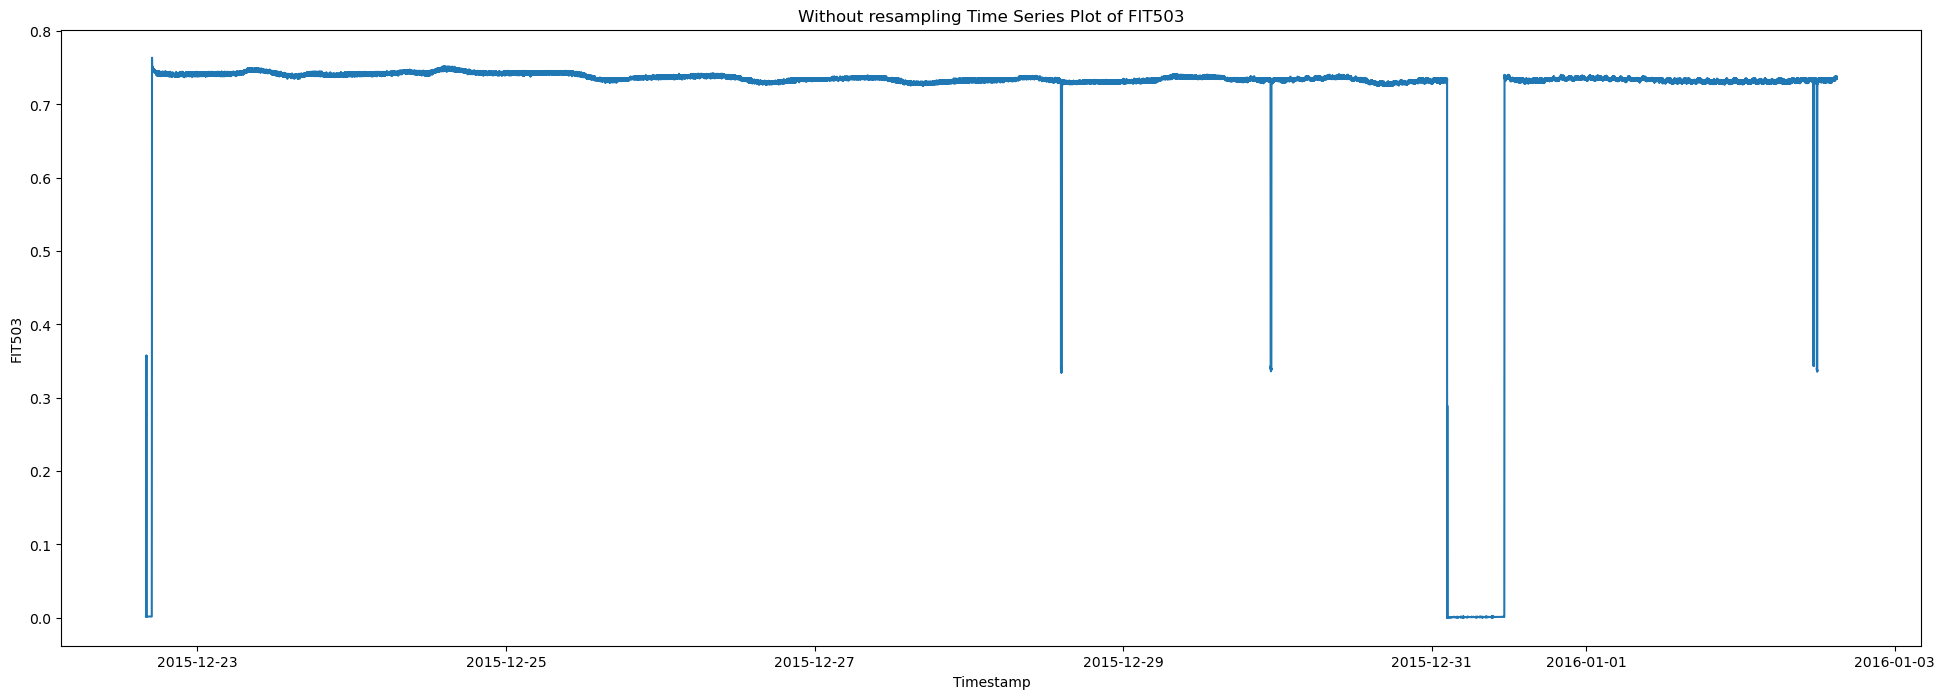

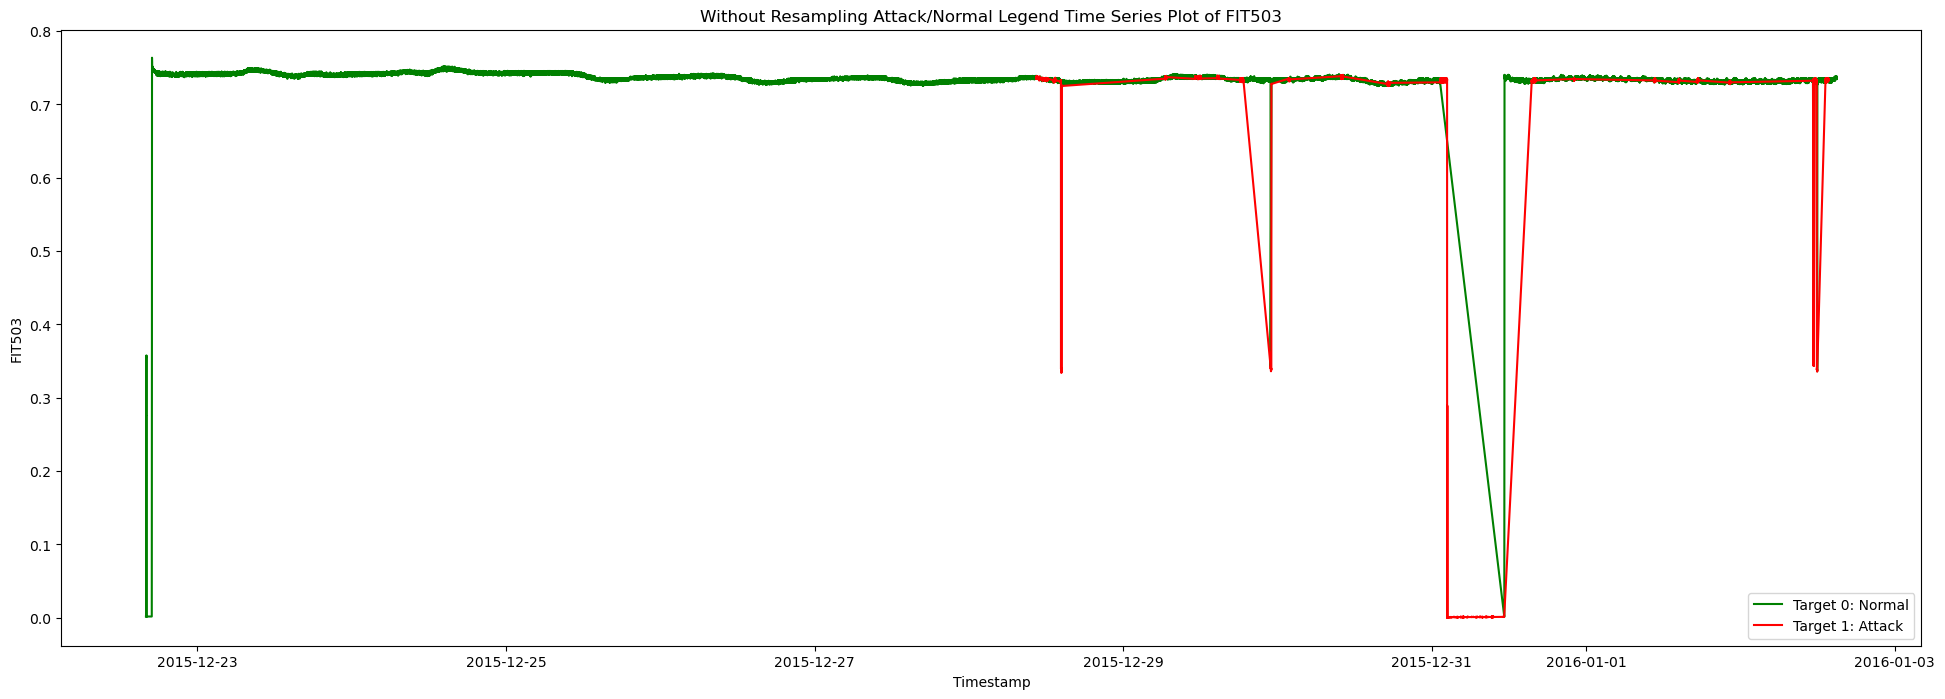

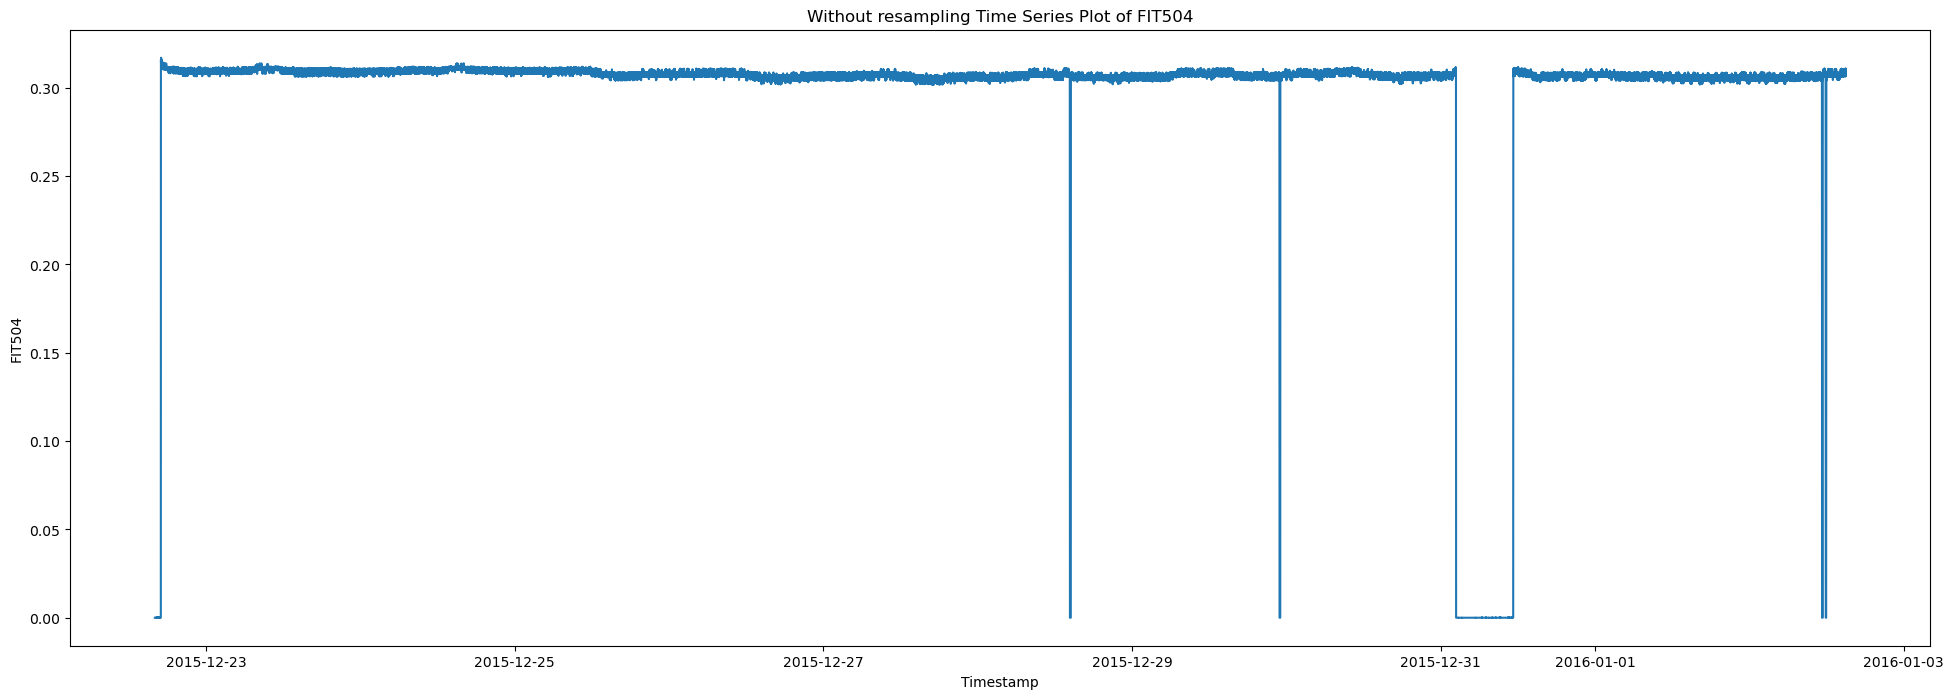

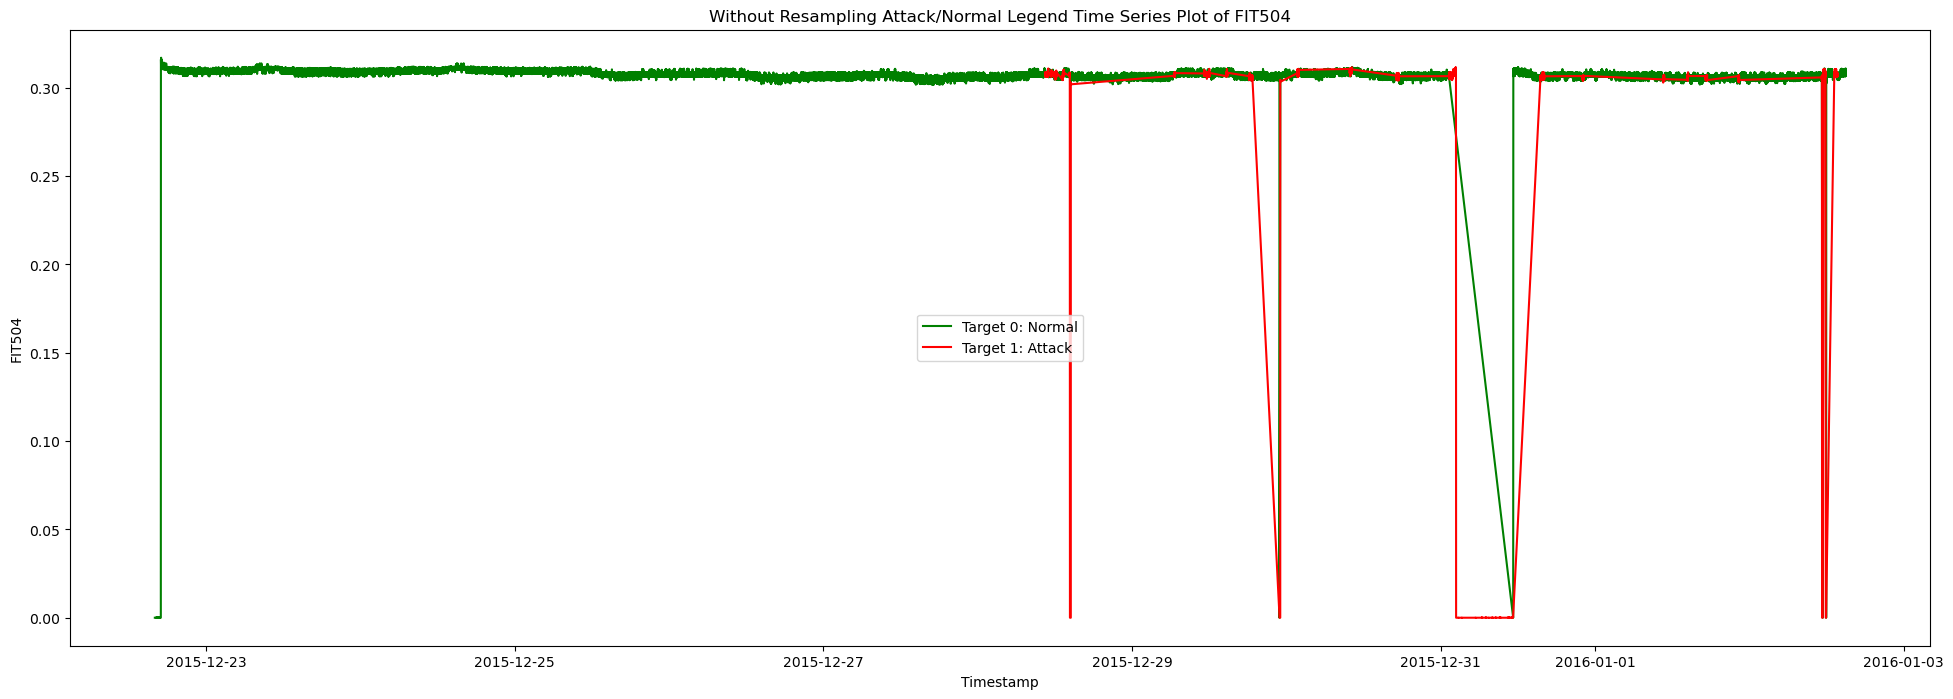

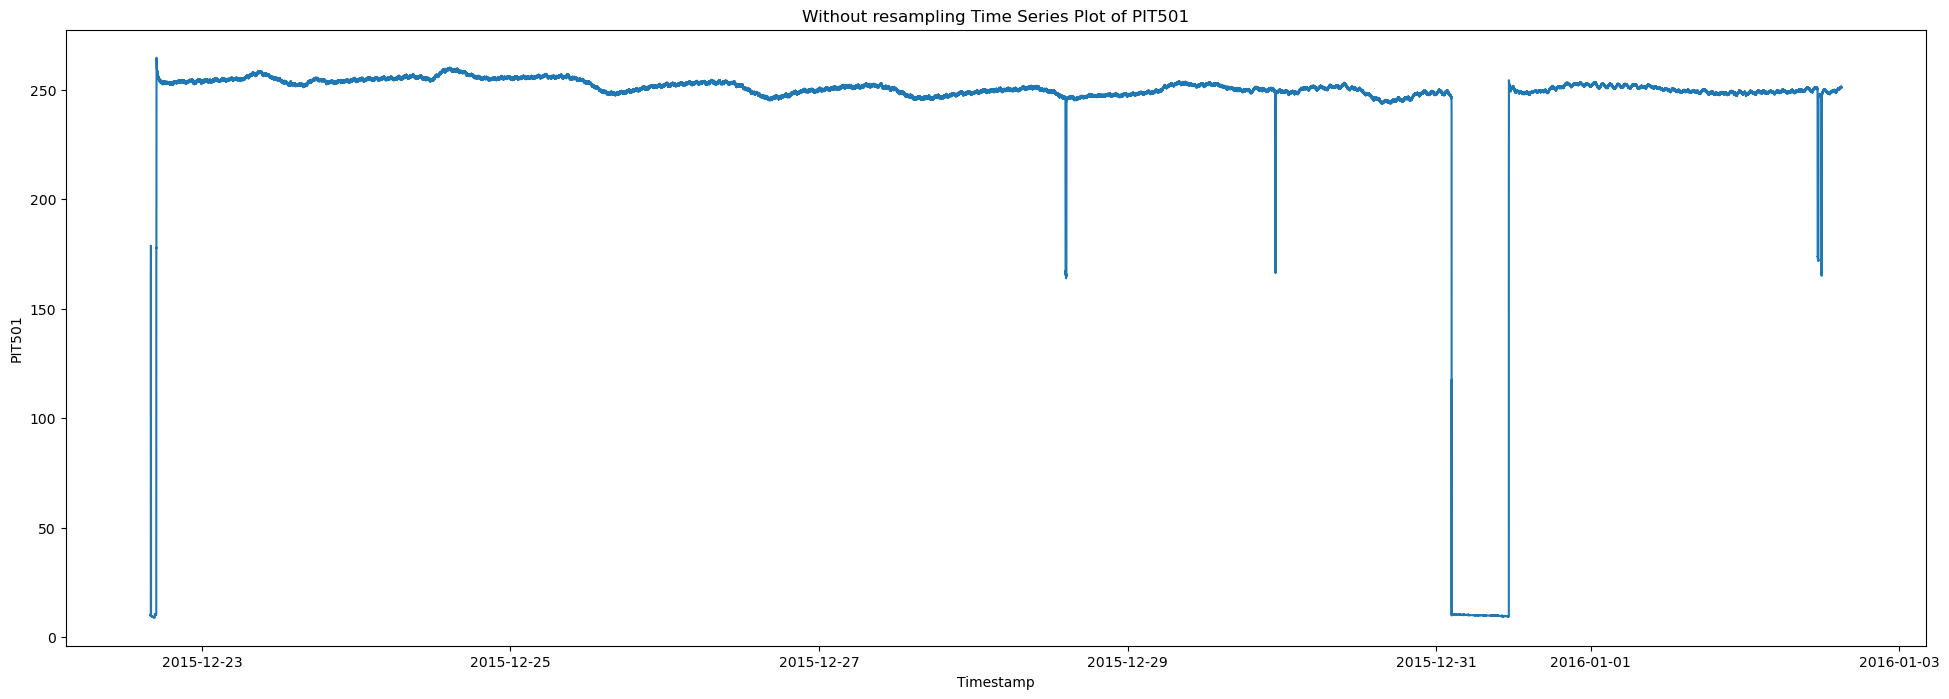

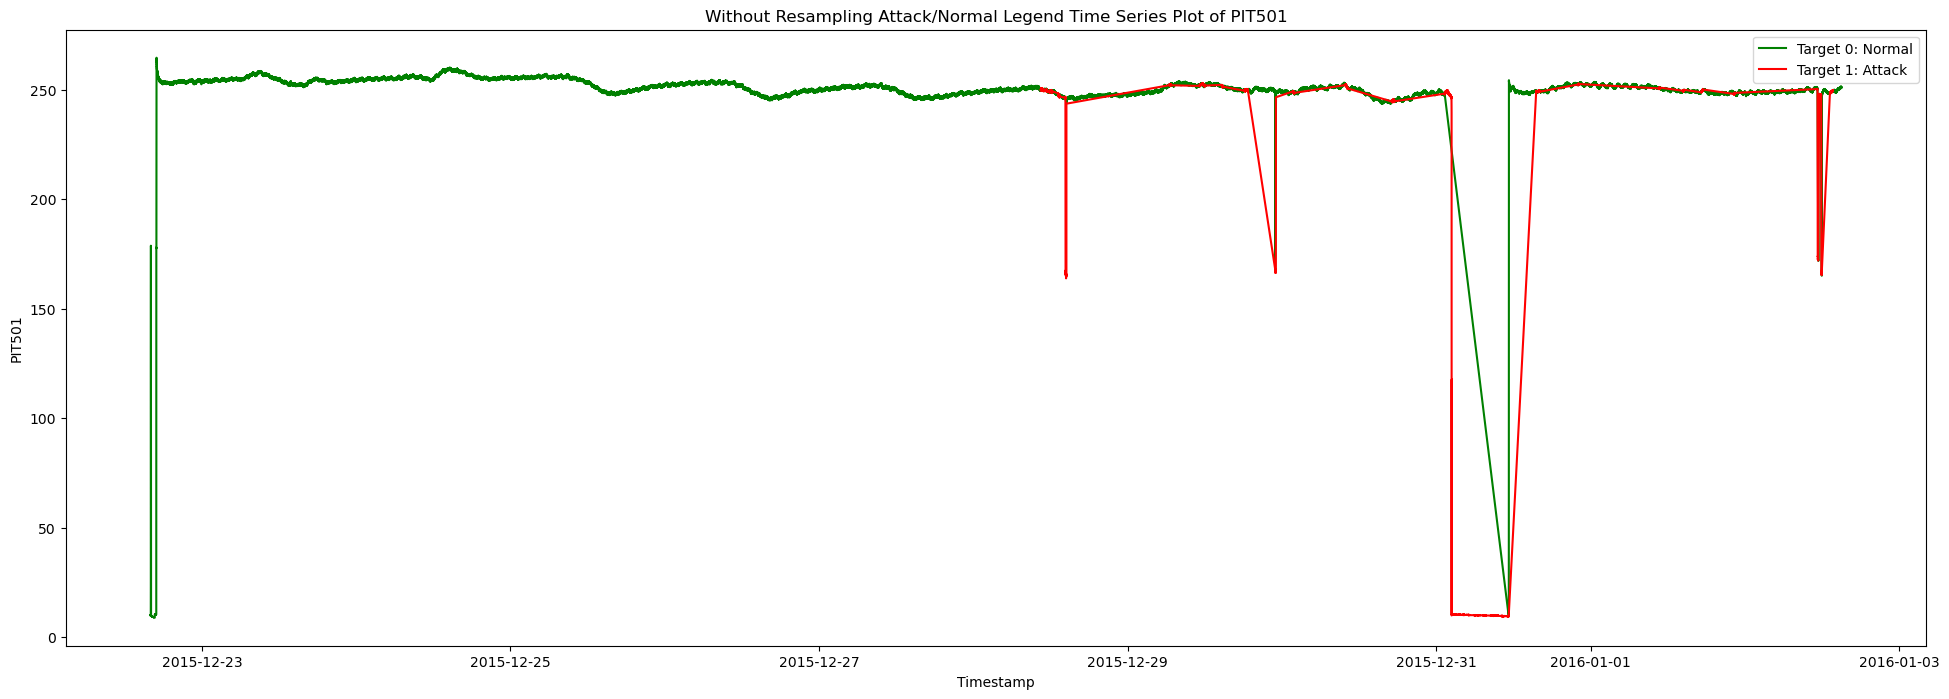

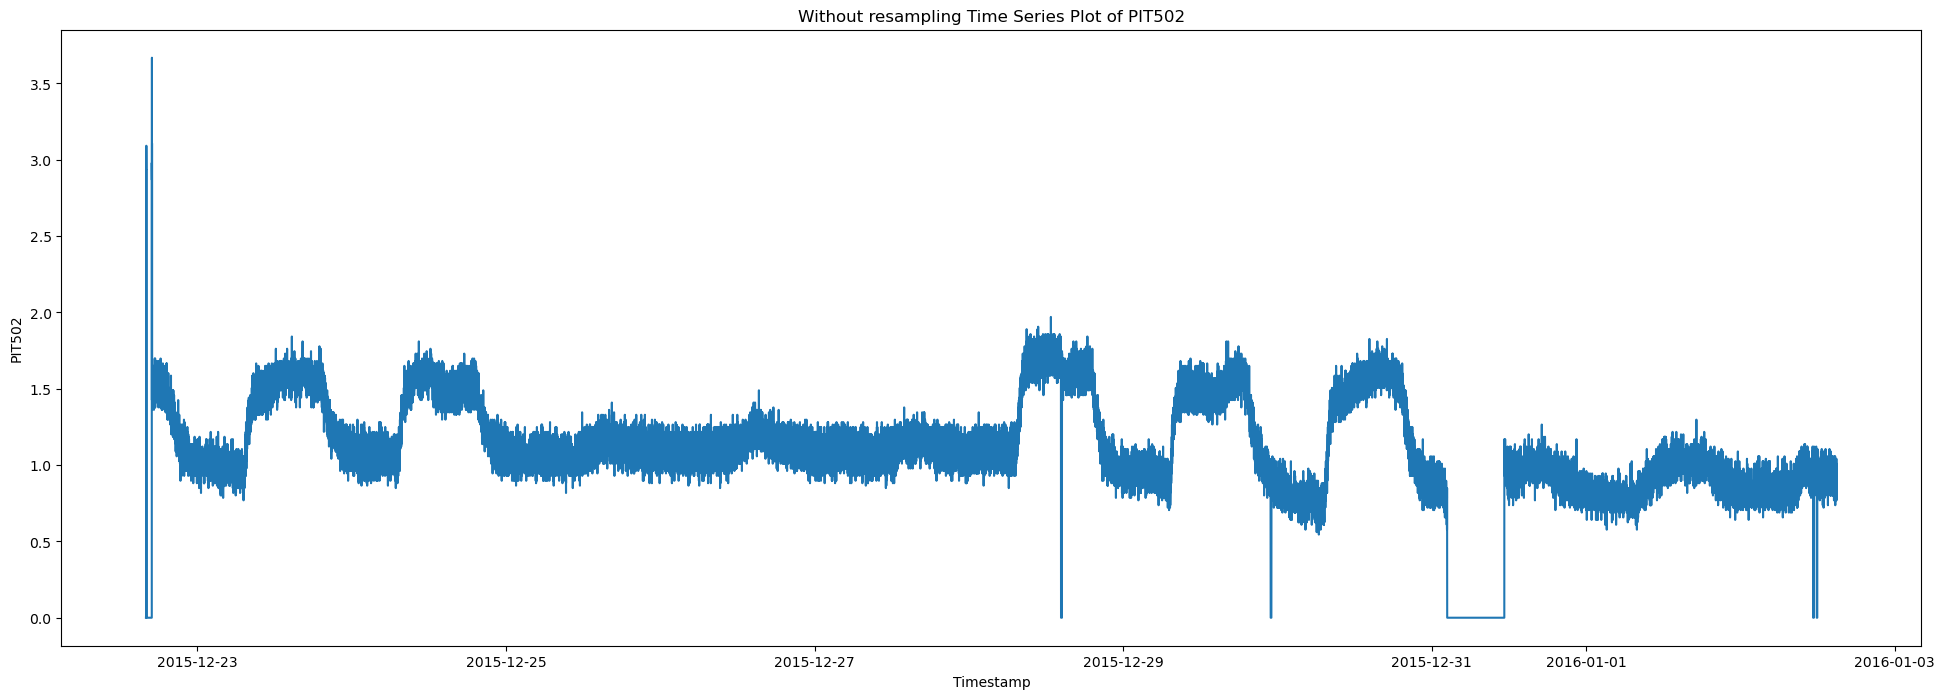

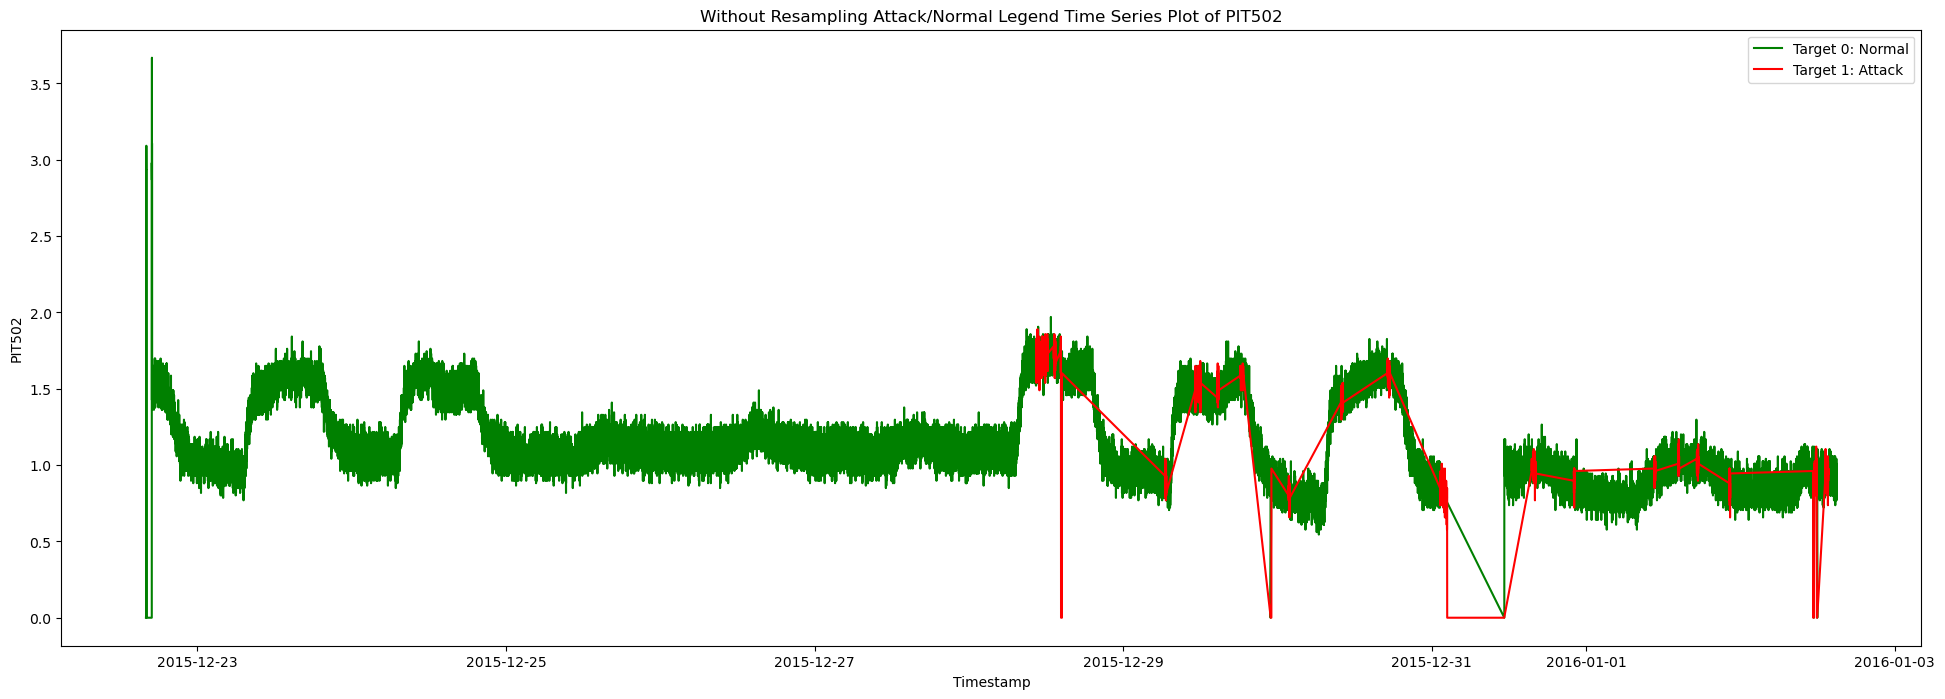

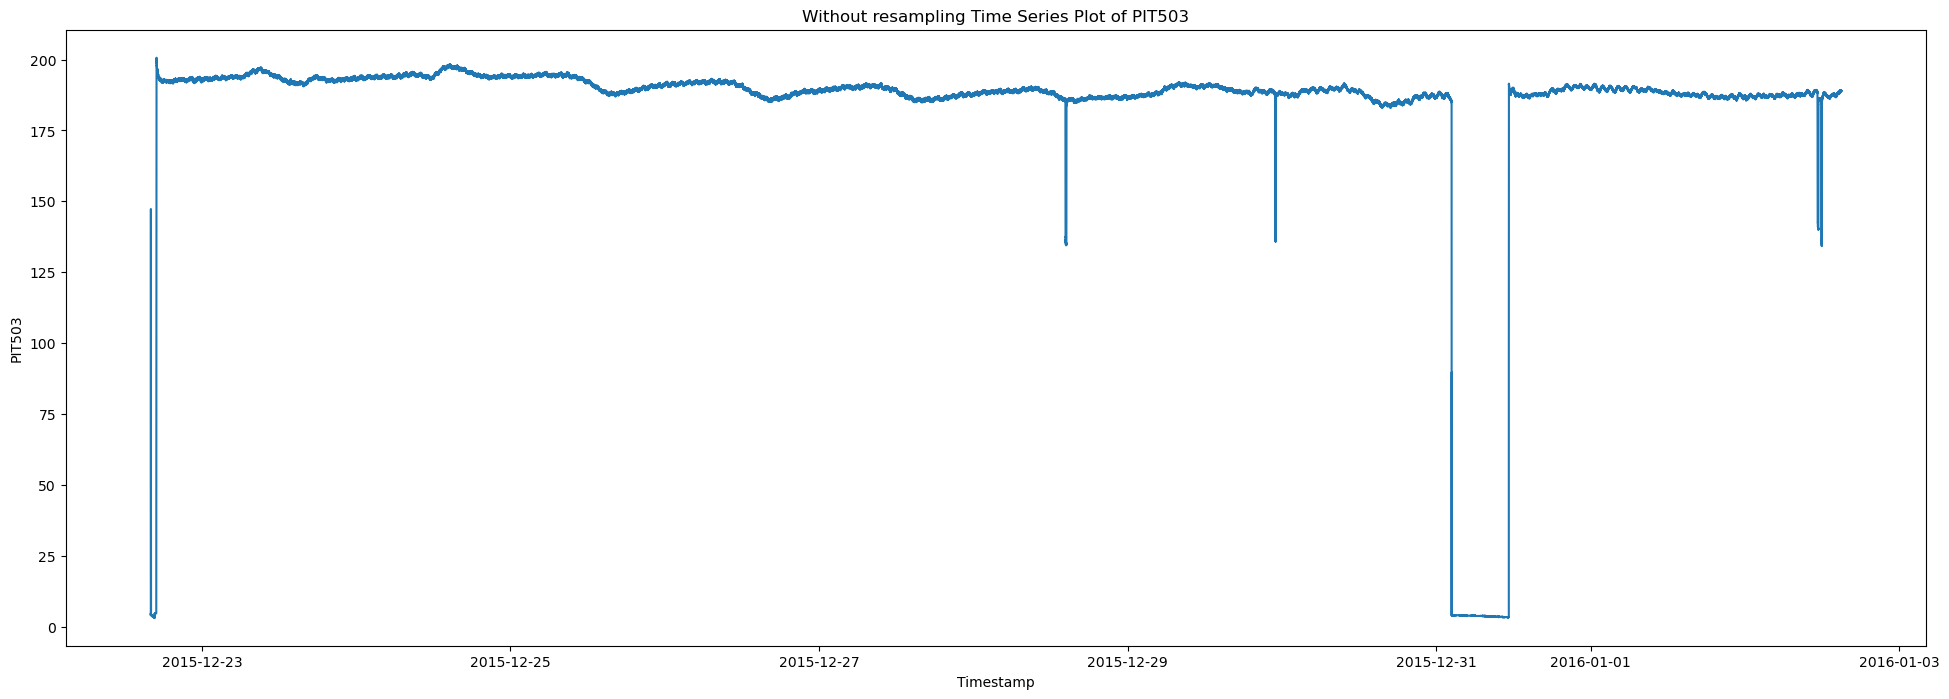

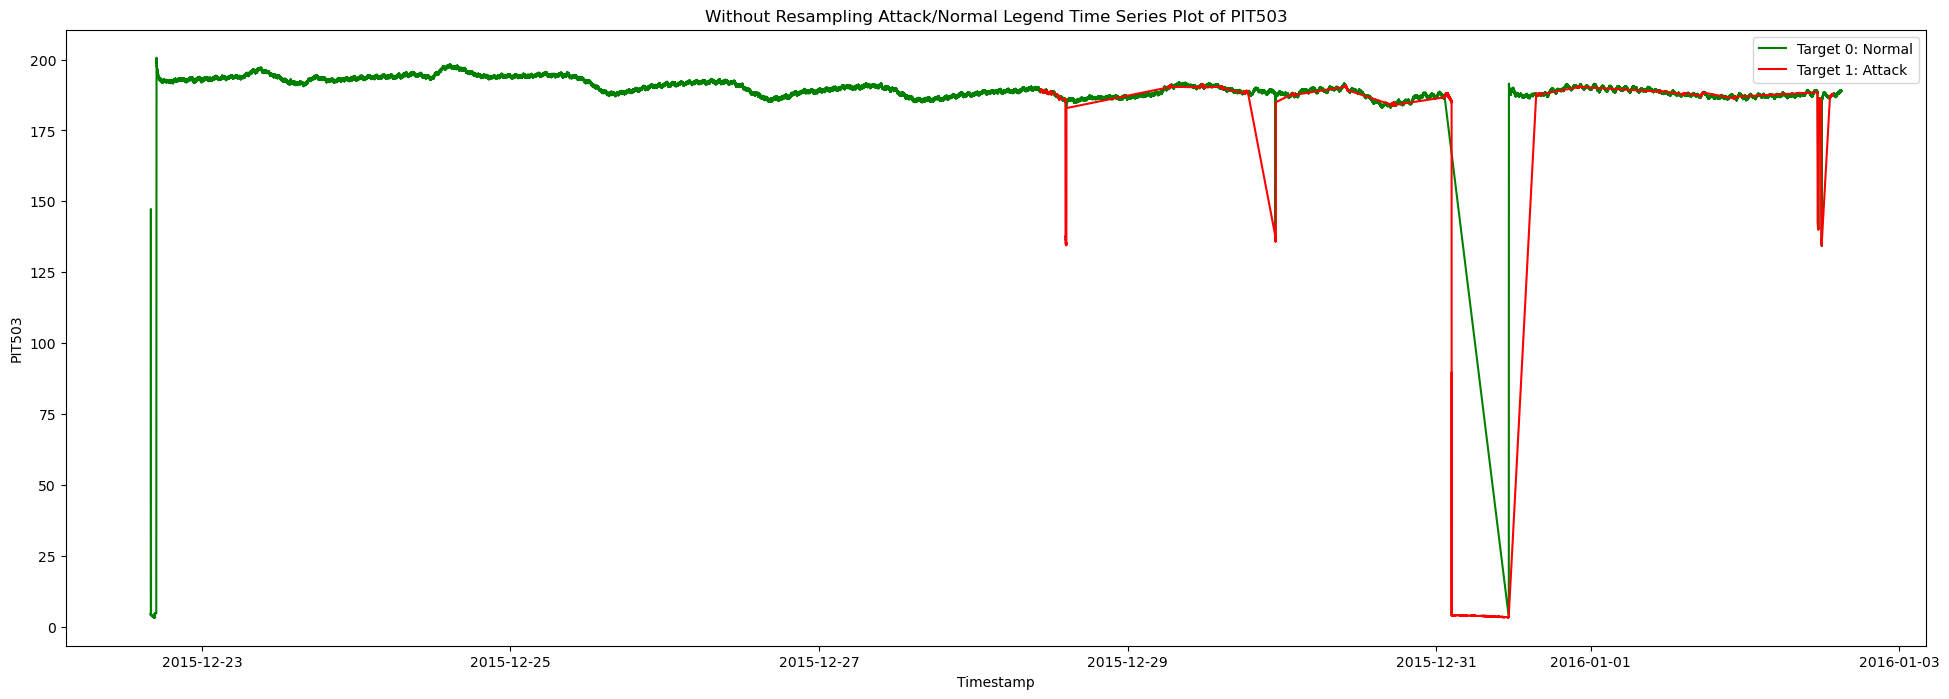

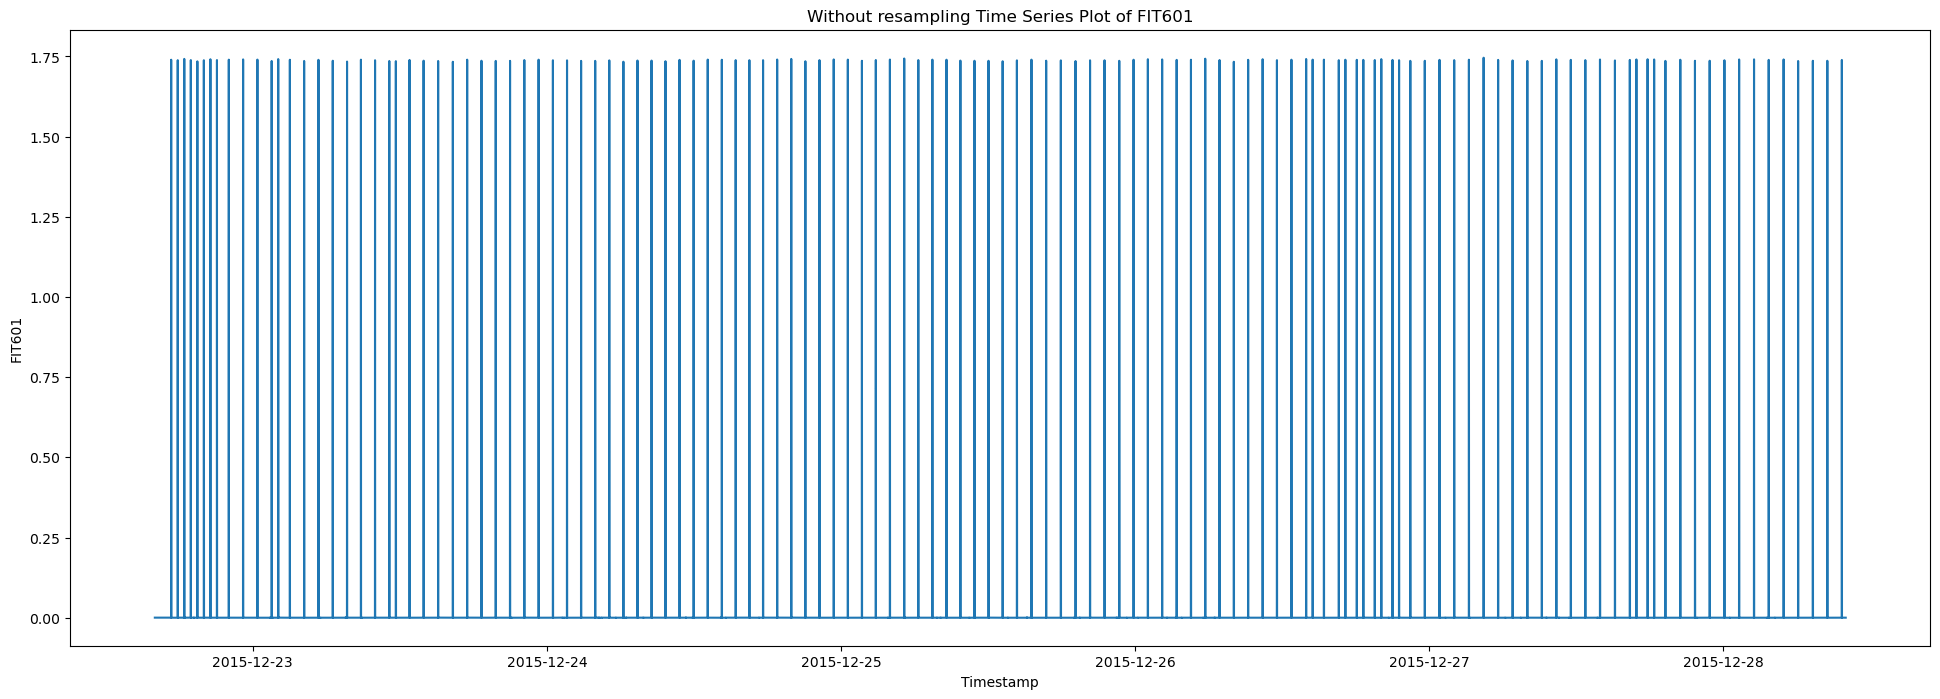

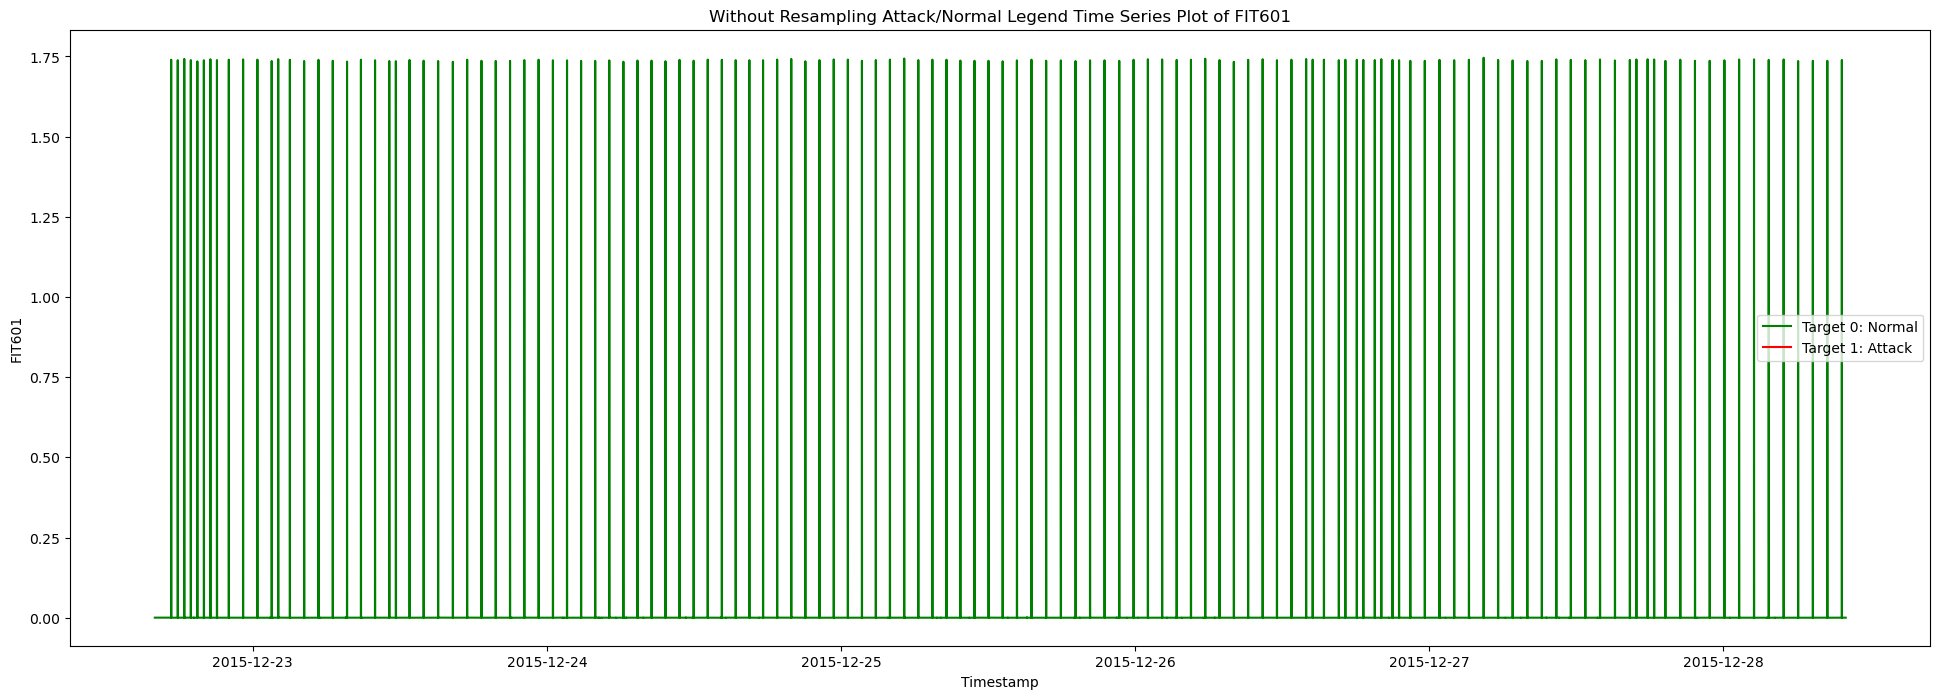

In [44]:
for i in sensors:
    function_plot(df, i)
    target_function_plot(df, i)

coming from the data itself it can be cleared that the only sensor values which are correlated with th target values are :
sensors :
PIT503
PIT502
PIT501
FIT504
FIT503
FIT502
FIT501
AIT504
AIT503
AIT502
FIT401
AIT402
LIT301
FIT301
FIT201
AIT203
AIT202
LIT101

In [45]:
relevant_sensors = [
'PIT503',
'PIT502',
'PIT501',
'FIT504',
'FIT503',
'FIT502',
'FIT501',
'AIT504',
'AIT503',
'AIT502',
'FIT401',
'AIT402',
'LIT301',
'FIT301',
'FIT201',
'AIT203',
'AIT202',
'LIT101'
]